# Coursework 3

Possible research questions:
-- activation functions
-- hidden layer
-- learning rates
-- normalisation
-- regularisation

In [1]:
# testing over layers and possible architectures

### CIFAR-10

In [1]:
import os
import tensorflow as tf
from collections import OrderedDict
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
train_data = CIFAR10DataProvider('train', batch_size=50)
valid_data = CIFAR10DataProvider('valid', batch_size=50)

In [3]:
# RELU
def fully_connected_layer_relu(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [4]:
# SIGMOID
def fully_connected_layer_sigmoid(inputs, input_dim, output_dim, nonlinearity=tf.nn.sigmoid):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [5]:
# TANH
def fully_connected_layer_tanh(inputs, input_dim, output_dim, nonlinearity=tf.nn.tanh):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [6]:
# default as given in lab 9

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

run_info_acc_v = []
run_info_acc_t = []
run_info_err_v = []
run_info_err_t = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(5):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        run_info_err_t.append(running_error)
        run_info_acc_t.append(running_accuracy)
        run_info_err_v.append(valid_error)
        run_info_acc_v.append(valid_accuracy)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot(run_info_err_t, label='train')
ax1.plot(run_info_err_v, label='val')
ax2.plot(run_info_acc_t, label='train')
ax2.plot(run_info_acc_v, label='val')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('layers_error.png',dpi=200)

In [7]:
# firstly, how many layers

In [8]:
# gradient descent 0.5 no hidden layer, sigmoid, 10 epochs
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(inputs,  train_data.inputs.shape[1], train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_0_sigm_acc_v = []
GD_05_0_sigm_acc_t = []
GD_05_0_sigm_err_v = []
GD_05_0_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_0_sigm_err_t.append(running_error)
        GD_05_0_sigm_acc_t.append(running_accuracy)
        GD_05_0_sigm_err_v.append(valid_error)
        GD_05_0_sigm_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=66.05 acc(train)=0.20
                 err(valid)=48.26 acc(valid)=0.27
End of epoch 02: err(train)=54.25 acc(train)=0.23
                 err(valid)=35.38 acc(valid)=0.21
End of epoch 03: err(train)=52.34 acc(train)=0.24
                 err(valid)=53.97 acc(valid)=0.22
End of epoch 04: err(train)=50.19 acc(train)=0.25
                 err(valid)=57.40 acc(valid)=0.21
End of epoch 05: err(train)=50.44 acc(train)=0.25
                 err(valid)=44.34 acc(valid)=0.26
End of epoch 06: err(train)=47.79 acc(train)=0.26
                 err(valid)=41.67 acc(valid)=0.27
End of epoch 07: err(train)=49.29 acc(train)=0.26
                 err(valid)=49.03 acc(valid)=0.22
End of epoch 08: err(train)=47.83 acc(train)=0.26
                 err(valid)=25.77 acc(valid)=0.33
End of epoch 09: err(train)=48.03 acc(train)=0.26
                 err(valid)=52.75 acc(valid)=0.26
End of epoch 10: err(train)=46.97 acc(train)=0.27
                 err(valid)=69.12 acc(valid)=0.21


In [9]:
# gradient descent 0.5, 1 hidden layer, sigmoid, 10 epochs
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_1, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_1_sigm_acc_v = []
GD_05_1_sigm_acc_t = []
GD_05_1_sigm_err_v = []
GD_05_1_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_1_sigm_err_t.append(running_error)
        GD_05_1_sigm_acc_t.append(running_accuracy)
        GD_05_1_sigm_err_v.append(valid_error)
        GD_05_1_sigm_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=2.04 acc(train)=0.26
                 err(valid)=1.88 acc(valid)=0.30
End of epoch 02: err(train)=1.79 acc(train)=0.36
                 err(valid)=1.75 acc(valid)=0.37
End of epoch 03: err(train)=1.73 acc(train)=0.38
                 err(valid)=1.85 acc(valid)=0.34
End of epoch 04: err(train)=1.68 acc(train)=0.40
                 err(valid)=1.66 acc(valid)=0.40
End of epoch 05: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.64 acc(valid)=0.42
End of epoch 06: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 07: err(train)=1.60 acc(train)=0.42
                 err(valid)=1.68 acc(valid)=0.40
End of epoch 08: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.67 acc(valid)=0.41
End of epoch 09: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.69 acc(valid)=0.39
End of epoch 10: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.63 acc(valid)=0.42


In [10]:
# gradient descent 0.5, 2 hidden layers, sigmoid, 10 epochs
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_sigm_acc_v = []
GD_05_2_sigm_acc_t = []
GD_05_2_sigm_err_v = []
GD_05_2_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_sigm_err_t.append(running_error)
        GD_05_2_sigm_acc_t.append(running_accuracy)
        GD_05_2_sigm_err_v.append(valid_error)
        GD_05_2_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=2.02 acc(train)=0.26
                 err(valid)=1.82 acc(valid)=0.35
End of epoch 02: err(train)=1.80 acc(train)=0.35
                 err(valid)=1.73 acc(valid)=0.37
End of epoch 03: err(train)=1.71 acc(train)=0.38
                 err(valid)=1.67 acc(valid)=0.40
End of epoch 04: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.63 acc(valid)=0.42
End of epoch 05: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 06: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 07: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 08: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.56 acc(valid)=0.44
End of epoch 09: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.55 acc(valid)=0.44
End of epoch 10: err(train)=1.45 acc(train)=0.49
                 err(valid)=1.56 acc(valid)=0.44


In [11]:
# gradient descent 0.5, 3 hidden layers, sigmoid, 10 epochs

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('fc-layer-3'):
    hidden_3 = fully_connected_layer_sigmoid(hidden_2, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_3, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_3_sigm_acc_v = []
GD_05_3_sigm_acc_t = []
GD_05_3_sigm_err_v = []
GD_05_3_sigm_err_t = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_3_sigm_err_t.append(running_error)
        GD_05_3_sigm_acc_t.append(running_accuracy)
        GD_05_3_sigm_err_v.append(valid_error)
        GD_05_3_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=2.11 acc(train)=0.21
                 err(valid)=1.96 acc(valid)=0.28
End of epoch 02: err(train)=1.88 acc(train)=0.31
                 err(valid)=1.81 acc(valid)=0.34
End of epoch 03: err(train)=1.79 acc(train)=0.35
                 err(valid)=1.75 acc(valid)=0.37
End of epoch 04: err(train)=1.74 acc(train)=0.37
                 err(valid)=1.72 acc(valid)=0.38
End of epoch 05: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.66 acc(valid)=0.39
End of epoch 06: err(train)=1.65 acc(train)=0.40
                 err(valid)=1.65 acc(valid)=0.40
End of epoch 07: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 08: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.65 acc(valid)=0.40
End of epoch 09: err(train)=1.55 acc(train)=0.44
                 err(valid)=1.53 acc(valid)=0.45
End of epoch 10: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.57 acc(valid)=0.43


In [12]:
# gradient descent 0.5, 4 hidden layers, sigmoid, 10 epochs

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('fc-layer-3'):
    hidden_3 = fully_connected_layer_sigmoid(hidden_2, num_hidden, num_hidden)
with tf.name_scope('fc-layer-4'):
    hidden_4 = fully_connected_layer_sigmoid(hidden_3, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_4, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_4_sigm_acc_v = []
GD_05_4_sigm_acc_t = []
GD_05_4_sigm_err_v = []
GD_05_4_sigm_err_t = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_4_sigm_err_t.append(running_error)
        GD_05_4_sigm_acc_t.append(running_accuracy)
        GD_05_4_sigm_err_v.append(valid_error)
        GD_05_4_sigm_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=2.32 acc(train)=0.11
                 err(valid)=2.21 acc(valid)=0.18
End of epoch 02: err(train)=2.10 acc(train)=0.18
                 err(valid)=2.09 acc(valid)=0.18
End of epoch 03: err(train)=2.00 acc(train)=0.23
                 err(valid)=1.94 acc(valid)=0.26
End of epoch 04: err(train)=1.92 acc(train)=0.28
                 err(valid)=1.93 acc(valid)=0.28
End of epoch 05: err(train)=1.85 acc(train)=0.32
                 err(valid)=1.82 acc(valid)=0.34
End of epoch 06: err(train)=1.80 acc(train)=0.34
                 err(valid)=1.75 acc(valid)=0.36
End of epoch 07: err(train)=1.75 acc(train)=0.36
                 err(valid)=1.72 acc(valid)=0.38
End of epoch 08: err(train)=1.72 acc(train)=0.37
                 err(valid)=1.74 acc(valid)=0.36
End of epoch 09: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.70 acc(valid)=0.38
End of epoch 10: err(train)=1.66 acc(train)=0.40
                 err(valid)=1.68 acc(valid)=0.39


In [13]:
# final values
print('-------------------------------------------------------------')
print('Gradiend Descent, no hidden layers, sigmoid activation over 10 epochs')
print('    final error(train) = {}').format(GD_05_0_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_0_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_0_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_0_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 1 hidden layer, sigmoid activation over 10 epochs')
print('    final error(train) = {}').format(GD_05_1_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_1_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_1_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_1_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 hidden layers, sigmoid activation over 10 epochs')
print('    final error(train) = {}').format(GD_05_2_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 3 hidden layers, sigmoid activation over 10 epochs')
print('    final error(train) = {}').format(GD_05_3_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_3_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_3_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_3_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 4 hidden layers, sigmoid activation over 10 epochs')
print('    final error(train) = {}').format(GD_05_4_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_4_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_4_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_4_sigm_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Gradiend Descent, no hidden layers, sigmoid activation over 10 epochs
    final error(train) = 46.9722071218
    final error(valid) = 69.1195145416
    final acc(train)   = 0.270049999952
    final acc(valid)   = 0.209299999774
-------------------------------------------------------------
Gradiend Descent, 1 hidden layer, sigmoid activation over 10 epochs
    final error(train) = 1.59440984115
    final error(valid) = 1.63176219523
    final acc(train)   = 0.430699999407
    final acc(valid)   = 0.423799998388
-------------------------------------------------------------
Gradiend Descent, 2 hidden layers, sigmoid activation over 10 epochs
    final error(train) = 1.44905195102
    final error(valid) = 1.55775420368
    final acc(train)   = 0.485299998578
    final acc(valid)   = 0.444799999073
-------------------------------------------------------------
Gradiend Descent, 3 hidden layers, sigmoid activation over 10 epochs
  

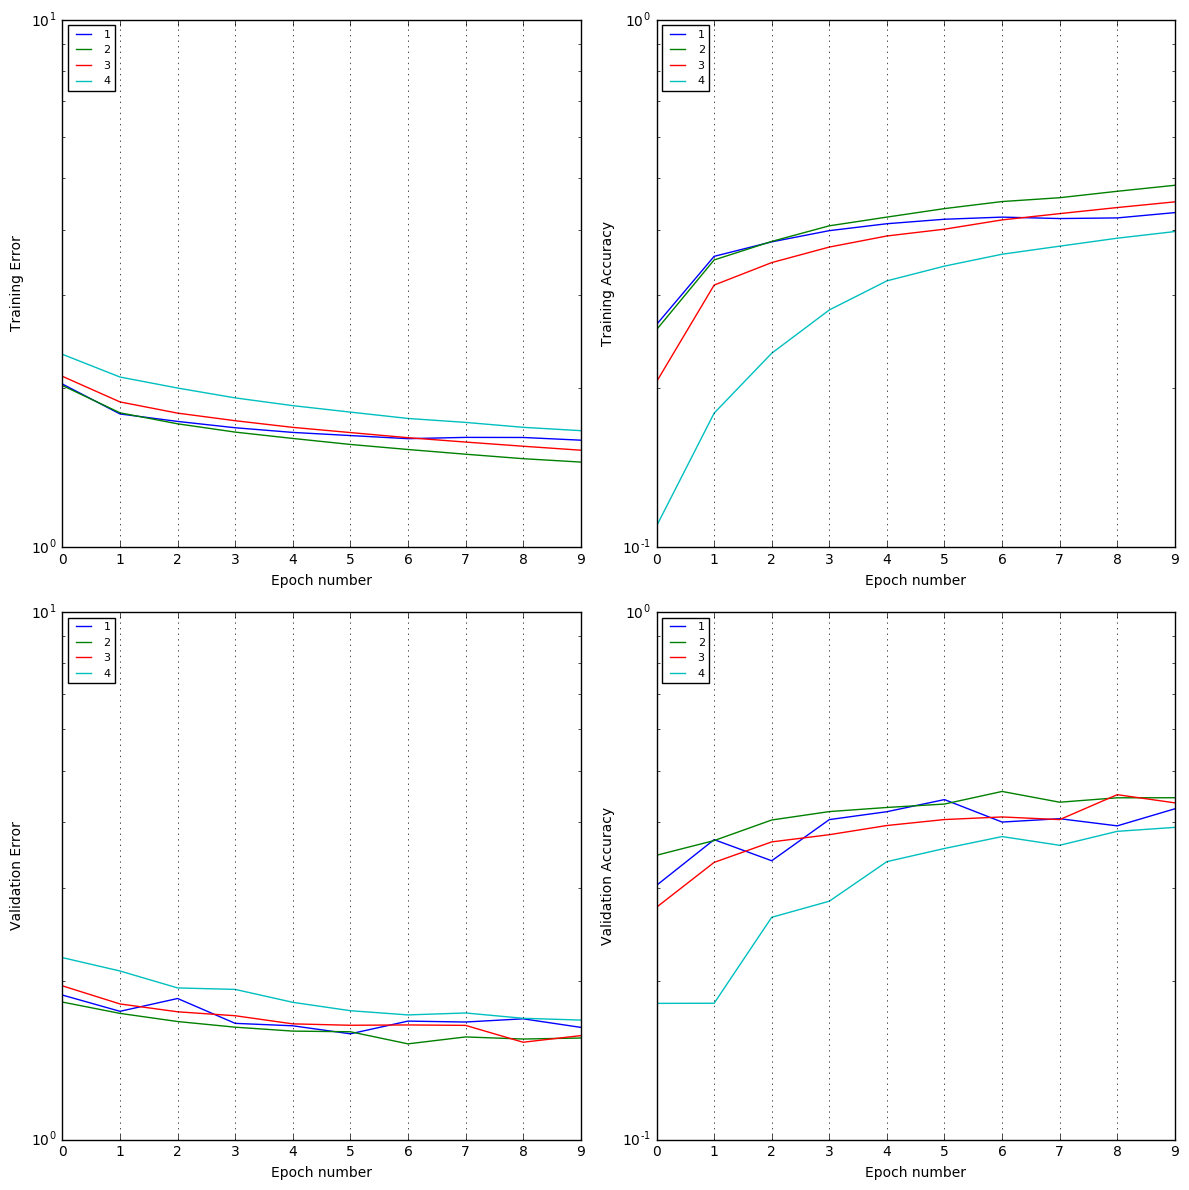

In [212]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(GD_05_1_sigm_err_t, label='1')
ax1.plot(GD_05_2_sigm_err_t, label='2')
ax1.plot(GD_05_3_sigm_err_t, label='3')
ax1.plot(GD_05_4_sigm_err_t, label='4')
ax2.plot(GD_05_1_sigm_acc_t, label='1')
ax2.plot(GD_05_2_sigm_acc_t, label='2')
ax2.plot(GD_05_3_sigm_acc_t, label='3')
ax2.plot(GD_05_4_sigm_acc_t, label='4')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('GD_05_1234_sigm.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(GD_05_1_sigm_err_v, label='1')
ax3.plot(GD_05_2_sigm_err_v, label='2')
ax3.plot(GD_05_3_sigm_err_v, label='3')
ax3.plot(GD_05_4_sigm_err_v, label='4')
ax4.plot(GD_05_1_sigm_acc_v, label='1')
ax4.plot(GD_05_2_sigm_acc_v, label='2')
ax4.plot(GD_05_3_sigm_acc_v, label='3')
ax4.plot(GD_05_4_sigm_acc_v, label='4')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('GD_05_1234_sigm.png',dpi=200)

In [15]:
# 2 hidden layers gave better results

In [16]:
# number of epochs change that?

In [17]:
# gradient descent 0.5, 1 hidden layer, sigmoid, 50 epochs
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_1, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_1_50_sigm_acc_v = []
GD_05_1_50_sigm_acc_t = []
GD_05_1_50_sigm_err_v = []
GD_05_1_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_1_50_sigm_err_t.append(running_error)
        GD_05_1_50_sigm_acc_t.append(running_accuracy)
        GD_05_1_50_sigm_err_v.append(valid_error)
        GD_05_1_50_sigm_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=1.99 acc(train)=0.28
                 err(valid)=1.84 acc(valid)=0.34
End of epoch 02: err(train)=1.77 acc(train)=0.36
                 err(valid)=1.74 acc(valid)=0.37
End of epoch 03: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.71 acc(valid)=0.38
End of epoch 04: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.65 acc(valid)=0.40
End of epoch 05: err(train)=1.60 acc(train)=0.43
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 06: err(train)=1.58 acc(train)=0.44
                 err(valid)=1.66 acc(valid)=0.40
End of epoch 07: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.60 acc(valid)=0.44
End of epoch 08: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 09: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 10: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.65 acc(valid)=0.40
End of epoch 11: err

In [18]:
# gradient descent 0.5, 2 hidden layers, sigmoid, 50 epochs
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_50_sigm_acc_v = []
GD_05_2_50_sigm_acc_t = []
GD_05_2_50_sigm_err_v = []
GD_05_2_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_50_sigm_err_t.append(running_error)
        GD_05_2_50_sigm_acc_t.append(running_accuracy)
        GD_05_2_50_sigm_err_v.append(valid_error)
        GD_05_2_50_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=2.03 acc(train)=0.26
                 err(valid)=1.85 acc(valid)=0.33
End of epoch 02: err(train)=1.80 acc(train)=0.35
                 err(valid)=1.80 acc(valid)=0.34
End of epoch 03: err(train)=1.71 acc(train)=0.38
                 err(valid)=1.71 acc(valid)=0.38
End of epoch 04: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 05: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.58 acc(valid)=0.43
End of epoch 06: err(train)=1.57 acc(train)=0.44
                 err(valid)=1.64 acc(valid)=0.42
End of epoch 07: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 08: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.53 acc(valid)=0.45
End of epoch 09: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.49 acc(valid)=0.47
End of epoch 10: err(train)=1.45 acc(train)=0.48
                 err(valid)=1.51 acc(valid)=0.47
End of epoch 11: err

In [19]:
# gradient descent 0.5, 3 hidden layers, sigmoid, 50 epochs

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('fc-layer-3'):
    hidden_3 = fully_connected_layer_sigmoid(hidden_2, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_3, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_3_50_sigm_acc_v = []
GD_05_3_50_sigm_acc_t = []
GD_05_3_50_sigm_err_v = []
GD_05_3_50_sigm_err_t = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_3_50_sigm_err_t.append(running_error)
        GD_05_3_50_sigm_acc_t.append(running_accuracy)
        GD_05_3_50_sigm_err_v.append(valid_error)
        GD_05_3_50_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=2.11 acc(train)=0.21
                 err(valid)=1.94 acc(valid)=0.29
End of epoch 02: err(train)=1.89 acc(train)=0.31
                 err(valid)=1.81 acc(valid)=0.34
End of epoch 03: err(train)=1.80 acc(train)=0.34
                 err(valid)=1.81 acc(valid)=0.34
End of epoch 04: err(train)=1.74 acc(train)=0.37
                 err(valid)=1.71 acc(valid)=0.38
End of epoch 05: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 06: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.71 acc(valid)=0.39
End of epoch 07: err(train)=1.62 acc(train)=0.41
                 err(valid)=1.61 acc(valid)=0.42
End of epoch 08: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 09: err(train)=1.55 acc(train)=0.44
                 err(valid)=1.62 acc(valid)=0.42
End of epoch 10: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 11: err

In [20]:
# gradient descent 0.5, 4 hidden layers, sigmoid, 50 epochs

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('fc-layer-3'):
    hidden_3 = fully_connected_layer_sigmoid(hidden_2, num_hidden, num_hidden)
with tf.name_scope('fc-layer-4'):
    hidden_4 = fully_connected_layer_sigmoid(hidden_3, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_4, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_4_50_sigm_acc_v = []
GD_05_4_50_sigm_acc_t = []
GD_05_4_50_sigm_err_v = []
GD_05_4_50_sigm_err_t = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_4_50_sigm_err_t.append(running_error)
        GD_05_4_50_sigm_acc_t.append(running_accuracy)
        GD_05_4_50_sigm_err_v.append(valid_error)
        GD_05_4_50_sigm_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=2.32 acc(train)=0.11
                 err(valid)=2.18 acc(valid)=0.18
End of epoch 02: err(train)=2.10 acc(train)=0.18
                 err(valid)=2.05 acc(valid)=0.20
End of epoch 03: err(train)=2.04 acc(train)=0.21
                 err(valid)=1.98 acc(valid)=0.25
End of epoch 04: err(train)=1.94 acc(train)=0.27
                 err(valid)=1.87 acc(valid)=0.30
End of epoch 05: err(train)=1.87 acc(train)=0.32
                 err(valid)=1.87 acc(valid)=0.32
End of epoch 06: err(train)=1.81 acc(train)=0.34
                 err(valid)=1.76 acc(valid)=0.36
End of epoch 07: err(train)=1.76 acc(train)=0.36
                 err(valid)=1.76 acc(valid)=0.36
End of epoch 08: err(train)=1.72 acc(train)=0.37
                 err(valid)=1.72 acc(valid)=0.38
End of epoch 09: err(train)=1.69 acc(train)=0.38
                 err(valid)=1.74 acc(valid)=0.37
End of epoch 10: err(train)=1.66 acc(train)=0.40
                 err(valid)=1.73 acc(valid)=0.37
End of epoch 11: err

In [21]:
# final values
print('-------------------------------------------------------------')
print('Gradiend Descent, 1 hidden layer, sigmoid activation over 50 epochs')
print('    final error(train) = {}').format(GD_05_1_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_1_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_1_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_1_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 hidden layers, sigmoid activation over 50 epochs')
print('    final error(train) = {}').format(GD_05_2_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 3 hidden layers, sigmoid activation over 50 epochs')
print('    final error(train) = {}').format(GD_05_3_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_3_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_3_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_3_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 4 hidden layers, sigmoid activation over 50 epochs')
print('    final error(train) = {}').format(GD_05_4_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_4_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_4_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_4_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Gradiend Descent, 1 hidden layer, sigmoid activation over 100 epochs
    final error(train) = 1.87128036909
    final error(valid) = 1.73379488468
    final acc(train)   = 0.459125000034
    final acc(valid)   = 0.451800000668
-------------------------------------------------------------
Gradiend Descent, 2 hidden layers, sigmoid activation over 100 epochs
    final error(train) = 1.07577846602
    final error(valid) = 1.47996386945
    final acc(train)   = 0.613200004324
    final acc(valid)   = 0.493499999046
-------------------------------------------------------------
Gradiend Descent, 3 hidden layers, sigmoid activation over 100 epochs
    final error(train) = 1.18248097919
    final error(valid) = 1.47393780559
    final acc(train)   = 0.573725002967
    final acc(valid)   = 0.499399998188
-------------------------------------------------------------
Gradiend Descent, 4 hidden layers, sigmoid activation over 100 epochs

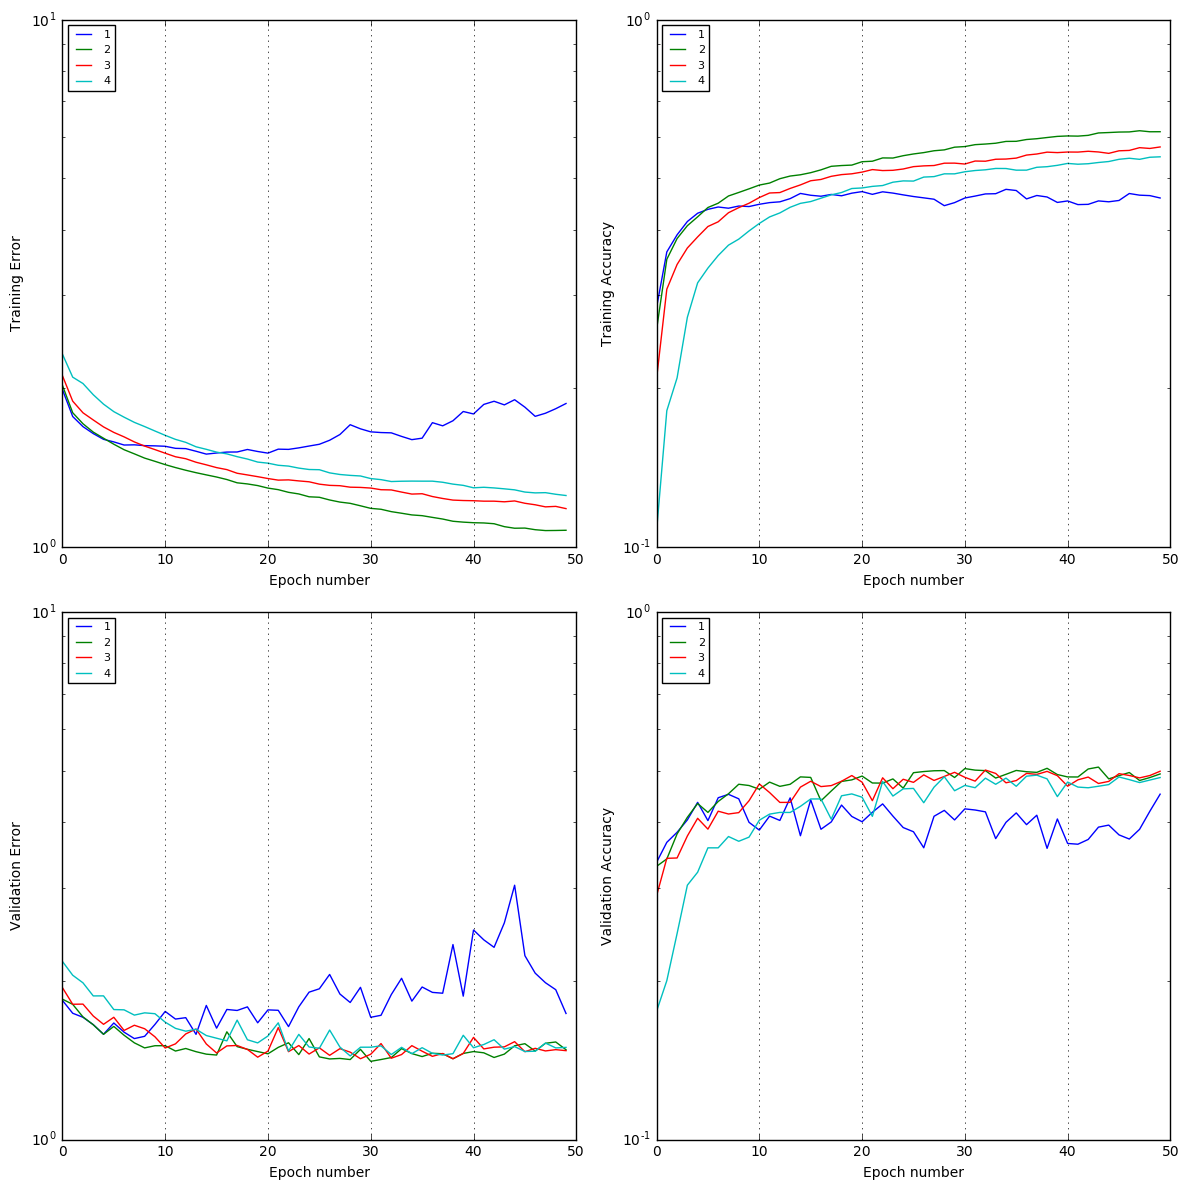

In [211]:
# plots
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(GD_05_1_50_sigm_err_t, label='1')
ax1.plot(GD_05_2_50_sigm_err_t, label='2')
ax1.plot(GD_05_3_50_sigm_err_t, label='3')
ax1.plot(GD_05_4_50_sigm_err_t, label='4')
ax2.plot(GD_05_1_50_sigm_acc_t, label='1')
ax2.plot(GD_05_2_50_sigm_acc_t, label='2')
ax2.plot(GD_05_3_50_sigm_acc_t, label='3')
ax2.plot(GD_05_4_50_sigm_acc_t, label='4')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('GD_05_1234train_50_sigm.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(GD_05_1_50_sigm_err_v, label='1')
ax3.plot(GD_05_2_50_sigm_err_v, label='2')
ax3.plot(GD_05_3_50_sigm_err_v, label='3')
ax3.plot(GD_05_4_50_sigm_err_v, label='4')
ax4.plot(GD_05_1_50_sigm_acc_v, label='1')
ax4.plot(GD_05_2_50_sigm_acc_v, label='2')
ax4.plot(GD_05_3_50_sigm_acc_v, label='3')
ax4.plot(GD_05_4_50_sigm_acc_v, label='4')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('GD_05_1234_50_sigm.png',dpi=200)

In [ ]:
# 2 hidden layers give better result 
# layer size?

In [23]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 10 epochs, size 50
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =50

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_50_10_sigm_acc_v = []
GD_05_2_50_10_sigm_acc_t = []
GD_05_2_50_10_sigm_err_v = []
GD_05_2_50_10_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_50_10_sigm_err_t.append(running_error)
        GD_05_2_50_10_sigm_acc_t.append(running_accuracy)
        GD_05_2_50_10_sigm_err_v.append(valid_error)
        GD_05_2_50_10_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.01 acc(train)=0.27
                 err(valid)=1.91 acc(valid)=0.31
End of epoch 02: err(train)=1.82 acc(train)=0.34
                 err(valid)=1.84 acc(valid)=0.35
End of epoch 03: err(train)=1.75 acc(train)=0.37
                 err(valid)=1.75 acc(valid)=0.37
End of epoch 04: err(train)=1.70 acc(train)=0.39
                 err(valid)=1.69 acc(valid)=0.39
End of epoch 05: err(train)=1.67 acc(train)=0.40
                 err(valid)=1.67 acc(valid)=0.39
End of epoch 06: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.71 acc(valid)=0.39
End of epoch 07: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.70 acc(valid)=0.39
End of epoch 08: err(train)=1.60 acc(train)=0.43
                 err(valid)=1.64 acc(valid)=0.41
End of epoch 09: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 10: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.61 acc(valid)=0.43


In [24]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 10 epochs, size 100
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =100

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_100_10_sigm_acc_v = []
GD_05_2_100_10_sigm_acc_t = []
GD_05_2_100_10_sigm_err_v = []
GD_05_2_100_10_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_100_10_sigm_err_t.append(running_error)
        GD_05_2_100_10_sigm_acc_t.append(running_accuracy)
        GD_05_2_100_10_sigm_err_v.append(valid_error)
        GD_05_2_100_10_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.00 acc(train)=0.26
                 err(valid)=1.82 acc(valid)=0.34
End of epoch 02: err(train)=1.79 acc(train)=0.35
                 err(valid)=1.82 acc(valid)=0.33
End of epoch 03: err(train)=1.71 acc(train)=0.38
                 err(valid)=1.78 acc(valid)=0.36
End of epoch 04: err(train)=1.66 acc(train)=0.40
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 05: err(train)=1.62 acc(train)=0.42
                 err(valid)=1.66 acc(valid)=0.40
End of epoch 06: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 07: err(train)=1.55 acc(train)=0.44
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 08: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.64 acc(valid)=0.42
End of epoch 09: err(train)=1.51 acc(train)=0.46
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 10: err(train)=1.49 acc(train)=0.46
                 err(valid)=1.52 acc(valid)=0.45


In [25]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 10 epochs, size 300
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =300

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_300_10_sigm_acc_v = []
GD_05_2_300_10_sigm_acc_t = []
GD_05_2_300_10_sigm_err_v = []
GD_05_2_300_10_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_300_10_sigm_err_t.append(running_error)
        GD_05_2_300_10_sigm_acc_t.append(running_accuracy)
        GD_05_2_300_10_sigm_err_v.append(valid_error)
        GD_05_2_300_10_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.06 acc(train)=0.24
                 err(valid)=1.85 acc(valid)=0.33
End of epoch 02: err(train)=1.81 acc(train)=0.35
                 err(valid)=1.82 acc(valid)=0.34
End of epoch 03: err(train)=1.72 acc(train)=0.38
                 err(valid)=1.69 acc(valid)=0.39
End of epoch 04: err(train)=1.66 acc(train)=0.40
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 05: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 06: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.54 acc(valid)=0.45
End of epoch 07: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.54 acc(valid)=0.45
End of epoch 08: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 09: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.49 acc(valid)=0.48
End of epoch 10: err(train)=1.44 acc(train)=0.48
                 err(valid)=1.45 acc(valid)=0.49


In [26]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 10 epochs, size 400
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =400

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_400_10_sigm_acc_v = []
GD_05_2_400_10_sigm_acc_t = []
GD_05_2_400_10_sigm_err_v = []
GD_05_2_400_10_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_400_10_sigm_err_t.append(running_error)
        GD_05_2_400_10_sigm_acc_t.append(running_accuracy)
        GD_05_2_400_10_sigm_err_v.append(valid_error)
        GD_05_2_400_10_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.14 acc(train)=0.21
                 err(valid)=1.97 acc(valid)=0.29
End of epoch 02: err(train)=1.86 acc(train)=0.32
                 err(valid)=1.76 acc(valid)=0.37
End of epoch 03: err(train)=1.76 acc(train)=0.37
                 err(valid)=1.70 acc(valid)=0.39
End of epoch 04: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.65 acc(valid)=0.42
End of epoch 05: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.62 acc(valid)=0.42
End of epoch 06: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.58 acc(valid)=0.43
End of epoch 07: err(train)=1.55 acc(train)=0.44
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 08: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 09: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 10: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.48 acc(valid)=0.48


In [42]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 10 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_500_10_sigm_acc_v = []
GD_05_2_500_10_sigm_acc_t = []
GD_05_2_500_10_sigm_err_v = []
GD_05_2_500_10_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(10):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_500_10_sigm_err_t.append(running_error)
        GD_05_2_500_10_sigm_acc_t.append(running_accuracy)
        GD_05_2_500_10_sigm_err_v.append(valid_error)
        GD_05_2_500_10_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.13 acc(train)=0.22
                 err(valid)=1.92 acc(valid)=0.29
End of epoch 02: err(train)=1.86 acc(train)=0.33
                 err(valid)=1.78 acc(valid)=0.35
End of epoch 03: err(train)=1.75 acc(train)=0.37
                 err(valid)=1.76 acc(valid)=0.36
End of epoch 04: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.63 acc(valid)=0.41
End of epoch 05: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.63 acc(valid)=0.42
End of epoch 06: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 07: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.55 acc(valid)=0.44
End of epoch 08: err(train)=1.51 acc(train)=0.46
                 err(valid)=1.53 acc(valid)=0.45
End of epoch 09: err(train)=1.48 acc(train)=0.47
                 err(valid)=1.48 acc(valid)=0.48
End of epoch 10: err(train)=1.45 acc(train)=0.48
                 err(valid)=1.48 acc(valid)=0.48


In [43]:
# final values
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 50')
print('    final error(train) = {}').format(GD_05_2_50_10_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_50_10_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_50_10_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_50_10_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 100')
print('    final error(train) = {}').format(GD_05_2_100_10_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_100_10_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_100_10_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_100_10_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 200')
print('    final error(train) = {}').format(GD_05_2_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 300')
print('    final error(train) = {}').format(GD_05_2_300_10_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_300_10_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_300_10_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_300_10_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 400')
print('    final error(train) = {}').format(GD_05_2_400_10_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_400_10_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_400_10_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_400_10_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 500')
print('    final error(train) = {}').format(GD_05_2_500_10_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_500_10_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_500_10_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_500_10_sigm_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 50
    final error(train) = 1.57937752783
    final error(valid) = 1.60681463957
    final acc(train)   = 0.432199999169
    final acc(valid)   = 0.425199999437
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 100
    final error(train) = 1.49433230788
    final error(valid) = 1.52358640969
    final acc(train)   = 0.461899999212
    final acc(valid)   = 0.453199999332
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 200
    final error(train) = 1.44905195102
    final error(valid) = 1.55775420368
    final acc(train)   = 0.485299998578
    final acc(valid)   = 0.444799999073
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, 

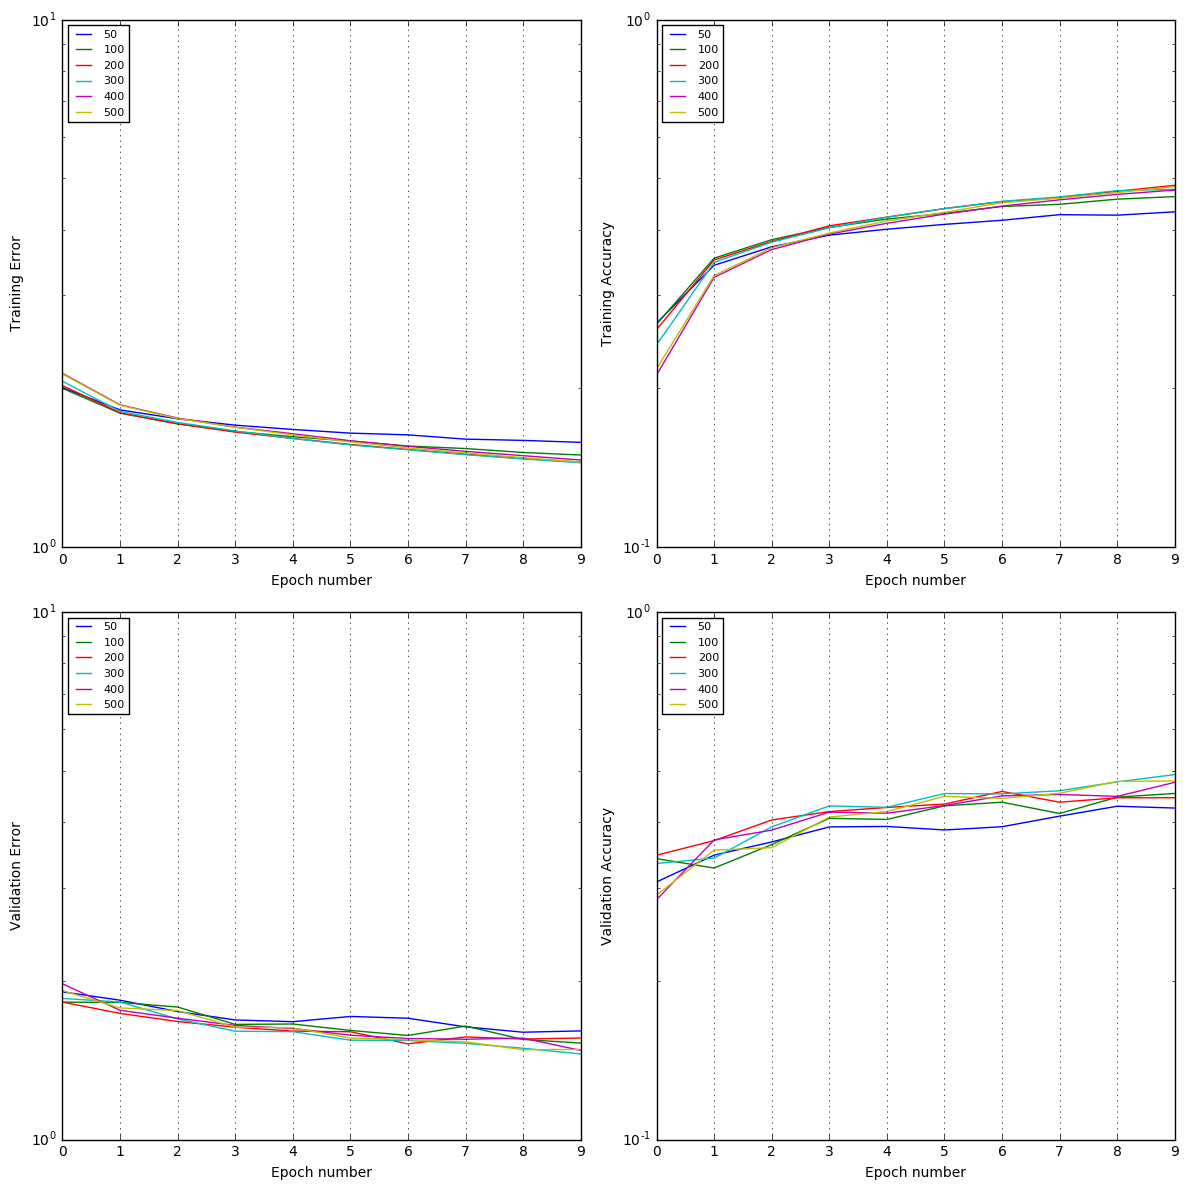

In [213]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(GD_05_2_50_10_sigm_err_t, label='50')
ax1.plot(GD_05_2_100_10_sigm_err_t, label='100')
ax1.plot(GD_05_2_sigm_err_t, label='200')
ax1.plot(GD_05_2_300_10_sigm_err_t, label='300')
ax1.plot(GD_05_2_400_10_sigm_err_t, label='400')
ax1.plot(GD_05_2_500_10_sigm_err_t, label='500')
ax2.plot(GD_05_2_50_10_sigm_acc_t, label='50')
ax2.plot(GD_05_2_100_10_sigm_acc_t, label='100')
ax2.plot(GD_05_2_sigm_acc_t, label='200')
ax2.plot(GD_05_2_300_10_sigm_acc_t, label='300')
ax2.plot(GD_05_2_400_10_sigm_acc_t, label='400')
ax2.plot(GD_05_2_500_10_sigm_acc_t, label='500')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('GD_05_sizes_train_10_sigm.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(GD_05_2_50_10_sigm_err_v, label='50')
ax3.plot(GD_05_2_100_10_sigm_err_v, label='100')
ax3.plot(GD_05_2_sigm_err_v, label='200')
ax3.plot(GD_05_2_300_10_sigm_err_v, label='300')
ax3.plot(GD_05_2_400_10_sigm_err_v, label='400')
ax3.plot(GD_05_2_500_10_sigm_err_v, label='500')
ax4.plot(GD_05_2_50_10_sigm_acc_v, label='50')
ax4.plot(GD_05_2_100_10_sigm_acc_v, label='100')
ax4.plot(GD_05_2_sigm_acc_v, label='200')
ax4.plot(GD_05_2_300_10_sigm_acc_v, label='300')
ax4.plot(GD_05_2_400_10_sigm_acc_v, label='400')
ax4.plot(GD_05_2_500_10_sigm_acc_v, label='500')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('GD_05_sizes_10_sigm.png',dpi=200)

In [31]:
# and over 50 epochs?

In [32]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 50
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =50

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_50_50_sigm_acc_v = []
GD_05_2_50_50_sigm_acc_t = []
GD_05_2_50_50_sigm_err_v = []
GD_05_2_50_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_50_50_sigm_err_t.append(running_error)
        GD_05_2_50_50_sigm_acc_t.append(running_accuracy)
        GD_05_2_50_50_sigm_err_v.append(valid_error)
        GD_05_2_50_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=1.99 acc(train)=0.27
                 err(valid)=1.88 acc(valid)=0.31
End of epoch 02: err(train)=1.81 acc(train)=0.35
                 err(valid)=1.74 acc(valid)=0.38
End of epoch 03: err(train)=1.74 acc(train)=0.37
                 err(valid)=1.76 acc(valid)=0.36
End of epoch 04: err(train)=1.70 acc(train)=0.39
                 err(valid)=1.68 acc(valid)=0.40
End of epoch 05: err(train)=1.66 acc(train)=0.40
                 err(valid)=1.69 acc(valid)=0.39
End of epoch 06: err(train)=1.63 acc(train)=0.41
                 err(valid)=1.62 acc(valid)=0.42
End of epoch 07: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.62 acc(valid)=0.42
End of epoch 08: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.62 acc(valid)=0.42
End of epoch 09: err(train)=1.57 acc(train)=0.44
                 err(valid)=1.60 acc(valid)=0.44
End of epoch 10: err(train)=1.55 acc(train)=0.44
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 11: err

In [33]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 100
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =100

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_100_50_sigm_acc_v = []
GD_05_2_100_50_sigm_acc_t = []
GD_05_2_100_50_sigm_err_v = []
GD_05_2_100_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_100_50_sigm_err_t.append(running_error)
        GD_05_2_100_50_sigm_acc_t.append(running_accuracy)
        GD_05_2_100_50_sigm_err_v.append(valid_error)
        GD_05_2_100_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.00 acc(train)=0.27
                 err(valid)=1.87 acc(valid)=0.32
End of epoch 02: err(train)=1.79 acc(train)=0.35
                 err(valid)=1.75 acc(valid)=0.36
End of epoch 03: err(train)=1.72 acc(train)=0.38
                 err(valid)=1.68 acc(valid)=0.39
End of epoch 04: err(train)=1.67 acc(train)=0.40
                 err(valid)=1.75 acc(valid)=0.38
End of epoch 05: err(train)=1.62 acc(train)=0.42
                 err(valid)=1.64 acc(valid)=0.40
End of epoch 06: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 07: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 08: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 09: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.54 acc(valid)=0.45
End of epoch 10: err(train)=1.49 acc(train)=0.46
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 11: err

In [228]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 300
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =300

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_300_50_sigm_acc_v = []
GD_05_2_300_50_sigm_acc_t = []
GD_05_2_300_50_sigm_err_v = []
GD_05_2_300_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_300_50_sigm_err_t.append(running_error)
        GD_05_2_300_50_sigm_acc_t.append(running_accuracy)
        GD_05_2_300_50_sigm_err_v.append(valid_error)
        GD_05_2_300_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.14 acc(train)=0.20
                 err(valid)=1.89 acc(valid)=0.32
End of epoch 02: err(train)=1.85 acc(train)=0.33
                 err(valid)=1.77 acc(valid)=0.35
End of epoch 03: err(train)=1.75 acc(train)=0.37
                 err(valid)=1.70 acc(valid)=0.39
End of epoch 04: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.76 acc(valid)=0.37
End of epoch 05: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.61 acc(valid)=0.42
End of epoch 06: err(train)=1.60 acc(train)=0.43
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 07: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 08: err(train)=1.52 acc(train)=0.45
                 err(valid)=1.53 acc(valid)=0.45
End of epoch 09: err(train)=1.49 acc(train)=0.46
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 10: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.51 acc(valid)=0.46
End of epoch 11: err

In [35]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 400
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =400

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_400_50_sigm_acc_v = []
GD_05_2_400_50_sigm_acc_t = []
GD_05_2_400_50_sigm_err_v = []
GD_05_2_400_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_400_50_sigm_err_t.append(running_error)
        GD_05_2_400_50_sigm_acc_t.append(running_accuracy)
        GD_05_2_400_50_sigm_err_v.append(valid_error)
        GD_05_2_400_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.09 acc(train)=0.23
                 err(valid)=1.95 acc(valid)=0.27
End of epoch 02: err(train)=1.83 acc(train)=0.34
                 err(valid)=1.77 acc(valid)=0.36
End of epoch 03: err(train)=1.74 acc(train)=0.37
                 err(valid)=1.68 acc(valid)=0.40
End of epoch 04: err(train)=1.68 acc(train)=0.39
                 err(valid)=1.73 acc(valid)=0.37
End of epoch 05: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.69 acc(valid)=0.39
End of epoch 06: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.55 acc(valid)=0.44
End of epoch 07: err(train)=1.54 acc(train)=0.44
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 08: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 09: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.51 acc(valid)=0.47
End of epoch 10: err(train)=1.45 acc(train)=0.48
                 err(valid)=1.50 acc(valid)=0.46
End of epoch 11: err

In [46]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_05_2_500_50_sigm_acc_v = []
GD_05_2_500_50_sigm_acc_t = []
GD_05_2_500_50_sigm_err_v = []
GD_05_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_05_2_500_50_sigm_err_t.append(running_error)
        GD_05_2_500_50_sigm_acc_t.append(running_accuracy)
        GD_05_2_500_50_sigm_err_v.append(valid_error)
        GD_05_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.11 acc(train)=0.22
                 err(valid)=2.05 acc(valid)=0.25
End of epoch 02: err(train)=1.84 acc(train)=0.33
                 err(valid)=1.77 acc(valid)=0.36
End of epoch 03: err(train)=1.74 acc(train)=0.37
                 err(valid)=1.76 acc(valid)=0.37
End of epoch 04: err(train)=1.68 acc(train)=0.40
                 err(valid)=1.71 acc(valid)=0.39
End of epoch 05: err(train)=1.63 acc(train)=0.41
                 err(valid)=1.62 acc(valid)=0.42
End of epoch 06: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 07: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 08: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 09: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.65 acc(valid)=0.42
End of epoch 10: err(train)=1.45 acc(train)=0.48
                 err(valid)=1.51 acc(valid)=0.47
End of epoch 11: err

In [229]:
# final values
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 50')
print('    final error(train) = {}').format(GD_05_2_50_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_50_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_50_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_50_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 100')
print('    final error(train) = {}').format(GD_05_2_100_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_100_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_100_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_100_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 200')
print('    final error(train) = {}').format(GD_05_2_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 300')
print('    final error(train) = {}').format(GD_05_2_300_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_300_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_300_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_300_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 400')
print('    final error(train) = {}').format(GD_05_2_400_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_400_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_400_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_400_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(GD_05_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 50
    final error(train) = 1.29866509445
    final error(valid) = 1.52165999651
    final acc(train)   = 0.533275000863
    final acc(valid)   = 0.470099998116
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 100
    final error(train) = 1.21593961194
    final error(valid) = 1.48222705305
    final acc(train)   = 0.563500002027
    final acc(valid)   = 0.479499997348
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, size 200
    final error(train) = 1.07577846602
    final error(valid) = 1.47996386945
    final acc(train)   = 0.613200004324
    final acc(valid)   = 0.493499999046
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 50 epochs, 

In [230]:
print(len(GD_05_2_300_50_sigm_err_t))

50


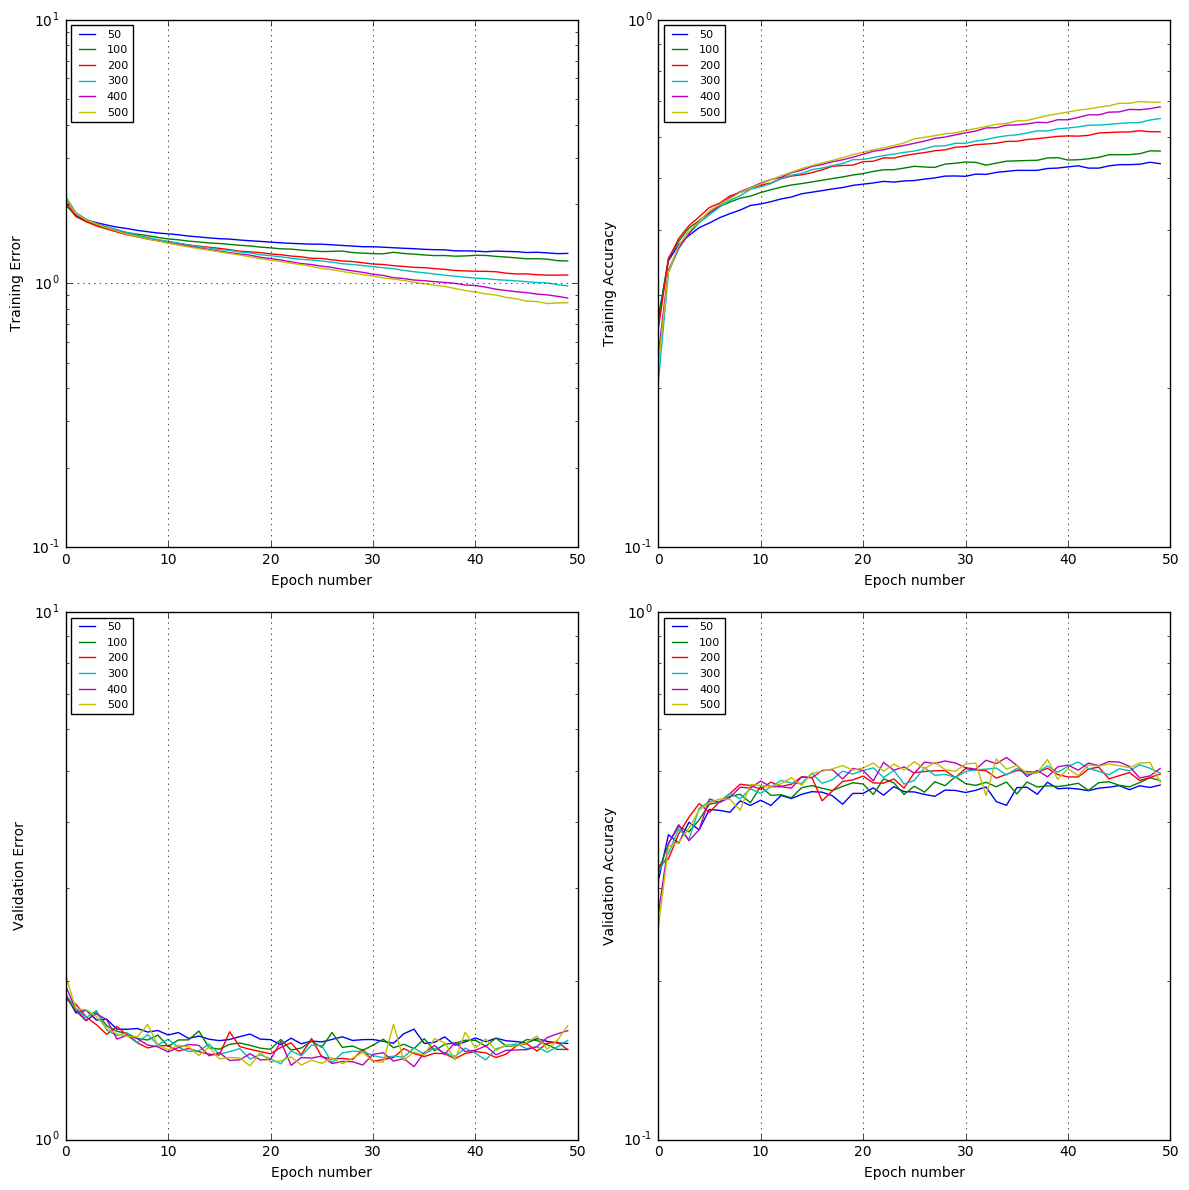

In [248]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(GD_05_2_50_50_sigm_err_t, label='50')
ax1.plot(GD_05_2_100_50_sigm_err_t, label='100')
ax1.plot(GD_05_2_50_sigm_err_t, label='200')
ax1.plot(GD_05_2_300_50_sigm_err_t, label='300')
ax1.plot(GD_05_2_400_50_sigm_err_t, label='400')
ax1.plot(GD_05_2_500_50_sigm_err_t, label='500')
ax2.plot(GD_05_2_50_50_sigm_acc_t, label='50')
ax2.plot(GD_05_2_100_50_sigm_acc_t, label='100')
ax2.plot(GD_05_2_50_sigm_acc_t, label='200')
ax2.plot(GD_05_2_300_50_sigm_acc_t, label='300')
ax2.plot(GD_05_2_400_50_sigm_acc_t, label='400')
ax2.plot(GD_05_2_500_50_sigm_acc_t, label='500')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('GD_05_sizes_train_10_sigm.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(GD_05_2_50_50_sigm_err_v, label='50')
ax3.plot(GD_05_2_100_50_sigm_err_v, label='100')
ax3.plot(GD_05_2_50_sigm_err_v, label='200')
ax3.plot(GD_05_2_300_50_sigm_err_v, label='300')
ax3.plot(GD_05_2_400_50_sigm_err_v, label='400')
ax3.plot(GD_05_2_500_50_sigm_err_v, label='500')
ax4.plot(GD_05_2_50_50_sigm_acc_v, label='50')
ax4.plot(GD_05_2_100_50_sigm_acc_v, label='100')
ax4.plot(GD_05_2_50_sigm_acc_v, label='200')
ax4.plot(GD_05_2_300_50_sigm_acc_v, label='300')
ax4.plot(GD_05_2_400_50_sigm_acc_v, label='400')
ax4.plot(GD_05_2_500_50_sigm_acc_v, label='500')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('GD_05_sizes_50_sigm.png',dpi=200)

In [ ]:
# batch size?

In [58]:
# 300 size for 10 epochs, 500 for 50
# using only 50 epochs now
# another learning rate for gradient descent, momentum, adagrad, adam?

In [59]:
# gradient descent 0.1, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
GD_01_2_500_50_sigm_acc_v = []
GD_01_2_500_50_sigm_acc_t = []
GD_01_2_500_50_sigm_err_v = []
GD_01_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        GD_01_2_500_50_sigm_err_t.append(running_error)
        GD_01_2_500_50_sigm_acc_t.append(running_accuracy)
        GD_01_2_500_50_sigm_err_v.append(valid_error)
        GD_01_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=0.20 acc(train)=0.01
                 err(valid)=2.35 acc(valid)=0.14
End of epoch 02: err(train)=2.03 acc(train)=0.25
                 err(valid)=1.89 acc(valid)=0.31
End of epoch 03: err(train)=1.87 acc(train)=0.33
                 err(valid)=1.83 acc(valid)=0.35
End of epoch 04: err(train)=1.80 acc(train)=0.36
                 err(valid)=1.78 acc(valid)=0.37
End of epoch 05: err(train)=1.76 acc(train)=0.37
                 err(valid)=1.74 acc(valid)=0.38
End of epoch 06: err(train)=1.72 acc(train)=0.39
                 err(valid)=1.71 acc(valid)=0.39
End of epoch 07: err(train)=1.68 acc(train)=0.40
                 err(valid)=1.66 acc(valid)=0.41
End of epoch 08: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.66 acc(valid)=0.41
End of epoch 09: err(train)=1.62 acc(train)=0.42
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 10: err(train)=1.60 acc(train)=0.43
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 11: err

In [69]:
# momentum 0.01, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.MomentumOptimizer(learning_rate=0.01, momentum = 0.9).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
MOM_01_2_500_50_sigm_acc_v = []
MOM_01_2_500_50_sigm_acc_t = []
MOM_01_2_500_50_sigm_err_v = []
MOM_01_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        MOM_01_2_500_50_sigm_err_t.append(running_error)
        MOM_01_2_500_50_sigm_acc_t.append(running_accuracy)
        MOM_01_2_500_50_sigm_err_v.append(valid_error)
        MOM_01_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.03 acc(train)=0.26
                 err(valid)=1.94 acc(valid)=0.29
End of epoch 02: err(train)=1.85 acc(train)=0.34
                 err(valid)=1.88 acc(valid)=0.32
End of epoch 03: err(train)=1.79 acc(train)=0.36
                 err(valid)=1.77 acc(valid)=0.37
End of epoch 04: err(train)=1.74 acc(train)=0.38
                 err(valid)=1.74 acc(valid)=0.38
End of epoch 05: err(train)=1.69 acc(train)=0.40
                 err(valid)=1.70 acc(valid)=0.40
End of epoch 06: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.67 acc(valid)=0.41
End of epoch 07: err(train)=1.62 acc(train)=0.42
                 err(valid)=1.68 acc(valid)=0.41
End of epoch 08: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 09: err(train)=1.56 acc(train)=0.45
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 10: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 11: err

In [61]:
# Adagrad 0.1, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADA_01_2_500_50_sigm_acc_v = []
ADA_01_2_500_50_sigm_acc_t = []
ADA_01_2_500_50_sigm_err_v = []
ADA_01_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADA_01_2_500_50_sigm_err_t.append(running_error)
        ADA_01_2_500_50_sigm_acc_t.append(running_accuracy)
        ADA_01_2_500_50_sigm_err_v.append(valid_error)
        ADA_01_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.05 acc(train)=0.26
                 err(valid)=1.85 acc(valid)=0.34
End of epoch 02: err(train)=1.82 acc(train)=0.35
                 err(valid)=1.78 acc(valid)=0.36
End of epoch 03: err(train)=1.73 acc(train)=0.38
                 err(valid)=1.70 acc(valid)=0.39
End of epoch 04: err(train)=1.67 acc(train)=0.40
                 err(valid)=1.64 acc(valid)=0.41
End of epoch 05: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 06: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 07: err(train)=1.55 acc(train)=0.44
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 08: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.51 acc(valid)=0.47
End of epoch 09: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.49 acc(valid)=0.47
End of epoch 10: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.49 acc(valid)=0.47
End of epoch 11: err

In [62]:
# Adagrad 0.01, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADA_001_2_500_50_sigm_acc_v = []
ADA_001_2_500_50_sigm_acc_t = []
ADA_001_2_500_50_sigm_err_v = []
ADA_001_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADA_001_2_500_50_sigm_err_t.append(running_error)
        ADA_001_2_500_50_sigm_acc_t.append(running_accuracy)
        ADA_001_2_500_50_sigm_err_v.append(valid_error)
        ADA_001_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.14 acc(train)=0.22
                 err(valid)=2.01 acc(valid)=0.28
End of epoch 02: err(train)=1.95 acc(train)=0.31
                 err(valid)=1.90 acc(valid)=0.33
End of epoch 03: err(train)=1.88 acc(train)=0.34
                 err(valid)=1.86 acc(valid)=0.34
End of epoch 04: err(train)=1.84 acc(train)=0.35
                 err(valid)=1.83 acc(valid)=0.36
End of epoch 05: err(train)=1.82 acc(train)=0.36
                 err(valid)=1.82 acc(valid)=0.37
End of epoch 06: err(train)=1.79 acc(train)=0.37
                 err(valid)=1.80 acc(valid)=0.37
End of epoch 07: err(train)=1.78 acc(train)=0.38
                 err(valid)=1.77 acc(valid)=0.38
End of epoch 08: err(train)=1.76 acc(train)=0.38
                 err(valid)=1.78 acc(valid)=0.38
End of epoch 09: err(train)=1.75 acc(train)=0.39
                 err(valid)=1.76 acc(valid)=0.38
End of epoch 10: err(train)=1.73 acc(train)=0.39
                 err(valid)=1.77 acc(valid)=0.39
End of epoch 11: err

In [63]:
# Adam 0.001, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_0001_2_500_50_sigm_acc_v = []
ADAM_0001_2_500_50_sigm_acc_t = []
ADAM_0001_2_500_50_sigm_err_v = []
ADAM_0001_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_0001_2_500_50_sigm_err_t.append(running_error)
        ADAM_0001_2_500_50_sigm_acc_t.append(running_accuracy)
        ADAM_0001_2_500_50_sigm_err_v.append(valid_error)
        ADAM_0001_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=1.91 acc(train)=0.30
                 err(valid)=1.78 acc(valid)=0.35
End of epoch 02: err(train)=1.75 acc(train)=0.37
                 err(valid)=1.72 acc(valid)=0.38
End of epoch 03: err(train)=1.68 acc(train)=0.40
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 04: err(train)=1.63 acc(train)=0.41
                 err(valid)=1.64 acc(valid)=0.41
End of epoch 05: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.69 acc(valid)=0.37
End of epoch 06: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.62 acc(valid)=0.42
End of epoch 07: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 08: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 09: err(train)=1.52 acc(train)=0.45
                 err(valid)=1.57 acc(valid)=0.43
End of epoch 10: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.59 acc(valid)=0.43
End of epoch 11: err

In [64]:
# Adam 0.01, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.01).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_001_2_500_50_sigm_acc_v = []
ADAM_001_2_500_50_sigm_acc_t = []
ADAM_001_2_500_50_sigm_err_v = []
ADAM_001_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_001_2_500_50_sigm_err_t.append(running_error)
        ADAM_001_2_500_50_sigm_acc_t.append(running_accuracy)
        ADAM_001_2_500_50_sigm_err_v.append(valid_error)
        ADAM_001_2_500_50_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=2.43 acc(train)=0.11
                 err(valid)=2.31 acc(valid)=0.17
End of epoch 02: err(train)=2.26 acc(train)=0.15
                 err(valid)=2.21 acc(valid)=0.16
End of epoch 03: err(train)=2.23 acc(train)=0.15
                 err(valid)=2.26 acc(valid)=0.14
End of epoch 04: err(train)=2.25 acc(train)=0.15
                 err(valid)=2.32 acc(valid)=0.16
End of epoch 05: err(train)=2.25 acc(train)=0.15
                 err(valid)=2.38 acc(valid)=0.16
End of epoch 06: err(train)=2.24 acc(train)=0.16
                 err(valid)=2.35 acc(valid)=0.15
End of epoch 07: err(train)=2.26 acc(train)=0.15
                 err(valid)=2.20 acc(valid)=0.16
End of epoch 08: err(train)=2.23 acc(train)=0.16
                 err(valid)=2.18 acc(valid)=0.18
End of epoch 09: err(train)=2.23 acc(train)=0.16
                 err(valid)=2.22 acc(valid)=0.16
End of epoch 10: err(train)=2.25 acc(train)=0.15
                 err(valid)=2.42 acc(valid)=0.12
End of epoch 11: err

In [76]:
# Adam 0.0001, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_sigm_acc_v = []
ADAM_00001_2_500_50_sigm_acc_t = []
ADAM_00001_2_500_50_sigm_err_v = []
ADAM_00001_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_sigm_err_t.append(running_error)
        ADAM_00001_2_500_50_sigm_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_sigm_err_v.append(valid_error)
        ADAM_00001_2_500_50_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=1.97 acc(train)=0.29
                 err(valid)=1.84 acc(valid)=0.36
End of epoch 02: err(train)=1.80 acc(train)=0.37
                 err(valid)=1.77 acc(valid)=0.37
End of epoch 03: err(train)=1.74 acc(train)=0.39
                 err(valid)=1.72 acc(valid)=0.40
End of epoch 04: err(train)=1.68 acc(train)=0.41
                 err(valid)=1.69 acc(valid)=0.40
End of epoch 05: err(train)=1.64 acc(train)=0.42
                 err(valid)=1.64 acc(valid)=0.43
End of epoch 06: err(train)=1.61 acc(train)=0.43
                 err(valid)=1.61 acc(valid)=0.44
End of epoch 07: err(train)=1.58 acc(train)=0.45
                 err(valid)=1.60 acc(valid)=0.44
End of epoch 08: err(train)=1.55 acc(train)=0.45
                 err(valid)=1.58 acc(valid)=0.45
End of epoch 09: err(train)=1.53 acc(train)=0.46
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 10: err(train)=1.51 acc(train)=0.47
                 err(valid)=1.54 acc(valid)=0.46
End of epoch 11: err

In [77]:
# final values
print('-------------------------------------------------------------')
print('Gradiend Descent 0.5, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(GD_05_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_05_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_05_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_05_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent 0.1, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(GD_01_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(GD_01_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(GD_01_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(GD_01_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Momentum 0.01, 0.9, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(MOM_01_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(MOM_01_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(MOM_01_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(MOM_01_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adagrad 0.1, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(ADA_01_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(ADA_01_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(ADA_01_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(ADA_01_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adagrad 0.01, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(ADA_001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(ADA_001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(ADA_001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(ADA_001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.01, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(ADAM_001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(ADAM_001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.001, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(ADAM_0001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(ADAM_0001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_0001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_0001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Gradiend Descent 0.5, 2 layers, sigmoid activation over 50 epochs, size 500
    final error(train) = 0.844777286761
    final error(valid) = 1.64379114985
    final acc(train)   = 0.697650003619
    final acc(valid)   = 0.475999999046
-------------------------------------------------------------
Gradiend Descent 0.1, 2 layers, sigmoid activation over 50 epochs, size 500
    final error(train) = 1.08581269525
    final error(valid) = 1.39175763845
    final acc(train)   = 0.61222500328
    final acc(valid)   = 0.521499999315
-------------------------------------------------------------
Momentum 0.01, 0.9, 2 layers, sigmoid activation over 50 epochs, size 500
    final error(train) = 0.979493660927
    final error(valid) = 1.41402781278
    final acc(train)   = 0.64902500473
    final acc(valid)   = 0.530300000757
-------------------------------------------------------------
Adagrad 0.1, 2 layers, sigmoid activation over 50 ep

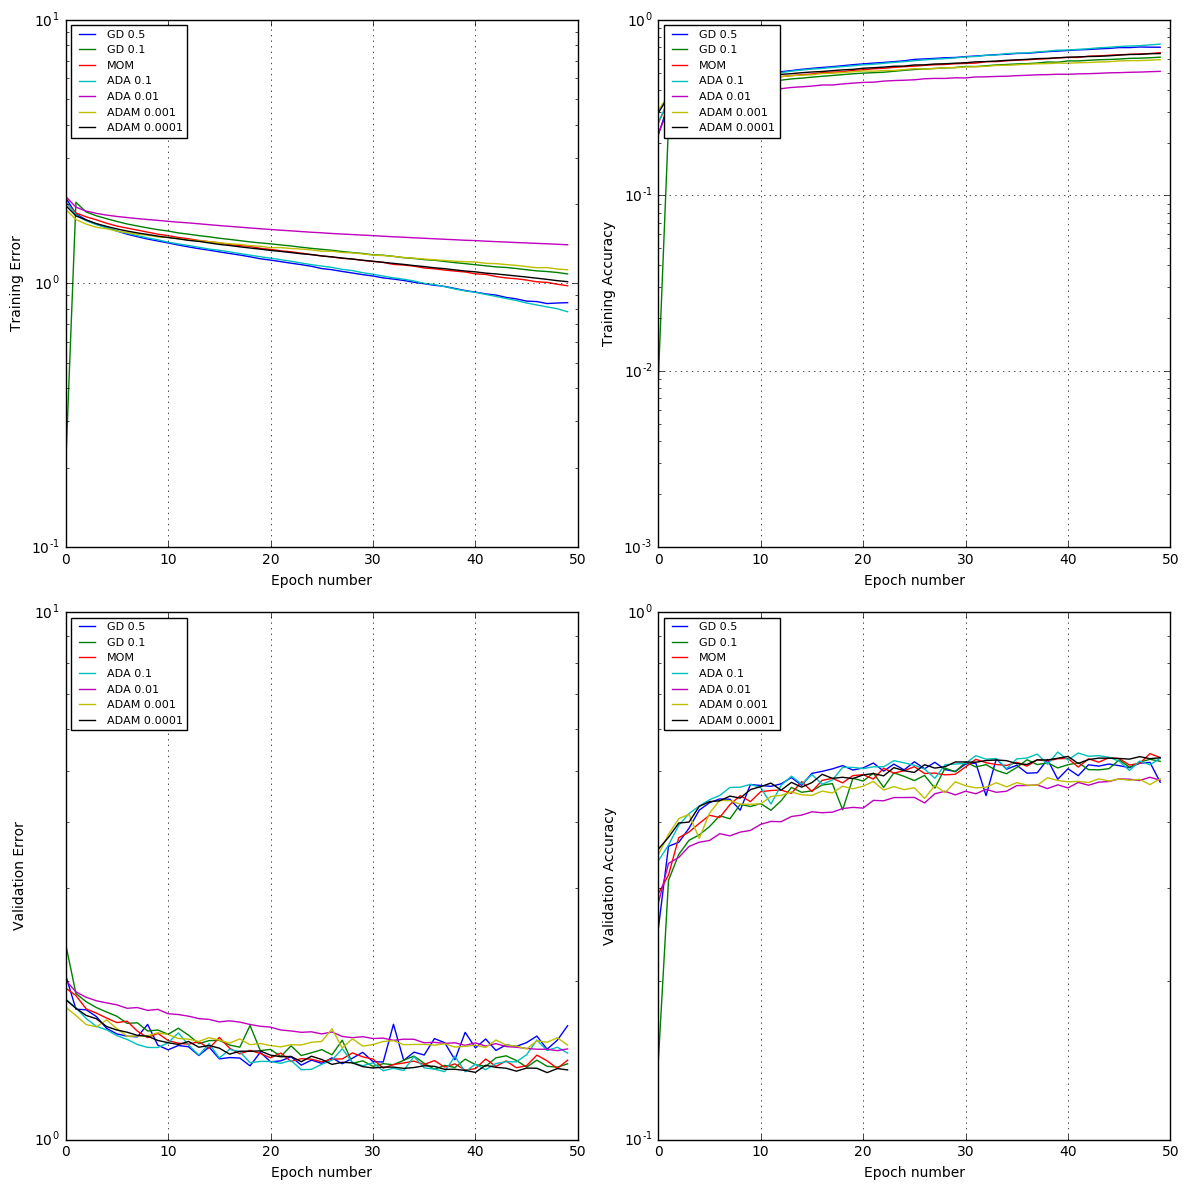

In [233]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(GD_05_2_500_50_sigm_err_t, label='GD 0.5')
ax1.plot(GD_01_2_500_50_sigm_err_t, label='GD 0.1')
ax1.plot(MOM_01_2_500_50_sigm_err_t, label='MOM')
ax1.plot(ADA_01_2_500_50_sigm_err_t, label='ADA 0.1')
ax1.plot(ADA_001_2_500_50_sigm_err_t, label='ADA 0.01')
#ax1.plot(ADAM_001_2_500_50_sigm_err_t, label='ADAM 0.01')
ax1.plot(ADAM_0001_2_500_50_sigm_err_t, label='ADAM 0.001')
ax1.plot(ADAM_00001_2_500_50_sigm_err_t, label='ADAM 0.0001')
ax2.plot(GD_05_2_500_50_sigm_acc_t, label='GD 0.5')
ax2.plot(GD_01_2_500_50_sigm_acc_t, label='GD 0.1')
ax2.plot(MOM_01_2_500_50_sigm_acc_t, label='MOM')
ax2.plot(ADA_01_2_500_50_sigm_acc_t, label='ADA 0.1')
ax2.plot(ADA_001_2_500_50_sigm_acc_t, label='ADA 0.01')
#ax2.plot(ADAM_001_2_500_50_sigm_acc_t, label='ADAM 0.01')
ax2.plot(ADAM_0001_2_500_50_sigm_acc_t, label='ADAM 0.001')
ax2.plot(ADAM_00001_2_500_50_sigm_acc_t, label='ADAM 0.0001')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('optimizers_train_50_sigm.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(GD_05_2_500_50_sigm_err_v, label='GD 0.5')
ax3.plot(GD_01_2_500_50_sigm_err_v, label='GD 0.1')
ax3.plot(MOM_01_2_500_50_sigm_err_v, label='MOM')
ax3.plot(ADA_01_2_500_50_sigm_err_v, label='ADA 0.1')
ax3.plot(ADA_001_2_500_50_sigm_err_v, label='ADA 0.01')
#ax1.plot(ADAM_001_2_500_50_sigm_err_v, label='ADAM 0.01')
ax3.plot(ADAM_0001_2_500_50_sigm_err_v, label='ADAM 0.001')
ax3.plot(ADAM_00001_2_500_50_sigm_err_v, label='ADAM 0.0001')
ax4.plot(GD_05_2_500_50_sigm_acc_v, label='GD 0.5')
ax4.plot(GD_01_2_500_50_sigm_acc_v, label='GD 0.1')
ax4.plot(MOM_01_2_500_50_sigm_acc_v, label='MOM')
ax4.plot(ADA_01_2_500_50_sigm_acc_v, label='ADA 0.1')
ax4.plot(ADA_001_2_500_50_sigm_acc_v, label='ADA 0.01')
#ax2.plot(ADAM_001_2_500_50_sigm_acc_v, label='ADAM 0.01')
ax4.plot(ADAM_0001_2_500_50_sigm_acc_v, label='ADAM 0.001')
ax4.plot(ADAM_00001_2_500_50_sigm_acc_v, label='ADAM 0.0001')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('optimizers_50_sigm.png',dpi=200)

In [ ]:
# ada gave good results, adam as well 
# so, change sigmoid to tanh or relu for 

In [82]:
# Adam 0.0001, 2 hidden layer, tanh, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_tanh(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_tanh(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_tanh(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_tanh_acc_v = []
ADAM_00001_2_500_50_tanh_acc_t = []
ADAM_00001_2_500_50_tanh_err_v = []
ADAM_00001_2_500_50_tanh_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_tanh_err_t.append(running_error)
        ADAM_00001_2_500_50_tanh_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_tanh_err_v.append(valid_error)
        ADAM_00001_2_500_50_tanh_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=1.83 acc(train)=0.35
                 err(valid)=1.72 acc(valid)=0.39
End of epoch 02: err(train)=1.65 acc(train)=0.42
                 err(valid)=1.61 acc(valid)=0.44
End of epoch 03: err(train)=1.58 acc(train)=0.44
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 04: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 05: err(train)=1.47 acc(train)=0.48
                 err(valid)=1.50 acc(valid)=0.47
End of epoch 06: err(train)=1.43 acc(train)=0.50
                 err(valid)=1.47 acc(valid)=0.49
End of epoch 07: err(train)=1.39 acc(train)=0.51
                 err(valid)=1.45 acc(valid)=0.49
End of epoch 08: err(train)=1.36 acc(train)=0.52
                 err(valid)=1.43 acc(valid)=0.50
End of epoch 09: err(train)=1.32 acc(train)=0.53
                 err(valid)=1.43 acc(valid)=0.50
End of epoch 10: err(train)=1.29 acc(train)=0.55
                 err(valid)=1.41 acc(valid)=0.50
End of epoch 11: err

In [83]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_relu_acc_v = []
ADAM_00001_2_500_50_relu_acc_t = []
ADAM_00001_2_500_50_relu_err_v = []
ADAM_00001_2_500_50_relu_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_relu_err_t.append(running_error)
        ADAM_00001_2_500_50_relu_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_relu_err_v.append(valid_error)
        ADAM_00001_2_500_50_relu_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=1.85 acc(train)=0.34
                 err(valid)=1.71 acc(valid)=0.40
End of epoch 02: err(train)=1.66 acc(train)=0.41
                 err(valid)=1.66 acc(valid)=0.42
End of epoch 03: err(train)=1.58 acc(train)=0.44
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 04: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.53 acc(valid)=0.46
End of epoch 05: err(train)=1.47 acc(train)=0.48
                 err(valid)=1.53 acc(valid)=0.46
End of epoch 06: err(train)=1.43 acc(train)=0.50
                 err(valid)=1.49 acc(valid)=0.47
End of epoch 07: err(train)=1.39 acc(train)=0.51
                 err(valid)=1.48 acc(valid)=0.48
End of epoch 08: err(train)=1.36 acc(train)=0.52
                 err(valid)=1.45 acc(valid)=0.49
End of epoch 09: err(train)=1.33 acc(train)=0.53
                 err(valid)=1.43 acc(valid)=0.50
End of epoch 10: err(train)=1.29 acc(train)=0.54
                 err(valid)=1.44 acc(valid)=0.49
End of epoch 11: err

In [84]:
print('-------------------------------------------------------------')
print('Adam 0.001, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.001, 2 layers, tanh activation over 50 epochs, size 500')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_tanh_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_tanh_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_tanh_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_tanh_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.001, 2 layers, relu activation over 50 epochs, size 500')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_relu_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_relu_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_relu_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_relu_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Adam 0.001, 2 layers, sigmoid activation over 50 epochs, size 500
    final error(train) = 1.01490816727
    final error(valid) = 1.35510250896
    final acc(train)   = 0.642075005434
    final acc(valid)   = 0.529699999392
-------------------------------------------------------------
Adam 0.001, 2 layers, tanh activation over 50 epochs, size 500
    final error(train) = 0.501225885097
    final error(valid) = 1.45249499053
    final acc(train)   = 0.844199994951
    final acc(valid)   = 0.544800000638
-------------------------------------------------------------
Adam 0.001, 2 layers, relu activation over 50 epochs, size 500
    final error(train) = 0.473099276796
    final error(valid) = 1.6637771365
    final acc(train)   = 0.845774994493
    final acc(valid)   = 0.536499999464
-------------------------------------------------------------


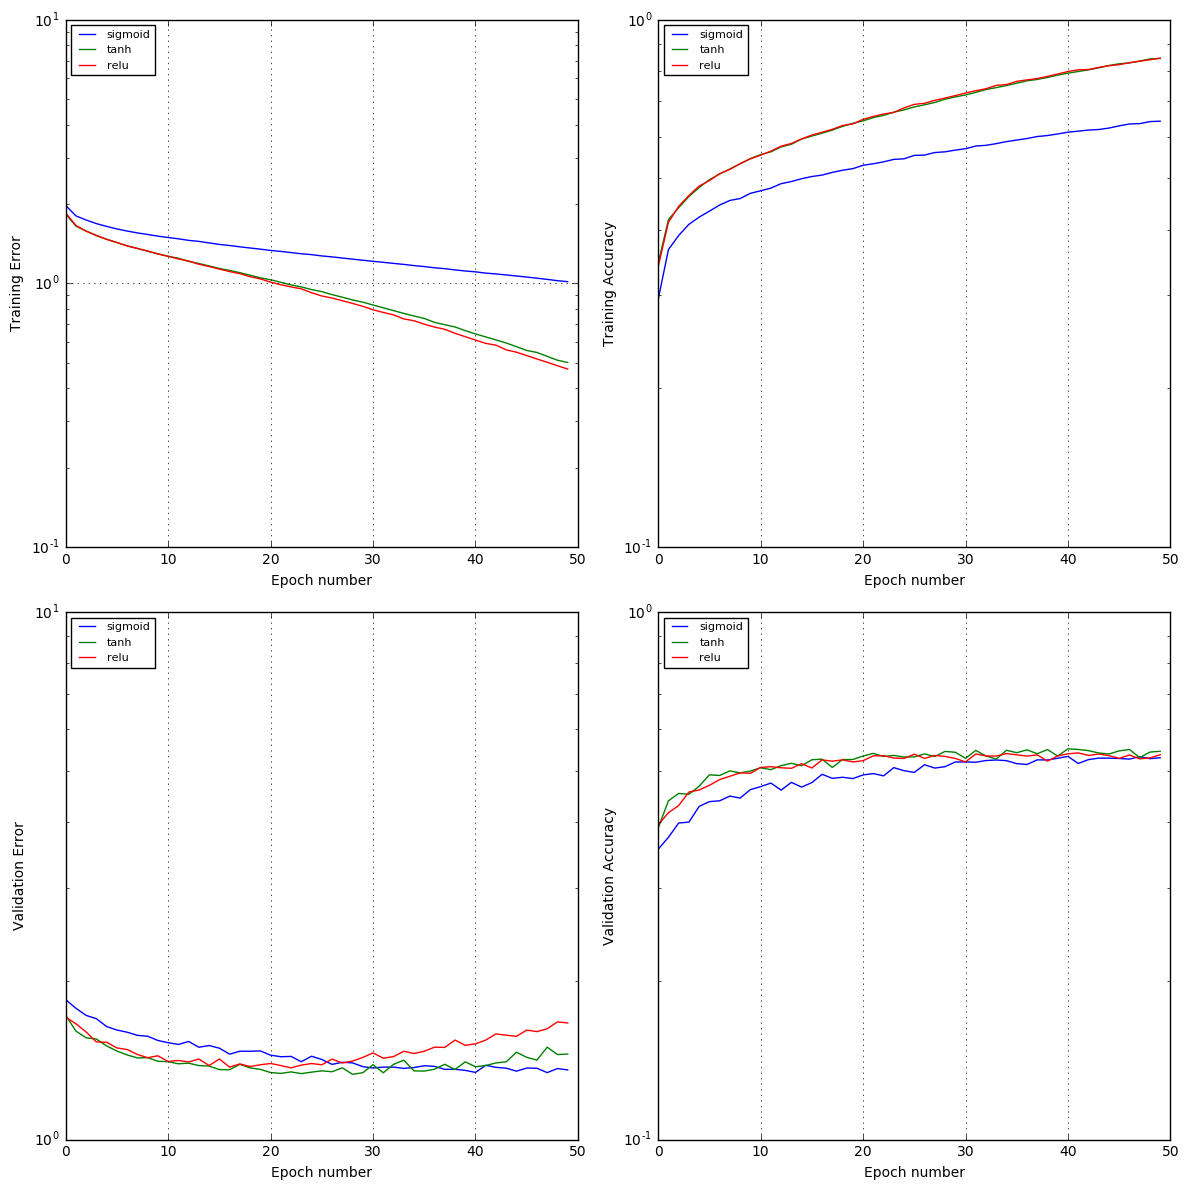

In [234]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(ADAM_00001_2_500_50_sigm_err_t, label='sigmoid')
ax1.plot(ADAM_00001_2_500_50_tanh_err_t, label='tanh')
ax1.plot(ADAM_00001_2_500_50_relu_err_t, label='relu')
ax2.plot(ADAM_00001_2_500_50_sigm_acc_t, label='sigmoid')
ax2.plot(ADAM_00001_2_500_50_tanh_acc_t, label='tanh')
ax2.plot(ADAM_00001_2_500_50_relu_acc_t, label='relu')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('ADAM_train_50_activ.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(ADAM_00001_2_500_50_sigm_err_v, label='sigmoid')
ax3.plot(ADAM_00001_2_500_50_tanh_err_v, label='tanh')
ax3.plot(ADAM_00001_2_500_50_relu_err_v, label='relu')
ax4.plot(ADAM_00001_2_500_50_sigm_acc_v, label='sigmoid')
ax4.plot(ADAM_00001_2_500_50_tanh_acc_v, label='tanh')
ax4.plot(ADAM_00001_2_500_50_relu_acc_v, label='relu')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('ADAM_50_activ.png',dpi=200)

In [ ]:
# relu perfomed ok, using relu from now on
# on to regularisation

In [120]:
# L2 + RELU
def fully_connected_layer_L2(penalty, inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    loss = penalty * (tf.reduce_sum(tf.square(weights)))
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases) 
    return outputs, loss

In [112]:
# L2 + RELU
# using l2_loss ??? SLOW
def fully_connected_layer_L2(penalty, inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    loss = penalty * tf.nn.l2_loss(weights)
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases) 
    return outputs, loss

In [123]:
# dropout + RELU
def fully_connected_layer_drop(prob, inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    outputs = tf.nn.dropout(outputs, prob)
    return outputs, weights

In [122]:
# dropout L2 + RELU
def fully_connected_layer_L2drop(prob, penalty, inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    loss = penalty * (tf.reduce_sum(tf.square(weights)))
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    outputs = tf.nn.dropout(outputs, prob)
    return outputs, loss

In [125]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, 0.01 L2 penalty
# try l2_loss outside
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_L2(0.01,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_L2(0.01,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_L2(0.01,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets)) + loss_1 + loss_2 +loss_out)
with tf.name_scope('error_val'):
    error_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_relu_001L2_acc_v = []
ADAM_00001_2_500_50_relu_001L2_acc_t = []
ADAM_00001_2_500_50_relu_001L2_err_v = []
ADAM_00001_2_500_50_relu_001L2_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error_val, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_relu_001L2_err_t.append(running_error)
        ADAM_00001_2_500_50_relu_001L2_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_relu_001L2_err_v.append(valid_error)
        ADAM_00001_2_500_50_relu_001L2_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=13.63 acc(train)=0.34
                 err(valid)=1.74 acc(valid)=0.39
End of epoch 02: err(train)=6.02 acc(train)=0.39
                 err(valid)=1.73 acc(valid)=0.39
End of epoch 03: err(train)=3.74 acc(train)=0.40
                 err(valid)=1.69 acc(valid)=0.40
End of epoch 04: err(train)=2.79 acc(train)=0.41
                 err(valid)=1.69 acc(valid)=0.40
End of epoch 05: err(train)=2.36 acc(train)=0.41
                 err(valid)=1.66 acc(valid)=0.42
End of epoch 06: err(train)=2.15 acc(train)=0.41
                 err(valid)=1.67 acc(valid)=0.42
End of epoch 07: err(train)=2.04 acc(train)=0.42
                 err(valid)=1.66 acc(valid)=0.41
End of epoch 08: err(train)=1.98 acc(train)=0.42
                 err(valid)=1.67 acc(valid)=0.41
End of epoch 09: err(train)=1.95 acc(train)=0.42
                 err(valid)=1.64 acc(valid)=0.43
End of epoch 10: err(train)=1.92 acc(train)=0.42
                 err(valid)=1.65 acc(valid)=0.42
End of epoch 11: er

In [126]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, 0.001 L2 penalty
# try l2_loss outside
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_L2(0.001,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_L2(0.001,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_L2(0.001,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets)) + loss_1 + loss_2 +loss_out)
with tf.name_scope('error_val'):
    error_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_relu_0001L2_acc_v = []
ADAM_00001_2_500_50_relu_0001L2_acc_t = []
ADAM_00001_2_500_50_relu_0001L2_err_v = []
ADAM_00001_2_500_50_relu_0001L2_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error_val, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_relu_0001L2_err_t.append(running_error)
        ADAM_00001_2_500_50_relu_0001L2_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_relu_0001L2_err_v.append(valid_error)
        ADAM_00001_2_500_50_relu_0001L2_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=3.54 acc(train)=0.34
                 err(valid)=1.76 acc(valid)=0.37
End of epoch 02: err(train)=2.88 acc(train)=0.41
                 err(valid)=1.63 acc(valid)=0.43
End of epoch 03: err(train)=2.59 acc(train)=0.44
                 err(valid)=1.59 acc(valid)=0.43
End of epoch 04: err(train)=2.41 acc(train)=0.46
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 05: err(train)=2.29 acc(train)=0.47
                 err(valid)=1.51 acc(valid)=0.47
End of epoch 06: err(train)=2.19 acc(train)=0.48
                 err(valid)=1.48 acc(valid)=0.48
End of epoch 07: err(train)=2.11 acc(train)=0.50
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 08: err(train)=2.04 acc(train)=0.50
                 err(valid)=1.49 acc(valid)=0.48
End of epoch 09: err(train)=1.98 acc(train)=0.51
                 err(valid)=1.50 acc(valid)=0.47
End of epoch 10: err(train)=1.93 acc(train)=0.52
                 err(valid)=1.42 acc(valid)=0.50
End of epoch 11: err

In [127]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, 0.0001 L2 penalty
# try without l2_loss SLOW
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_L2(0.0001,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_L2(0.0001,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_L2(0.0001,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets)) + loss_1 + loss_2 + loss_out)
with tf.name_scope('error_val'):
    error_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_relu_00001L2_acc_v = []
ADAM_00001_2_500_50_relu_00001L2_acc_t = []
ADAM_00001_2_500_50_relu_00001L2_err_v = []
ADAM_00001_2_500_50_relu_00001L2_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error_val, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_relu_00001L2_err_t.append(running_error)
        ADAM_00001_2_500_50_relu_00001L2_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_relu_00001L2_err_v.append(valid_error)
        ADAM_00001_2_500_50_relu_00001L2_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.05 acc(train)=0.34
                 err(valid)=1.71 acc(valid)=0.39
End of epoch 02: err(train)=1.84 acc(train)=0.41
                 err(valid)=1.62 acc(valid)=0.43
End of epoch 03: err(train)=1.75 acc(train)=0.44
                 err(valid)=1.58 acc(valid)=0.45
End of epoch 04: err(train)=1.68 acc(train)=0.47
                 err(valid)=1.51 acc(valid)=0.46
End of epoch 05: err(train)=1.62 acc(train)=0.48
                 err(valid)=1.50 acc(valid)=0.48
End of epoch 06: err(train)=1.57 acc(train)=0.50
                 err(valid)=1.49 acc(valid)=0.48
End of epoch 07: err(train)=1.53 acc(train)=0.51
                 err(valid)=1.46 acc(valid)=0.48
End of epoch 08: err(train)=1.49 acc(train)=0.52
                 err(valid)=1.44 acc(valid)=0.50
End of epoch 09: err(train)=1.46 acc(train)=0.53
                 err(valid)=1.44 acc(valid)=0.49
End of epoch 10: err(train)=1.43 acc(train)=0.54
                 err(valid)=1.41 acc(valid)=0.51
End of epoch 11: err

In [128]:
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.01 L2 penalty')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_relu_001L2_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_relu_001L2_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_relu_001L2_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_relu_001L2_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.001 L2 penalty')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_relu_0001L2_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_relu_0001L2_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_relu_0001L2_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_relu_0001L2_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.0001 L2 penalty')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_relu_00001L2_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_relu_00001L2_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_relu_00001L2_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_relu_00001L2_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.01 L2 penalty
    final error(train) = 1.84248255864
    final error(valid) = 1.6116620189
    final acc(train)   = 0.447449999023
    final acc(valid)   = 0.431000000164
-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.001 L2 penalty
    final error(train) = 1.26504225791
    final error(valid) = 1.3118030107
    final acc(train)   = 0.66200000558
    final acc(valid)   = 0.550200001448
-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.0001 L2 penalty
    final error(train) = 0.728926632814
    final error(valid) = 1.51463698149
    final acc(train)   = 0.811124995276
    final acc(valid)   = 0.54269999966
-------------------------------------------------------------


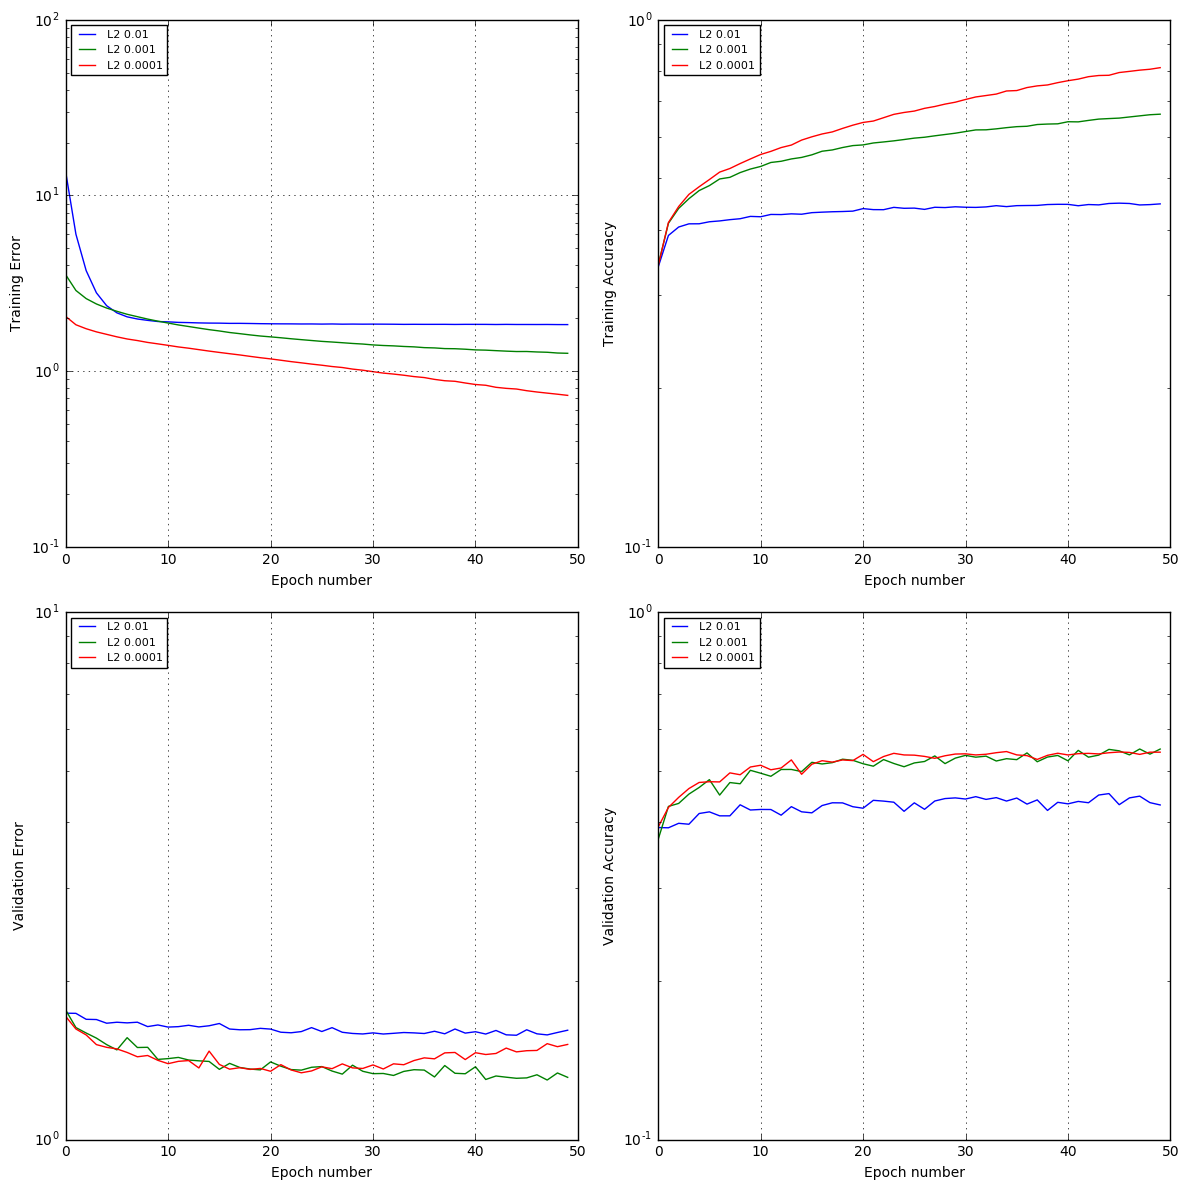

In [236]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(ADAM_00001_2_500_50_relu_001L2_err_t, label='L2 0.01')
ax1.plot(ADAM_00001_2_500_50_relu_0001L2_err_t, label='L2 0.001')
ax1.plot(ADAM_00001_2_500_50_relu_00001L2_err_t, label='L2 0.0001')
ax2.plot(ADAM_00001_2_500_50_relu_001L2_acc_t, label='L2 0.01')
ax2.plot(ADAM_00001_2_500_50_relu_0001L2_acc_t, label='L2 0.001')
ax2.plot(ADAM_00001_2_500_50_relu_00001L2_acc_t, label='L2 0.0001')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('ADAM_train_50_L2.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(ADAM_00001_2_500_50_relu_001L2_err_v, label='L2 0.01')
ax3.plot(ADAM_00001_2_500_50_relu_0001L2_err_v, label='L2 0.001')
ax3.plot(ADAM_00001_2_500_50_relu_00001L2_err_v, label='L2 0.0001')
ax4.plot(ADAM_00001_2_500_50_relu_001L2_acc_v, label='L2 0.01')
ax4.plot(ADAM_00001_2_500_50_relu_0001L2_acc_v, label='L2 0.001')
ax4.plot(ADAM_00001_2_500_50_relu_00001L2_acc_v, label='L2 0.0001')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('ADAM_50_L2.png',dpi=200)

In [130]:
# dropout?

In [131]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, dropout 0.5
# try without l2_loss SLOW
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_drop(0.5,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_drop(0.5,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_drop(0.5,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_relu_drop05_acc_v = []
ADAM_00001_2_500_50_relu_drop05_acc_t = []
ADAM_00001_2_500_50_relu_drop05_err_v = []
ADAM_00001_2_500_50_relu_drop05_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_relu_drop05_err_t.append(running_error)
        ADAM_00001_2_500_50_relu_drop05_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_relu_drop05_err_v.append(valid_error)
        ADAM_00001_2_500_50_relu_drop05_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=2.30 acc(train)=0.15
                 err(valid)=2.23 acc(valid)=0.17
End of epoch 02: err(train)=2.20 acc(train)=0.19
                 err(valid)=2.18 acc(valid)=0.20
End of epoch 03: err(train)=2.17 acc(train)=0.20
                 err(valid)=2.16 acc(valid)=0.21
End of epoch 04: err(train)=2.15 acc(train)=0.21
                 err(valid)=2.15 acc(valid)=0.22
End of epoch 05: err(train)=2.14 acc(train)=0.22
                 err(valid)=2.14 acc(valid)=0.22
End of epoch 06: err(train)=2.13 acc(train)=0.23
                 err(valid)=2.13 acc(valid)=0.23
End of epoch 07: err(train)=2.12 acc(train)=0.23
                 err(valid)=2.12 acc(valid)=0.23
End of epoch 08: err(train)=2.10 acc(train)=0.24
                 err(valid)=2.10 acc(valid)=0.24
End of epoch 09: err(train)=2.10 acc(train)=0.24
                 err(valid)=2.10 acc(valid)=0.24
End of epoch 10: err(train)=2.10 acc(train)=0.24
                 err(valid)=2.09 acc(valid)=0.25
End of epoch 11: err

In [132]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, dropout 0.9
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_drop(0.9,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_drop(0.9,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_drop(0.9,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_relu_drop09_acc_v = []
ADAM_00001_2_500_50_relu_drop09_acc_t = []
ADAM_00001_2_500_50_relu_drop09_err_v = []
ADAM_00001_2_500_50_relu_drop09_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_relu_drop09_err_t.append(running_error)
        ADAM_00001_2_500_50_relu_drop09_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_relu_drop09_err_v.append(valid_error)
        ADAM_00001_2_500_50_relu_drop09_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=1.95 acc(train)=0.30
                 err(valid)=1.86 acc(valid)=0.34
End of epoch 02: err(train)=1.78 acc(train)=0.37
                 err(valid)=1.77 acc(valid)=0.37
End of epoch 03: err(train)=1.72 acc(train)=0.39
                 err(valid)=1.71 acc(valid)=0.40
End of epoch 04: err(train)=1.67 acc(train)=0.41
                 err(valid)=1.68 acc(valid)=0.41
End of epoch 05: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.64 acc(valid)=0.42
End of epoch 06: err(train)=1.60 acc(train)=0.43
                 err(valid)=1.65 acc(valid)=0.42
End of epoch 07: err(train)=1.56 acc(train)=0.45
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 08: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.62 acc(valid)=0.43
End of epoch 09: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 10: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 11: err

In [133]:
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.5')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_relu_drop05_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_relu_drop05_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_relu_drop05_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_relu_drop05_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.9')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_relu_drop09_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_relu_drop09_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_relu_drop09_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_relu_drop09_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.5
    final error(train) = 1.96310591027
    final error(valid) = 1.99300927758
    final acc(train)   = 0.291700000679
    final acc(valid)   = 0.277000000551
-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.9
    final error(train) = 0.929333942011
    final error(valid) = 1.57069737017
    final acc(train)   = 0.670575004742
    final acc(valid)   = 0.501699999571
-------------------------------------------------------------


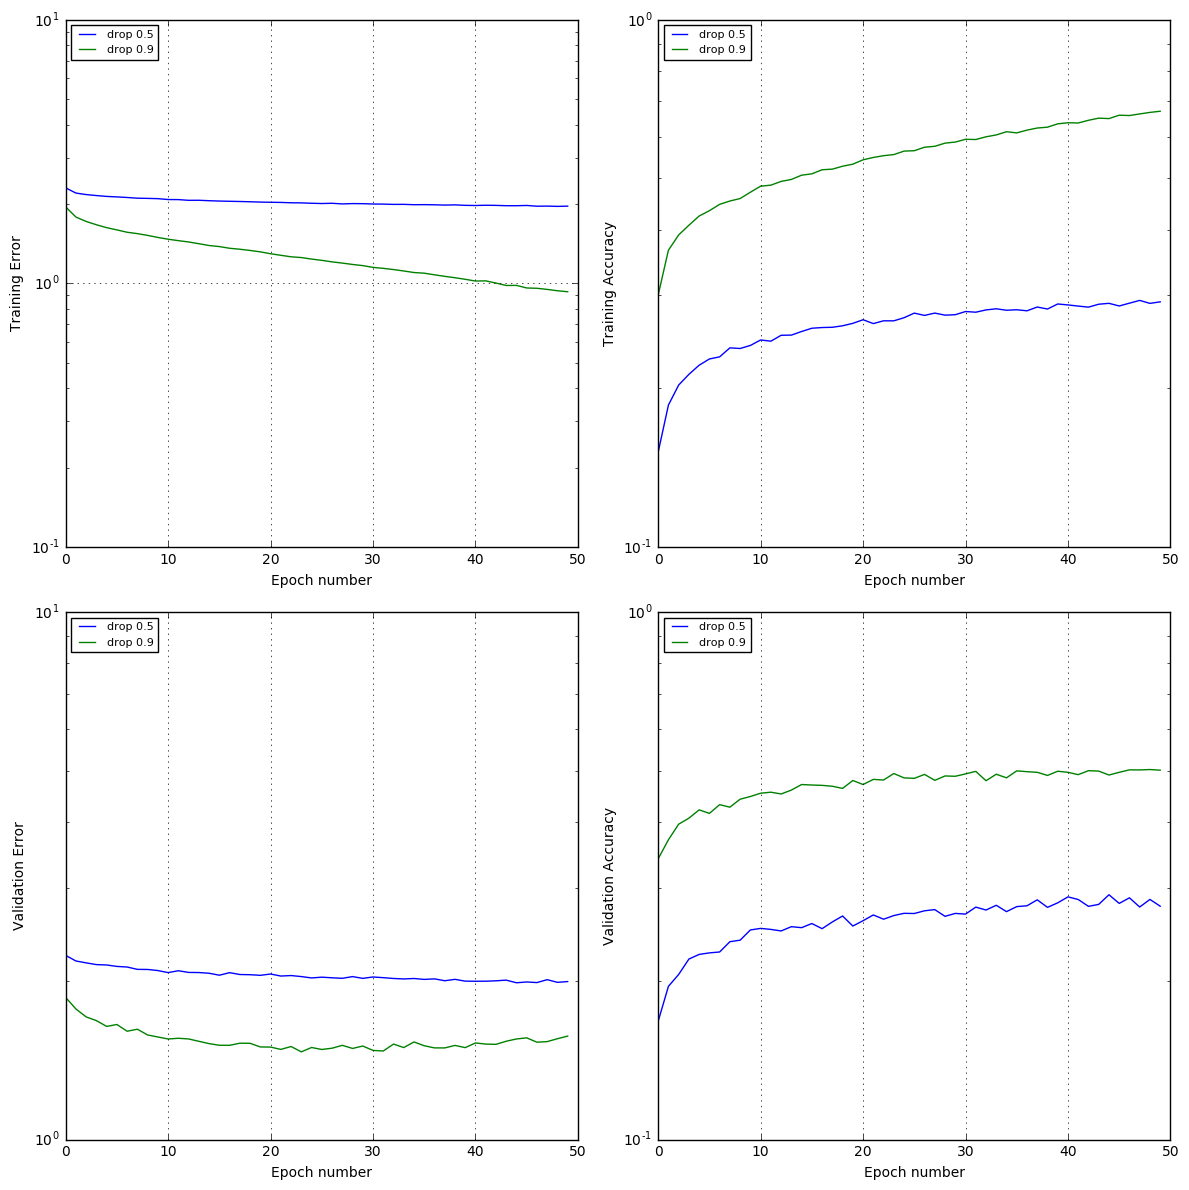

In [237]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(ADAM_00001_2_500_50_relu_drop05_err_t, label='drop 0.5')
ax1.plot(ADAM_00001_2_500_50_relu_drop09_err_t, label='drop 0.9')
ax2.plot(ADAM_00001_2_500_50_relu_drop05_acc_t, label='drop 0.5')
ax2.plot(ADAM_00001_2_500_50_relu_drop09_acc_t, label='drop 0.9')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('ADAM_train_50_dropout.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(ADAM_00001_2_500_50_relu_drop05_err_v, label='drop 0.5')
ax3.plot(ADAM_00001_2_500_50_relu_drop09_err_v, label='drop 0.9')
ax4.plot(ADAM_00001_2_500_50_relu_drop05_acc_v, label='drop 0.5')
ax4.plot(ADAM_00001_2_500_50_relu_drop09_acc_v, label='drop 0.9')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('ADAM_50_dropout.png',dpi=200)

In [135]:
# maybe both

In [136]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, dropout 0.9 + L2 0.001
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_L2drop(0.9,0.001,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_L2drop(0.9,0.001,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_L2drop(0.9,0.001,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets)) + loss_1 + loss_2 + loss_out)
with tf.name_scope('error_val'):
    error_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
ADAM_00001_2_500_50_relu_L2drop09_acc_v = []
ADAM_00001_2_500_50_relu_L2drop09_acc_t = []
ADAM_00001_2_500_50_relu_L2drop09_err_v = []
ADAM_00001_2_500_50_relu_L2drop09_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error_val, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        ADAM_00001_2_500_50_relu_L2drop09_err_t.append(running_error)
        ADAM_00001_2_500_50_relu_L2drop09_acc_t.append(running_accuracy)
        ADAM_00001_2_500_50_relu_L2drop09_err_v.append(valid_error)
        ADAM_00001_2_500_50_relu_L2drop09_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=3.70 acc(train)=0.30
                 err(valid)=1.85 acc(valid)=0.33
End of epoch 02: err(train)=3.07 acc(train)=0.37
                 err(valid)=1.76 acc(valid)=0.38
End of epoch 03: err(train)=2.76 acc(train)=0.39
                 err(valid)=1.71 acc(valid)=0.39
End of epoch 04: err(train)=2.55 acc(train)=0.41
                 err(valid)=1.66 acc(valid)=0.41
End of epoch 05: err(train)=2.39 acc(train)=0.42
                 err(valid)=1.64 acc(valid)=0.42
End of epoch 06: err(train)=2.28 acc(train)=0.43
                 err(valid)=1.67 acc(valid)=0.41
End of epoch 07: err(train)=2.18 acc(train)=0.44
                 err(valid)=1.60 acc(valid)=0.44
End of epoch 08: err(train)=2.11 acc(train)=0.45
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 09: err(train)=2.04 acc(train)=0.46
                 err(valid)=1.58 acc(valid)=0.45
End of epoch 10: err(train)=1.99 acc(train)=0.46
                 err(valid)=1.54 acc(valid)=0.46
End of epoch 11: err

In [137]:
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.9 + L2 0.001')
print('    final error(train) = {}').format(ADAM_00001_2_500_50_relu_L2drop09_err_t[-1])
print('    final error(valid) = {}').format(ADAM_00001_2_500_50_relu_L2drop09_err_v[-1])
print('    final acc(train)   = {}').format(ADAM_00001_2_500_50_relu_L2drop09_acc_t[-1])
print('    final acc(valid)   = {}').format(ADAM_00001_2_500_50_relu_L2drop09_acc_v[-1])
print('-------------------------------------------------------------')

Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.9 + L2 0.001
    final error(train) = 1.45434620962
    final error(valid) = 1.42296001256
    final acc(train)   = 0.565600002483
    final acc(valid)   = 0.49929999873
-------------------------------------------------------------


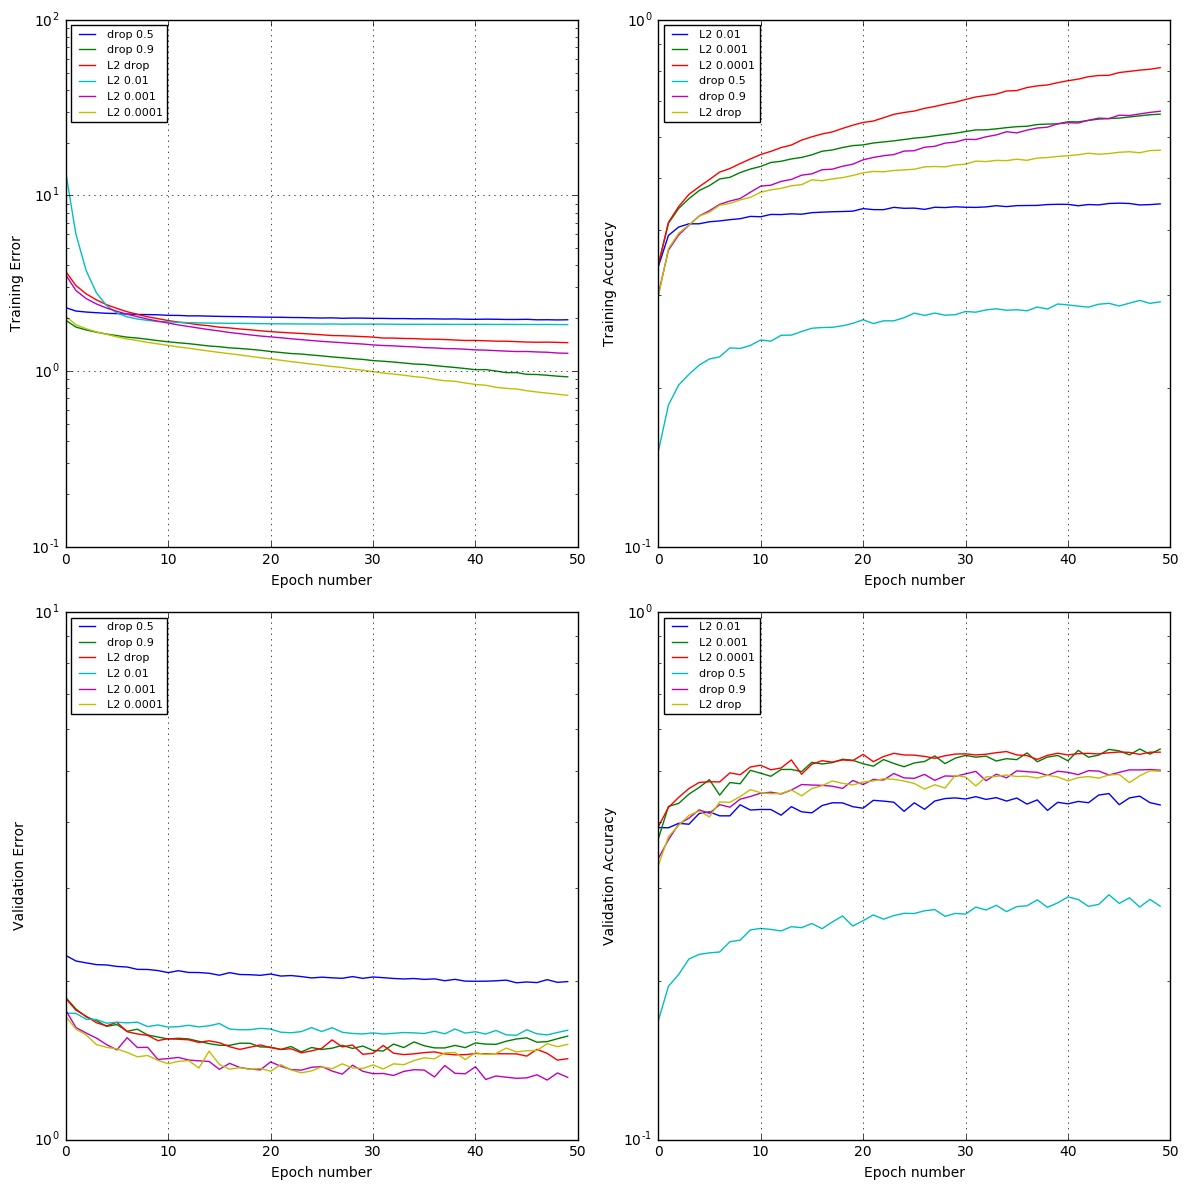

In [238]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(ADAM_00001_2_500_50_relu_drop05_err_t, label='drop 0.5')
ax1.plot(ADAM_00001_2_500_50_relu_drop09_err_t, label='drop 0.9')
ax1.plot(ADAM_00001_2_500_50_relu_L2drop09_err_t, label='L2 drop ')
ax1.plot(ADAM_00001_2_500_50_relu_001L2_err_t, label='L2 0.01')
ax1.plot(ADAM_00001_2_500_50_relu_0001L2_err_t, label='L2 0.001')
ax1.plot(ADAM_00001_2_500_50_relu_00001L2_err_t, label='L2 0.0001')
ax2.plot(ADAM_00001_2_500_50_relu_001L2_acc_t, label='L2 0.01')
ax2.plot(ADAM_00001_2_500_50_relu_0001L2_acc_t, label='L2 0.001')
ax2.plot(ADAM_00001_2_500_50_relu_00001L2_acc_t, label='L2 0.0001')
ax2.plot(ADAM_00001_2_500_50_relu_drop05_acc_t, label='drop 0.5')
ax2.plot(ADAM_00001_2_500_50_relu_drop09_acc_t, label='drop 0.9')
ax2.plot(ADAM_00001_2_500_50_relu_L2drop09_acc_t, label='L2 drop ')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('ADAM_train_50_L2drop.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(ADAM_00001_2_500_50_relu_drop05_err_v, label='drop 0.5')
ax3.plot(ADAM_00001_2_500_50_relu_drop09_err_v, label='drop 0.9')
ax3.plot(ADAM_00001_2_500_50_relu_L2drop09_err_v, label='L2 drop ')
ax3.plot(ADAM_00001_2_500_50_relu_001L2_err_v, label='L2 0.01')
ax3.plot(ADAM_00001_2_500_50_relu_0001L2_err_v, label='L2 0.001')
ax3.plot(ADAM_00001_2_500_50_relu_00001L2_err_v, label='L2 0.0001')
ax4.plot(ADAM_00001_2_500_50_relu_001L2_acc_v, label='L2 0.01')
ax4.plot(ADAM_00001_2_500_50_relu_0001L2_acc_v, label='L2 0.001')
ax4.plot(ADAM_00001_2_500_50_relu_00001L2_acc_v, label='L2 0.0001')
ax4.plot(ADAM_00001_2_500_50_relu_drop05_acc_v, label='drop 0.5')
ax4.plot(ADAM_00001_2_500_50_relu_drop09_acc_v, label='drop 0.9')
ax4.plot(ADAM_00001_2_500_50_relu_L2drop09_acc_v, label='L2 drop ')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('ADAM_50_L2drop.png',dpi=200)

In [239]:
# keep all results in files 

f1 = np.array(GD_05_0_sigm_err_t)
f2 = np.array(GD_05_0_sigm_err_v)
f3 = np.array(GD_05_0_sigm_acc_t)
f4 = np.array(GD_05_0_sigm_acc_v)
f5 = np.array(GD_05_1_sigm_err_t)
f6 = np.array(GD_05_1_sigm_err_v)
f7 = np.array(GD_05_1_sigm_acc_t)
f8 = np.array(GD_05_1_sigm_acc_v)
f9 = np.array(GD_05_2_sigm_err_t)
f10 = np.array(GD_05_2_sigm_err_v)
f11 = np.array(GD_05_2_sigm_acc_t)
f12 = np.array(GD_05_2_sigm_acc_v)
f13 = np.array(GD_05_3_sigm_err_t)
f14 = np.array(GD_05_3_sigm_err_v)
f15 = np.array(GD_05_3_sigm_acc_t)
f16 = np.array(GD_05_3_sigm_acc_v)
f17 = np.array(GD_05_4_sigm_err_t)
f18 = np.array(GD_05_4_sigm_err_v)
f19 = np.array(GD_05_4_sigm_acc_t)
f20 = np.array(GD_05_4_sigm_acc_v)

f21 = np.array(GD_05_1_50_sigm_err_t)
f22 = np.array(GD_05_1_50_sigm_err_v)
f23 = np.array(GD_05_1_50_sigm_acc_t)
f24 = np.array(GD_05_1_50_sigm_acc_v)
f25 = np.array(GD_05_2_50_sigm_err_t)
f26 = np.array(GD_05_2_50_sigm_err_v)
f27 = np.array(GD_05_2_50_sigm_acc_t)
f28 = np.array(GD_05_2_50_sigm_acc_v)
f29 = np.array(GD_05_3_50_sigm_err_t)
f30 = np.array(GD_05_3_50_sigm_err_v)
f31 = np.array(GD_05_3_50_sigm_acc_t)
f32 = np.array(GD_05_3_50_sigm_acc_v)
f33 = np.array(GD_05_4_50_sigm_err_t)
f34 = np.array(GD_05_4_50_sigm_err_v)
f35 = np.array(GD_05_4_50_sigm_acc_t)
f36 = np.array(GD_05_4_50_sigm_acc_v)

f37 = np.array(GD_05_2_50_10_sigm_err_t)
f38 = np.array(GD_05_2_50_10_sigm_err_v)
f39 = np.array(GD_05_2_50_10_sigm_acc_t)
f40 = np.array(GD_05_2_50_10_sigm_acc_v)
f41 = np.array(GD_05_2_100_10_sigm_err_t)
f42 = np.array(GD_05_2_100_10_sigm_err_v)
f43 = np.array(GD_05_2_100_10_sigm_acc_t)
f44 = np.array(GD_05_2_100_10_sigm_acc_v)
f45 = np.array(GD_05_2_sigm_err_t)
f46 = np.array(GD_05_2_sigm_err_v)
f47 = np.array(GD_05_2_sigm_acc_t)
f48 = np.array(GD_05_2_sigm_acc_v)
f49 = np.array(GD_05_2_300_10_sigm_err_t)
f50 = np.array(GD_05_2_300_10_sigm_err_v)
f51 = np.array(GD_05_2_300_10_sigm_acc_t)
f52 = np.array(GD_05_2_300_10_sigm_acc_v)
f53 = np.array(GD_05_2_400_10_sigm_err_t)
f54 = np.array(GD_05_2_400_10_sigm_err_v)
f55 = np.array(GD_05_2_400_10_sigm_acc_t)
f56 = np.array(GD_05_2_400_10_sigm_acc_v)
f57 = np.array(GD_05_2_500_10_sigm_err_t)
f58 = np.array(GD_05_2_500_10_sigm_err_v)
f59 = np.array(GD_05_2_500_10_sigm_acc_t)
f60 = np.array(GD_05_2_500_10_sigm_acc_v)
f61 = np.array(GD_05_2_50_50_sigm_err_t)
f62 = np.array(GD_05_2_50_50_sigm_err_v)
f63 = np.array(GD_05_2_50_50_sigm_acc_t)
f64 = np.array(GD_05_2_50_50_sigm_acc_v)

f65 = np.array(GD_05_2_100_50_sigm_err_t)
f66 = np.array(GD_05_2_100_50_sigm_err_v)
f67 = np.array(GD_05_2_100_50_sigm_acc_t)
f68 = np.array(GD_05_2_100_50_sigm_acc_v)
f69 = np.array(GD_05_2_50_sigm_err_t)
f70 = np.array(GD_05_2_50_sigm_err_v)
f71 = np.array(GD_05_2_50_sigm_acc_t)
f72 = np.array(GD_05_2_50_sigm_acc_v)
f73 = np.array(GD_05_2_300_50_sigm_err_t)
f74 = np.array(GD_05_2_300_50_sigm_err_v)
f75 = np.array(GD_05_2_300_50_sigm_acc_t)
f76 = np.array(GD_05_2_300_50_sigm_acc_v)
f77 = np.array(GD_05_2_400_50_sigm_err_t)
f78 = np.array(GD_05_2_400_50_sigm_err_v)
f79 = np.array(GD_05_2_400_50_sigm_acc_t)
f80 = np.array(GD_05_2_400_50_sigm_acc_v)
f81 = np.array(GD_05_2_500_50_sigm_err_t)
f82 = np.array(GD_05_2_500_50_sigm_err_v)
f83 = np.array(GD_05_2_500_50_sigm_acc_t)
f84 = np.array(GD_05_2_500_50_sigm_acc_v)
f85 = np.array(GD_05_2_500_50_sigm_err_t)
f86 = np.array(GD_05_2_500_50_sigm_err_v)
f87 = np.array(GD_05_2_500_50_sigm_acc_t)
f88 = np.array(GD_05_2_500_50_sigm_acc_v)

f89 = np.array(GD_01_2_500_50_sigm_err_t)
f90 = np.array(GD_01_2_500_50_sigm_err_v)
f91 = np.array(GD_01_2_500_50_sigm_acc_t)
f92 = np.array(GD_01_2_500_50_sigm_acc_v)

f93 = np.array(MOM_01_2_500_50_sigm_err_t)
f94 = np.array(MOM_01_2_500_50_sigm_err_v)
f95 = np.array(MOM_01_2_500_50_sigm_acc_t)
f96 = np.array(MOM_01_2_500_50_sigm_acc_v)

f97 = np.array(ADA_01_2_500_50_sigm_err_t)
f98 = np.array(ADA_01_2_500_50_sigm_err_v)
f99 = np.array(ADA_01_2_500_50_sigm_acc_t)
f100 = np.array(ADA_01_2_500_50_sigm_acc_v)
f101 = np.array(ADA_001_2_500_50_sigm_err_t)
f102 = np.array(ADA_001_2_500_50_sigm_err_v)
f103 = np.array(ADA_001_2_500_50_sigm_acc_t)
f104 = np.array(ADA_001_2_500_50_sigm_acc_v)

f105 = np.array(ADAM_001_2_500_50_sigm_err_t)
f106 = np.array(ADAM_001_2_500_50_sigm_err_v)
f107 = np.array(ADAM_001_2_500_50_sigm_acc_t)
f108 = np.array(ADAM_001_2_500_50_sigm_acc_v)
f109 = np.array(ADAM_0001_2_500_50_sigm_err_t)
f110 = np.array(ADAM_0001_2_500_50_sigm_err_v)
f111 = np.array(ADAM_0001_2_500_50_sigm_acc_t)
f112 = np.array(ADAM_0001_2_500_50_sigm_acc_v)
f113 = np.array(ADAM_00001_2_500_50_sigm_err_t)
f114 = np.array(ADAM_00001_2_500_50_sigm_err_v)
f115 = np.array(ADAM_00001_2_500_50_sigm_acc_t)
f116 = np.array(ADAM_00001_2_500_50_sigm_acc_v)

f117 = np.array(ADAM_00001_2_500_50_tanh_err_t)
f118 = np.array(ADAM_00001_2_500_50_tanh_err_v)
f119 = np.array(ADAM_00001_2_500_50_tanh_acc_t)
f120 = np.array(ADAM_00001_2_500_50_tanh_acc_v)               
f121 = np.array(ADAM_00001_2_500_50_relu_err_t)
f122 = np.array(ADAM_00001_2_500_50_relu_err_v)
f123 = np.array(ADAM_00001_2_500_50_relu_acc_t)
f124 = np.array(ADAM_00001_2_500_50_relu_acc_v) 
  
f129 = np.array(ADAM_00001_2_500_50_relu_001L2_err_t)
f130 = np.array(ADAM_00001_2_500_50_relu_001L2_err_v)
f131 = np.array(ADAM_00001_2_500_50_relu_001L2_acc_t)
f132 = np.array(ADAM_00001_2_500_50_relu_001L2_acc_v) 
f133 = np.array(ADAM_00001_2_500_50_relu_0001L2_err_t)
f134 = np.array(ADAM_00001_2_500_50_relu_0001L2_err_v)
f135 = np.array(ADAM_00001_2_500_50_relu_0001L2_acc_t)
f136 = np.array(ADAM_00001_2_500_50_relu_0001L2_acc_v) 
f137 = np.array(ADAM_00001_2_500_50_relu_00001L2_err_t)
f138 = np.array(ADAM_00001_2_500_50_relu_00001L2_err_v)
f139 = np.array(ADAM_00001_2_500_50_relu_00001L2_acc_t)
f140 = np.array(ADAM_00001_2_500_50_relu_00001L2_acc_v)

f141 = np.array(ADAM_00001_2_500_50_relu_drop05_err_t)
f142 = np.array(ADAM_00001_2_500_50_relu_drop05_err_v)
f143 = np.array(ADAM_00001_2_500_50_relu_drop05_acc_t)
f144 = np.array(ADAM_00001_2_500_50_relu_drop05_acc_v)
f145 = np.array(ADAM_00001_2_500_50_relu_drop09_err_t)
f146 = np.array(ADAM_00001_2_500_50_relu_drop09_err_v)
f147 = np.array(ADAM_00001_2_500_50_relu_drop09_acc_t)
f148 = np.array(ADAM_00001_2_500_50_relu_drop09_acc_v)

f149 = np.array(ADAM_00001_2_500_50_relu_L2drop09_err_t)
f150 = np.array(ADAM_00001_2_500_50_relu_L2drop09_err_v)
f151 = np.array(ADAM_00001_2_500_50_relu_L2drop09_acc_t)
f152 = np.array(ADAM_00001_2_500_50_relu_L2drop09_acc_v)

In [240]:
np.savetxt('f1', f1, delimiter=',')
np.savetxt('f2', f2, delimiter=',')
np.savetxt('f3', f3, delimiter=',')
np.savetxt('f4', f4, delimiter=',')
np.savetxt('f5', f5, delimiter=',')
np.savetxt('f6', f6, delimiter=',')
np.savetxt('f7', f7, delimiter=',')
np.savetxt('f8', f8, delimiter=',')
np.savetxt('f9', f9, delimiter=',')
np.savetxt('f10', f10, delimiter=',')
np.savetxt('f11', f11, delimiter=',')
np.savetxt('f12', f12, delimiter=',')
np.savetxt('f13', f13, delimiter=',')
np.savetxt('f14', f14, delimiter=',')
np.savetxt('f15', f15, delimiter=',')
np.savetxt('f16', f16, delimiter=',')
np.savetxt('f17', f17, delimiter=',')
np.savetxt('f18', f18, delimiter=',')
np.savetxt('f19', f19, delimiter=',')
np.savetxt('f20', f20, delimiter=',')
np.savetxt('f21', f21, delimiter=',')
np.savetxt('f22', f22, delimiter=',')
np.savetxt('f23', f23, delimiter=',')
np.savetxt('f24', f24, delimiter=',')
np.savetxt('f25', f25, delimiter=',')
np.savetxt('f26', f26, delimiter=',')
np.savetxt('f27', f27, delimiter=',')
np.savetxt('f28', f28, delimiter=',')
np.savetxt('f29', f29, delimiter=',')
np.savetxt('f30', f30, delimiter=',')
np.savetxt('f31', f31, delimiter=',')
np.savetxt('f32', f32, delimiter=',')
np.savetxt('f33', f33, delimiter=',')
np.savetxt('f34', f34, delimiter=',')
np.savetxt('f35', f35, delimiter=',')
np.savetxt('f36', f36, delimiter=',')
np.savetxt('f37', f37, delimiter=',')
np.savetxt('f38', f38, delimiter=',')
np.savetxt('f39', f39, delimiter=',')
np.savetxt('f40', f40, delimiter=',')
np.savetxt('f41', f41, delimiter=',')
np.savetxt('f42', f42, delimiter=',')
np.savetxt('f43', f43, delimiter=',')
np.savetxt('f44', f44, delimiter=',')
np.savetxt('f45', f45, delimiter=',')
np.savetxt('f46', f46, delimiter=',')
np.savetxt('f47', f47, delimiter=',')
np.savetxt('f48', f48, delimiter=',')
np.savetxt('f49', f49, delimiter=',')               
np.savetxt('f50', f50, delimiter=',')
np.savetxt('f51', f51, delimiter=',')
np.savetxt('f52', f52, delimiter=',')
np.savetxt('f53', f53, delimiter=',')
np.savetxt('f54', f54, delimiter=',')
np.savetxt('f55', f55, delimiter=',')
np.savetxt('f56', f56, delimiter=',')
np.savetxt('f57', f57, delimiter=',')
np.savetxt('f58', f58, delimiter=',')
np.savetxt('f59', f59, delimiter=',')
np.savetxt('f60', f60, delimiter=',')
np.savetxt('f61', f61, delimiter=',')
np.savetxt('f62', f62, delimiter=',')
np.savetxt('f63', f63, delimiter=',')
np.savetxt('f64', f64, delimiter=',')
np.savetxt('f65', f65, delimiter=',')
np.savetxt('f66', f66, delimiter=',')
np.savetxt('f67', f67, delimiter=',')
np.savetxt('f68', f68, delimiter=',')
np.savetxt('f69', f69, delimiter=',')
np.savetxt('f70', f70, delimiter=',')
np.savetxt('f71', f71, delimiter=',')
np.savetxt('f72', f72, delimiter=',')
np.savetxt('f73', f73, delimiter=',')
np.savetxt('f74', f74, delimiter=',')
np.savetxt('f75', f75, delimiter=',')
np.savetxt('f76', f76, delimiter=',')
np.savetxt('f77', f77, delimiter=',')
np.savetxt('f78', f78, delimiter=',')
np.savetxt('f79', f79, delimiter=',')               
np.savetxt('f80', f80, delimiter=',')
np.savetxt('f81', f81, delimiter=',')
np.savetxt('f82', f82, delimiter=',')
np.savetxt('f83', f83, delimiter=',')
np.savetxt('f84', f84, delimiter=',')
np.savetxt('f85', f85, delimiter=',')
np.savetxt('f86', f86, delimiter=',')
np.savetxt('f87', f87, delimiter=',')
np.savetxt('f88', f88, delimiter=',')
np.savetxt('f89', f89, delimiter=',')
np.savetxt('f90', f90, delimiter=',')
np.savetxt('f91', f91, delimiter=',')
np.savetxt('f92', f92, delimiter=',')
np.savetxt('f93', f93, delimiter=',')
np.savetxt('f94', f94, delimiter=',')
np.savetxt('f95', f95, delimiter=',')
np.savetxt('f96', f96, delimiter=',')
np.savetxt('f97', f97, delimiter=',')
np.savetxt('f98', f98, delimiter=',')
np.savetxt('f99', f99, delimiter=',')               
np.savetxt('f100', f100, delimiter=',')
np.savetxt('f101', f101, delimiter=',')
np.savetxt('f102', f102, delimiter=',')
np.savetxt('f103', f103, delimiter=',')
np.savetxt('f104', f104, delimiter=',')
np.savetxt('f105', f105, delimiter=',')
np.savetxt('f106', f106, delimiter=',')
np.savetxt('f107', f107, delimiter=',')
np.savetxt('f108', f108, delimiter=',')
np.savetxt('f109', f109, delimiter=',')               
np.savetxt('f110', f110, delimiter=',')
np.savetxt('f111', f111, delimiter=',')
np.savetxt('f112', f112, delimiter=',')
np.savetxt('f113', f113, delimiter=',')
np.savetxt('f114', f114, delimiter=',')
np.savetxt('f115', f115, delimiter=',')
np.savetxt('f116', f116, delimiter=',')
np.savetxt('f117', f117, delimiter=',')
np.savetxt('f118', f118, delimiter=',')
np.savetxt('f119', f119, delimiter=',')
np.savetxt('f120', f120, delimiter=',')
np.savetxt('f121', f121, delimiter=',')
np.savetxt('f122', f122, delimiter=',')
np.savetxt('f123', f123, delimiter=',')
np.savetxt('f124', f124, delimiter=',')

np.savetxt('f129', f129, delimiter=',')               
np.savetxt('f130', f130, delimiter=',')
np.savetxt('f131', f131, delimiter=',')
np.savetxt('f132', f132, delimiter=',')
np.savetxt('f133', f133, delimiter=',')
np.savetxt('f134', f134, delimiter=',')
np.savetxt('f135', f135, delimiter=',')
np.savetxt('f136', f136, delimiter=',')
np.savetxt('f137', f137, delimiter=',')
np.savetxt('f138', f138, delimiter=',')
np.savetxt('f139', f139, delimiter=',')
np.savetxt('f140', f140, delimiter=',')
np.savetxt('f141', f141, delimiter=',')
np.savetxt('f142', f142, delimiter=',')
np.savetxt('f143', f143, delimiter=',')
np.savetxt('f144', f144, delimiter=',')
np.savetxt('f145', f145, delimiter=',')
np.savetxt('f146', f146, delimiter=',')
np.savetxt('f147', f147, delimiter=',')
np.savetxt('f148', f148, delimiter=',')
np.savetxt('f149', f149, delimiter=',')
np.savetxt('f150', f150, delimiter=',')
np.savetxt('f151', f151, delimiter=',')
np.savetxt('f152', f152, delimiter=',')

## repeating process for CIFAR-100

### CIFAR-100

In [141]:
train_data = CIFAR100DataProvider('train', batch_size=50)
valid_data = CIFAR100DataProvider('valid', batch_size=50)

In [142]:
# firstly, how many layers

In [143]:
# gradient descent 0.5, 1 hidden layer, sigmoid, 50 epochs
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_1, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
C100_GD_05_1_50_sigm_acc_v = []
C100_GD_05_1_50_sigm_acc_t = []
C100_GD_05_1_50_sigm_err_v = []
C100_GD_05_1_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        C100_GD_05_1_50_sigm_err_t.append(running_error)
        C100_GD_05_1_50_sigm_acc_t.append(running_accuracy)
        C100_GD_05_1_50_sigm_err_v.append(valid_error)
        C100_GD_05_1_50_sigm_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=4.11 acc(train)=0.08
                 err(valid)=3.84 acc(valid)=0.11
End of epoch 02: err(train)=3.74 acc(train)=0.13
                 err(valid)=3.67 acc(valid)=0.14
End of epoch 03: err(train)=3.61 acc(train)=0.16
                 err(valid)=3.61 acc(valid)=0.16
End of epoch 04: err(train)=3.50 acc(train)=0.18
                 err(valid)=3.51 acc(valid)=0.18
End of epoch 05: err(train)=3.42 acc(train)=0.19
                 err(valid)=3.49 acc(valid)=0.17
End of epoch 06: err(train)=3.36 acc(train)=0.20
                 err(valid)=3.43 acc(valid)=0.19
End of epoch 07: err(train)=3.31 acc(train)=0.21
                 err(valid)=3.45 acc(valid)=0.19
End of epoch 08: err(train)=3.25 acc(train)=0.22
                 err(valid)=3.38 acc(valid)=0.20
End of epoch 09: err(train)=3.21 acc(train)=0.23
                 err(valid)=3.43 acc(valid)=0.19
End of epoch 10: err(train)=3.17 acc(train)=0.23
                 err(valid)=3.40 acc(valid)=0.20
End of epoch 11: err

In [144]:
# gradient descent 0.5, 2 hidden layers, sigmoid, 50 epochs
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_05_2_50_sigm_acc_v = []
CF_100_GD_05_2_50_sigm_acc_t = []
CF_100_GD_05_2_50_sigm_err_v = []
CF_100_GD_05_2_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_05_2_50_sigm_err_t.append(running_error)
        CF_100_GD_05_2_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_05_2_50_sigm_err_v.append(valid_error)
        CF_100_GD_05_2_50_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=4.28 acc(train)=0.05
                 err(valid)=4.03 acc(valid)=0.08
End of epoch 02: err(train)=3.89 acc(train)=0.10
                 err(valid)=3.85 acc(valid)=0.11
End of epoch 03: err(train)=3.72 acc(train)=0.13
                 err(valid)=3.78 acc(valid)=0.12
End of epoch 04: err(train)=3.61 acc(train)=0.15
                 err(valid)=3.59 acc(valid)=0.16
End of epoch 05: err(train)=3.52 acc(train)=0.17
                 err(valid)=3.52 acc(valid)=0.17
End of epoch 06: err(train)=3.45 acc(train)=0.18
                 err(valid)=3.45 acc(valid)=0.18
End of epoch 07: err(train)=3.39 acc(train)=0.19
                 err(valid)=3.46 acc(valid)=0.18
End of epoch 08: err(train)=3.32 acc(train)=0.20
                 err(valid)=3.41 acc(valid)=0.19
End of epoch 09: err(train)=3.28 acc(train)=0.21
                 err(valid)=3.40 acc(valid)=0.19
End of epoch 10: err(train)=3.23 acc(train)=0.22
                 err(valid)=3.32 acc(valid)=0.20
End of epoch 11: err

In [145]:
# gradient descent 0.5, 3 hidden layers, sigmoid, 50 epochs

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('fc-layer-3'):
    hidden_3 = fully_connected_layer_sigmoid(hidden_2, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_3, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_05_3_50_sigm_acc_v = []
CF_100_GD_05_3_50_sigm_acc_t = []
CF_100_GD_05_3_50_sigm_err_v = []
CF_100_GD_05_3_50_sigm_err_t = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_05_3_50_sigm_err_t.append(running_error)
        CF_100_GD_05_3_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_05_3_50_sigm_err_v.append(valid_error)
        CF_100_GD_05_3_50_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=4.59 acc(train)=0.01
                 err(valid)=4.39 acc(valid)=0.02
End of epoch 02: err(train)=4.23 acc(train)=0.05
                 err(valid)=4.17 acc(valid)=0.05
End of epoch 03: err(train)=4.05 acc(train)=0.07
                 err(valid)=3.98 acc(valid)=0.08
End of epoch 04: err(train)=3.92 acc(train)=0.09
                 err(valid)=3.85 acc(valid)=0.10
End of epoch 05: err(train)=3.81 acc(train)=0.11
                 err(valid)=3.82 acc(valid)=0.11
End of epoch 06: err(train)=3.72 acc(train)=0.12
                 err(valid)=3.70 acc(valid)=0.13
End of epoch 07: err(train)=3.65 acc(train)=0.14
                 err(valid)=3.62 acc(valid)=0.15
End of epoch 08: err(train)=3.59 acc(train)=0.15
                 err(valid)=3.70 acc(valid)=0.14
End of epoch 09: err(train)=3.53 acc(train)=0.16
                 err(valid)=3.58 acc(valid)=0.16
End of epoch 10: err(train)=3.49 acc(train)=0.17
                 err(valid)=3.62 acc(valid)=0.14
End of epoch 11: err

In [146]:
# gradient descent 0.5, 4 hidden layers, sigmoid, 50 epochs

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('fc-layer-3'):
    hidden_3 = fully_connected_layer_sigmoid(hidden_2, num_hidden, num_hidden)
with tf.name_scope('fc-layer-4'):
    hidden_4 = fully_connected_layer_sigmoid(hidden_3, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_4, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_05_4_50_sigm_acc_v = []
CF_100_GD_05_4_50_sigm_acc_t = []
CF_100_GD_05_4_50_sigm_err_v = []
CF_100_GD_05_4_50_sigm_err_t = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_05_4_50_sigm_err_t.append(running_error)
        CF_100_GD_05_4_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_05_4_50_sigm_err_v.append(valid_error)
        CF_100_GD_05_4_50_sigm_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=4.62 acc(train)=0.01
                 err(valid)=4.61 acc(valid)=0.01
End of epoch 02: err(train)=4.61 acc(train)=0.01
                 err(valid)=4.61 acc(valid)=0.01
End of epoch 03: err(train)=4.61 acc(train)=0.01
                 err(valid)=4.61 acc(valid)=0.01
End of epoch 04: err(train)=4.61 acc(train)=0.01
                 err(valid)=4.61 acc(valid)=0.01
End of epoch 05: err(train)=4.61 acc(train)=0.01
                 err(valid)=4.61 acc(valid)=0.01
End of epoch 06: err(train)=4.61 acc(train)=0.01
                 err(valid)=4.61 acc(valid)=0.01
End of epoch 07: err(train)=4.61 acc(train)=0.01
                 err(valid)=4.60 acc(valid)=0.01
End of epoch 08: err(train)=4.54 acc(train)=0.01
                 err(valid)=4.40 acc(valid)=0.02
End of epoch 09: err(train)=4.35 acc(train)=0.03
                 err(valid)=4.30 acc(valid)=0.03
End of epoch 10: err(train)=4.22 acc(train)=0.04
                 err(valid)=4.16 acc(valid)=0.05
End of epoch 11: err

In [149]:
# final values
print('-------------------------------------------------------------')
print('Gradiend Descent, 1 hidden layer, sigmoid activation over 50 epochs')
print('    final error(train) = {}').format(C100_GD_05_1_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(C100_GD_05_1_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(C100_GD_05_1_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(C100_GD_05_1_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 hidden layers, sigmoid activation over 50 epochs')
print('    final error(train) = {}').format(CF_100_GD_05_2_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_2_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_2_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_2_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 3 hidden layers, sigmoid activation over 50 epochs')
print('    final error(train) = {}').format(CF_100_GD_05_3_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_3_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_3_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_3_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 4 hidden layers, sigmoid activation over 50 epochs')
print('    final error(train) = {}').format(CF_100_GD_05_4_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_4_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_4_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_4_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Gradiend Descent, 1 hidden layer, sigmoid activation over 50 epochs
    final error(train) = 2.63490014821
    final error(valid) = 3.65510519028
    final acc(train)   = 0.336200000234
    final acc(valid)   = 0.197699999884
-------------------------------------------------------------
Gradiend Descent, 2 hidden layers, sigmoid activation over 50 epochs
    final error(train) = 2.29839273557
    final error(valid) = 3.39786324382
    final acc(train)   = 0.402424999475
    final acc(valid)   = 0.227799999975
-------------------------------------------------------------
Gradiend Descent, 3 hidden layers, sigmoid activation over 50 epochs
    final error(train) = 2.74531644344
    final error(valid) = 3.41453539491
    final acc(train)   = 0.30275000053
    final acc(valid)   = 0.207199999727
-------------------------------------------------------------
Gradiend Descent, 4 hidden layers, sigmoid activation over 50 epochs
    

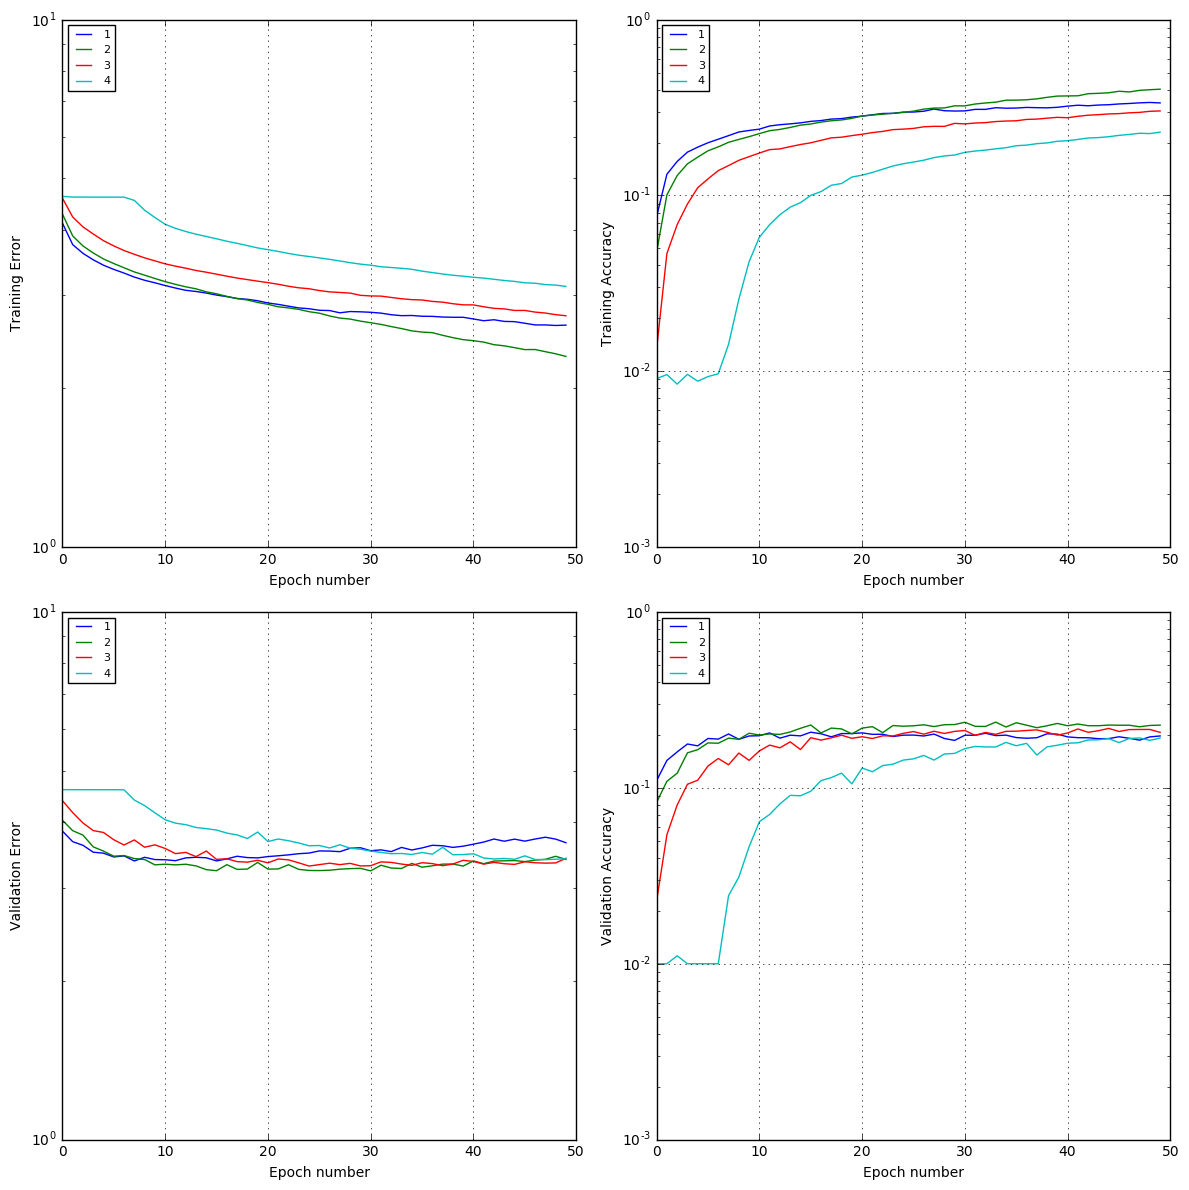

In [241]:
# plots
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(C100_GD_05_1_50_sigm_err_t, label='1')
ax1.plot(CF_100_GD_05_2_50_sigm_err_t, label='2')
ax1.plot(CF_100_GD_05_3_50_sigm_err_t, label='3')
ax1.plot(CF_100_GD_05_4_50_sigm_err_t, label='4')
ax2.plot(C100_GD_05_1_50_sigm_acc_t, label='1')
ax2.plot(CF_100_GD_05_2_50_sigm_acc_t, label='2')
ax2.plot(CF_100_GD_05_3_50_sigm_acc_t, label='3')
ax2.plot(CF_100_GD_05_4_50_sigm_acc_t, label='4')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('CF_100_GD_05_1234train_50_sigm.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(C100_GD_05_1_50_sigm_err_v, label='1')
ax3.plot(CF_100_GD_05_2_50_sigm_err_v, label='2')
ax3.plot(CF_100_GD_05_3_50_sigm_err_v, label='3')
ax3.plot(CF_100_GD_05_4_50_sigm_err_v, label='4')
ax4.plot(C100_GD_05_1_50_sigm_acc_v, label='1')
ax4.plot(CF_100_GD_05_2_50_sigm_acc_v, label='2')
ax4.plot(CF_100_GD_05_3_50_sigm_acc_v, label='3')
ax4.plot(CF_100_GD_05_4_50_sigm_acc_v, label='4')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('CF_100_GD_05_1234_50_sigm.png',dpi=200)

In [ ]:
# 2 hidden layers give better result 
# layer size?

In [152]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 50
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =50

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_05_2_50_50_sigm_acc_v = []
CF_100_GD_05_2_50_50_sigm_acc_t = []
CF_100_GD_05_2_50_50_sigm_err_v = []
CF_100_GD_05_2_50_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_05_2_50_50_sigm_err_t.append(running_error)
        CF_100_GD_05_2_50_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_05_2_50_50_sigm_err_v.append(valid_error)
        CF_100_GD_05_2_50_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.38 acc(train)=0.04
                 err(valid)=4.13 acc(valid)=0.06
End of epoch 02: err(train)=4.07 acc(train)=0.07
                 err(valid)=4.03 acc(valid)=0.08
End of epoch 03: err(train)=3.93 acc(train)=0.09
                 err(valid)=3.88 acc(valid)=0.11
End of epoch 04: err(train)=3.84 acc(train)=0.11
                 err(valid)=3.80 acc(valid)=0.12
End of epoch 05: err(train)=3.77 acc(train)=0.12
                 err(valid)=3.76 acc(valid)=0.13
End of epoch 06: err(train)=3.72 acc(train)=0.13
                 err(valid)=3.75 acc(valid)=0.13
End of epoch 07: err(train)=3.67 acc(train)=0.14
                 err(valid)=3.69 acc(valid)=0.13
End of epoch 08: err(train)=3.63 acc(train)=0.15
                 err(valid)=3.66 acc(valid)=0.15
End of epoch 09: err(train)=3.60 acc(train)=0.15
                 err(valid)=3.65 acc(valid)=0.15
End of epoch 10: err(train)=3.57 acc(train)=0.16
                 err(valid)=3.59 acc(valid)=0.16
End of epoch 11: err

In [158]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 100
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =100

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_05_2_100_50_sigm_acc_v = []
CF_100_GD_05_2_100_50_sigm_acc_t = []
CF_100_GD_05_2_100_50_sigm_err_v = []
CF_100_GD_05_2_100_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_05_2_100_50_sigm_err_t.append(running_error)
        CF_100_GD_05_2_100_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_05_2_100_50_sigm_err_v.append(valid_error)
        CF_100_GD_05_2_100_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.33 acc(train)=0.04
                 err(valid)=4.07 acc(valid)=0.07
End of epoch 02: err(train)=3.97 acc(train)=0.09
                 err(valid)=3.87 acc(valid)=0.11
End of epoch 03: err(train)=3.81 acc(train)=0.12
                 err(valid)=3.81 acc(valid)=0.11
End of epoch 04: err(train)=3.71 acc(train)=0.13
                 err(valid)=3.68 acc(valid)=0.14
End of epoch 05: err(train)=3.63 acc(train)=0.15
                 err(valid)=3.64 acc(valid)=0.14
End of epoch 06: err(train)=3.57 acc(train)=0.16
                 err(valid)=3.58 acc(valid)=0.16
End of epoch 07: err(train)=3.51 acc(train)=0.17
                 err(valid)=3.54 acc(valid)=0.17
End of epoch 08: err(train)=3.46 acc(train)=0.18
                 err(valid)=3.51 acc(valid)=0.17
End of epoch 09: err(train)=3.42 acc(train)=0.19
                 err(valid)=3.47 acc(valid)=0.18
End of epoch 10: err(train)=3.37 acc(train)=0.19
                 err(valid)=3.46 acc(valid)=0.18
End of epoch 11: err

In [153]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 300
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =300

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_05_2_300_50_sigm_acc_v = []
CF_100_GD_05_2_300_50_sigm_acc_t = []
CF_100_GD_05_2_300_50_sigm_err_v = []
CF_100_GD_05_2_300_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_05_2_300_50_sigm_err_t.append(running_error)
        CF_100_GD_05_2_300_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_05_2_300_50_sigm_err_v.append(valid_error)
        CF_100_GD_05_2_300_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.27 acc(train)=0.05
                 err(valid)=4.07 acc(valid)=0.07
End of epoch 02: err(train)=3.87 acc(train)=0.11
                 err(valid)=3.78 acc(valid)=0.12
End of epoch 03: err(train)=3.69 acc(train)=0.13
                 err(valid)=3.68 acc(valid)=0.14
End of epoch 04: err(train)=3.58 acc(train)=0.15
                 err(valid)=3.58 acc(valid)=0.16
End of epoch 05: err(train)=3.48 acc(train)=0.17
                 err(valid)=3.47 acc(valid)=0.18
End of epoch 06: err(train)=3.40 acc(train)=0.19
                 err(valid)=3.55 acc(valid)=0.16
End of epoch 07: err(train)=3.33 acc(train)=0.20
                 err(valid)=3.43 acc(valid)=0.19
End of epoch 08: err(train)=3.27 acc(train)=0.21
                 err(valid)=3.46 acc(valid)=0.18
End of epoch 09: err(train)=3.22 acc(train)=0.22
                 err(valid)=3.36 acc(valid)=0.19
End of epoch 10: err(train)=3.17 acc(train)=0.23
                 err(valid)=3.27 acc(valid)=0.21
End of epoch 11: err

In [154]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 400
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =400

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_05_2_400_50_sigm_acc_v = []
CF_100_GD_05_2_400_50_sigm_acc_t = []
CF_100_GD_05_2_400_50_sigm_err_v = []
CF_100_GD_05_2_400_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_05_2_400_50_sigm_err_t.append(running_error)
        CF_100_GD_05_2_400_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_05_2_400_50_sigm_err_v.append(valid_error)
        CF_100_GD_05_2_400_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.29 acc(train)=0.05
                 err(valid)=4.01 acc(valid)=0.08
End of epoch 02: err(train)=3.87 acc(train)=0.10
                 err(valid)=3.74 acc(valid)=0.12
End of epoch 03: err(train)=3.69 acc(train)=0.14
                 err(valid)=3.67 acc(valid)=0.14
End of epoch 04: err(train)=3.56 acc(train)=0.16
                 err(valid)=3.54 acc(valid)=0.16
End of epoch 05: err(train)=3.47 acc(train)=0.17
                 err(valid)=3.44 acc(valid)=0.18
End of epoch 06: err(train)=3.39 acc(train)=0.19
                 err(valid)=3.42 acc(valid)=0.18
End of epoch 07: err(train)=3.32 acc(train)=0.20
                 err(valid)=3.35 acc(valid)=0.20
End of epoch 08: err(train)=3.26 acc(train)=0.21
                 err(valid)=3.30 acc(valid)=0.21
End of epoch 09: err(train)=3.20 acc(train)=0.22
                 err(valid)=3.30 acc(valid)=0.21
End of epoch 10: err(train)=3.14 acc(train)=0.23
                 err(valid)=3.27 acc(valid)=0.22
End of epoch 11: err

In [155]:
# gradient descent 0.5, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_05_2_500_50_sigm_acc_v = []
CF_100_GD_05_2_500_50_sigm_acc_t = []
CF_100_GD_05_2_500_50_sigm_err_v = []
CF_100_GD_05_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_05_2_500_50_sigm_err_t.append(running_error)
        CF_100_GD_05_2_500_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_05_2_500_50_sigm_err_v.append(valid_error)
        CF_100_GD_05_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.38 acc(train)=0.04
                 err(valid)=4.08 acc(valid)=0.08
End of epoch 02: err(train)=3.92 acc(train)=0.10
                 err(valid)=3.81 acc(valid)=0.12
End of epoch 03: err(train)=3.72 acc(train)=0.13
                 err(valid)=3.64 acc(valid)=0.14
End of epoch 04: err(train)=3.58 acc(train)=0.15
                 err(valid)=3.57 acc(valid)=0.16
End of epoch 05: err(train)=3.49 acc(train)=0.17
                 err(valid)=3.47 acc(valid)=0.18
End of epoch 06: err(train)=3.40 acc(train)=0.19
                 err(valid)=3.43 acc(valid)=0.18
End of epoch 07: err(train)=3.33 acc(train)=0.20
                 err(valid)=3.37 acc(valid)=0.20
End of epoch 08: err(train)=3.26 acc(train)=0.21
                 err(valid)=3.40 acc(valid)=0.19
End of epoch 09: err(train)=3.20 acc(train)=0.22
                 err(valid)=3.30 acc(valid)=0.21
End of epoch 10: err(train)=3.15 acc(train)=0.23
                 err(valid)=3.30 acc(valid)=0.21
End of epoch 11: err

In [159]:
# final values
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 50')
print('    final error(train) = {}').format(CF_100_GD_05_2_50_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_2_50_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_2_50_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_2_50_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 100')
print('    final error(train) = {}').format(CF_100_GD_05_2_100_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_2_100_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_2_100_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_2_100_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 200')
print('    final error(train) = {}').format(CF_100_GD_05_2_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_2_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_2_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_2_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 300')
print('    final error(train) = {}').format(CF_100_GD_05_2_300_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_2_300_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_2_300_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_2_300_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 400')
print('    final error(train) = {}').format(CF_100_GD_05_2_400_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_2_400_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_2_400_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_2_400_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 500')
print('    final error(train) = {}').format(CF_100_GD_05_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 50
    final error(train) = 3.14215570122
    final error(valid) = 3.4884852159
    final acc(train)   = 0.233174999598
    final acc(valid)   = 0.179400000237
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 100
    final error(train) = 2.84134827346
    final error(valid) = 3.39587727666
    final acc(train)   = 0.290800000811
    final acc(valid)   = 0.204200000018
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, size 200
    final error(train) = 2.29839273557
    final error(valid) = 3.39786324382
    final acc(train)   = 0.402424999475
    final acc(valid)   = 0.227799999975
-------------------------------------------------------------
Gradiend Descent, 2 layers, sigmoid activation over 10 epochs, s

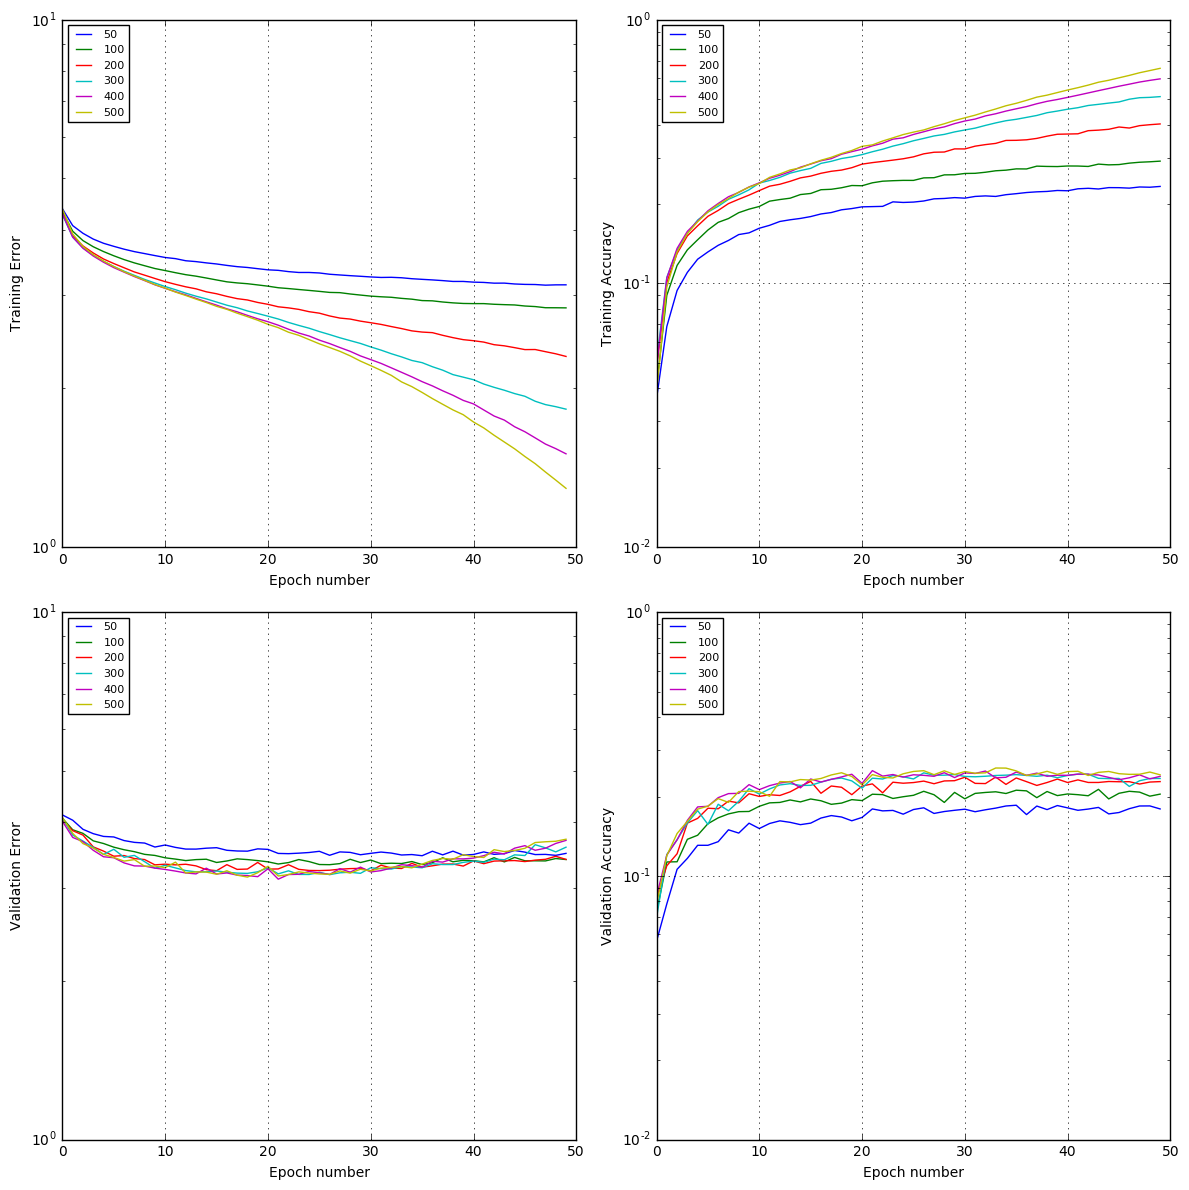

In [242]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(CF_100_GD_05_2_50_50_sigm_err_t, label='50')
ax1.plot(CF_100_GD_05_2_100_50_sigm_err_t, label='100')
ax1.plot(CF_100_GD_05_2_50_sigm_err_t, label='200')
ax1.plot(CF_100_GD_05_2_300_50_sigm_err_t, label='300')
ax1.plot(CF_100_GD_05_2_400_50_sigm_err_t, label='400')
ax1.plot(CF_100_GD_05_2_500_50_sigm_err_t, label='500')
ax2.plot(CF_100_GD_05_2_50_50_sigm_acc_t, label='50')
ax2.plot(CF_100_GD_05_2_100_50_sigm_acc_t, label='100')
ax2.plot(CF_100_GD_05_2_50_sigm_acc_t, label='200')
ax2.plot(CF_100_GD_05_2_300_50_sigm_acc_t, label='300')
ax2.plot(CF_100_GD_05_2_400_50_sigm_acc_t, label='400')
ax2.plot(CF_100_GD_05_2_500_50_sigm_acc_t, label='500')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('CF_100_GD_05_sizes_train_50_sigm.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(CF_100_GD_05_2_50_50_sigm_err_v, label='50')
ax3.plot(CF_100_GD_05_2_100_50_sigm_err_v, label='100')
ax3.plot(CF_100_GD_05_2_50_sigm_err_v, label='200')
ax3.plot(CF_100_GD_05_2_300_50_sigm_err_v, label='300')
ax3.plot(CF_100_GD_05_2_400_50_sigm_err_v, label='400')
ax3.plot(CF_100_GD_05_2_500_50_sigm_err_v, label='500')
ax4.plot(CF_100_GD_05_2_50_50_sigm_acc_v, label='50')
ax4.plot(CF_100_GD_05_2_100_50_sigm_acc_v, label='100')
ax4.plot(CF_100_GD_05_2_50_sigm_acc_v, label='200')
ax4.plot(CF_100_GD_05_2_300_50_sigm_acc_v, label='300')
ax4.plot(CF_100_GD_05_2_400_50_sigm_acc_v, label='400')
ax4.plot(CF_100_GD_05_2_500_50_sigm_acc_v, label='500')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('CF_100_GD_05_sizes_50_sigm.png',dpi=200)

In [ ]:
# 300 size for 10 epochs, 500 for 50
# using only 50 epochs now
# another learning rate for gradient descent, momentum, adagrad, adam?
# using 10 epochs on reg

In [161]:
# gradient descent 0.1, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_GD_01_2_500_50_sigm_acc_v = []
CF_100_GD_01_2_500_50_sigm_acc_t = []
CF_100_GD_01_2_500_50_sigm_err_v = []
CF_100_GD_01_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_GD_01_2_500_50_sigm_err_t.append(running_error)
        CF_100_GD_01_2_500_50_sigm_acc_t.append(running_accuracy)
        CF_100_GD_01_2_500_50_sigm_err_v.append(valid_error)
        CF_100_GD_01_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.49 acc(train)=0.03
                 err(valid)=4.24 acc(valid)=0.06
End of epoch 02: err(train)=4.12 acc(train)=0.07
                 err(valid)=4.02 acc(valid)=0.09
End of epoch 03: err(train)=3.96 acc(train)=0.10
                 err(valid)=3.90 acc(valid)=0.10
End of epoch 04: err(train)=3.84 acc(train)=0.11
                 err(valid)=3.80 acc(valid)=0.12
End of epoch 05: err(train)=3.77 acc(train)=0.13
                 err(valid)=3.76 acc(valid)=0.13
End of epoch 06: err(train)=3.71 acc(train)=0.14
                 err(valid)=3.71 acc(valid)=0.14
End of epoch 07: err(train)=3.66 acc(train)=0.15
                 err(valid)=3.64 acc(valid)=0.16
End of epoch 08: err(train)=3.62 acc(train)=0.16
                 err(valid)=3.62 acc(valid)=0.16
End of epoch 09: err(train)=3.58 acc(train)=0.16
                 err(valid)=3.61 acc(valid)=0.16
End of epoch 10: err(train)=3.55 acc(train)=0.17
                 err(valid)=3.55 acc(valid)=0.17
End of epoch 11: err

In [162]:
# momentum 0.01, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.MomentumOptimizer(learning_rate=0.01, momentum = 0.9).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_MOM_01_2_500_50_sigm_acc_v = []
CF_100_MOM_01_2_500_50_sigm_acc_t = []
CF_100_MOM_01_2_500_50_sigm_err_v = []
CF_100_MOM_01_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_MOM_01_2_500_50_sigm_err_t.append(running_error)
        CF_100_MOM_01_2_500_50_sigm_acc_t.append(running_accuracy)
        CF_100_MOM_01_2_500_50_sigm_err_v.append(valid_error)
        CF_100_MOM_01_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.50 acc(train)=0.03
                 err(valid)=4.26 acc(valid)=0.05
End of epoch 02: err(train)=4.13 acc(train)=0.07
                 err(valid)=4.06 acc(valid)=0.08
End of epoch 03: err(train)=3.97 acc(train)=0.10
                 err(valid)=3.91 acc(valid)=0.11
End of epoch 04: err(train)=3.85 acc(train)=0.11
                 err(valid)=3.80 acc(valid)=0.13
End of epoch 05: err(train)=3.77 acc(train)=0.13
                 err(valid)=3.73 acc(valid)=0.13
End of epoch 06: err(train)=3.71 acc(train)=0.14
                 err(valid)=3.69 acc(valid)=0.15
End of epoch 07: err(train)=3.66 acc(train)=0.15
                 err(valid)=3.67 acc(valid)=0.15
End of epoch 08: err(train)=3.62 acc(train)=0.16
                 err(valid)=3.61 acc(valid)=0.16
End of epoch 09: err(train)=3.58 acc(train)=0.16
                 err(valid)=3.58 acc(valid)=0.17
End of epoch 10: err(train)=3.54 acc(train)=0.17
                 err(valid)=3.57 acc(valid)=0.17
End of epoch 11: err

In [163]:
# Adagrad 0.1, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADA_01_2_500_50_sigm_acc_v = []
CF_100_ADA_01_2_500_50_sigm_acc_t = []
CF_100_ADA_01_2_500_50_sigm_err_v = []
CF_100_ADA_01_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADA_01_2_500_50_sigm_err_t.append(running_error)
        CF_100_ADA_01_2_500_50_sigm_acc_t.append(running_accuracy)
        CF_100_ADA_01_2_500_50_sigm_err_v.append(valid_error)
        CF_100_ADA_01_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.32 acc(train)=0.05
                 err(valid)=4.14 acc(valid)=0.06
End of epoch 02: err(train)=3.92 acc(train)=0.10
                 err(valid)=3.83 acc(valid)=0.11
End of epoch 03: err(train)=3.74 acc(train)=0.13
                 err(valid)=3.66 acc(valid)=0.15
End of epoch 04: err(train)=3.63 acc(train)=0.15
                 err(valid)=3.62 acc(valid)=0.15
End of epoch 05: err(train)=3.54 acc(train)=0.17
                 err(valid)=3.51 acc(valid)=0.18
End of epoch 06: err(train)=3.46 acc(train)=0.18
                 err(valid)=3.48 acc(valid)=0.17
End of epoch 07: err(train)=3.40 acc(train)=0.19
                 err(valid)=3.42 acc(valid)=0.19
End of epoch 08: err(train)=3.34 acc(train)=0.20
                 err(valid)=3.39 acc(valid)=0.19
End of epoch 09: err(train)=3.28 acc(train)=0.21
                 err(valid)=3.34 acc(valid)=0.20
End of epoch 10: err(train)=3.23 acc(train)=0.22
                 err(valid)=3.31 acc(valid)=0.20
End of epoch 11: err

In [164]:
# Adagrad 0.01, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADA_001_2_500_50_sigm_acc_v = []
CF_100_ADA_001_2_500_50_sigm_acc_t = []
CF_100_ADA_001_2_500_50_sigm_err_v = []
CF_100_ADA_001_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADA_001_2_500_50_sigm_err_t.append(running_error)
        CF_100_ADA_001_2_500_50_sigm_acc_t.append(running_accuracy)
        CF_100_ADA_001_2_500_50_sigm_err_v.append(valid_error)
        CF_100_ADA_001_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.59 acc(train)=0.02
                 err(valid)=4.54 acc(valid)=0.02
End of epoch 02: err(train)=4.48 acc(train)=0.04
                 err(valid)=4.41 acc(valid)=0.06
End of epoch 03: err(train)=4.33 acc(train)=0.06
                 err(valid)=4.25 acc(valid)=0.06
End of epoch 04: err(train)=4.18 acc(train)=0.07
                 err(valid)=4.14 acc(valid)=0.07
End of epoch 05: err(train)=4.10 acc(train)=0.08
                 err(valid)=4.08 acc(valid)=0.07
End of epoch 06: err(train)=4.04 acc(train)=0.09
                 err(valid)=4.03 acc(valid)=0.10
End of epoch 07: err(train)=4.00 acc(train)=0.10
                 err(valid)=3.99 acc(valid)=0.10
End of epoch 08: err(train)=3.96 acc(train)=0.10
                 err(valid)=3.94 acc(valid)=0.10
End of epoch 09: err(train)=3.92 acc(train)=0.11
                 err(valid)=3.90 acc(valid)=0.12
End of epoch 10: err(train)=3.88 acc(train)=0.12
                 err(valid)=3.87 acc(valid)=0.12
End of epoch 11: err

In [165]:
# Adam 0.001, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_0001_2_500_50_sigm_acc_v = []
CF_100_ADAM_0001_2_500_50_sigm_acc_t = []
CF_100_ADAM_0001_2_500_50_sigm_err_v = []
CF_100_ADAM_0001_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_0001_2_500_50_sigm_err_t.append(running_error)
        CF_100_ADAM_0001_2_500_50_sigm_acc_t.append(running_accuracy)
        CF_100_ADAM_0001_2_500_50_sigm_err_v.append(valid_error)
        CF_100_ADAM_0001_2_500_50_sigm_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.24 acc(train)=0.05
                 err(valid)=4.03 acc(valid)=0.07
End of epoch 02: err(train)=3.88 acc(train)=0.10
                 err(valid)=3.80 acc(valid)=0.12
End of epoch 03: err(train)=3.74 acc(train)=0.13
                 err(valid)=3.73 acc(valid)=0.13
End of epoch 04: err(train)=3.65 acc(train)=0.14
                 err(valid)=3.66 acc(valid)=0.14
End of epoch 05: err(train)=3.58 acc(train)=0.15
                 err(valid)=3.62 acc(valid)=0.15
End of epoch 06: err(train)=3.52 acc(train)=0.17
                 err(valid)=3.58 acc(valid)=0.16
End of epoch 07: err(train)=3.46 acc(train)=0.18
                 err(valid)=3.50 acc(valid)=0.18
End of epoch 08: err(train)=3.40 acc(train)=0.19
                 err(valid)=3.49 acc(valid)=0.17
End of epoch 09: err(train)=3.36 acc(train)=0.19
                 err(valid)=3.43 acc(valid)=0.18
End of epoch 10: err(train)=3.32 acc(train)=0.20
                 err(valid)=3.41 acc(valid)=0.19
End of epoch 11: err

In [166]:
# Adam 0.01, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.01).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_001_2_500_50_sigm_acc_v = []
CF_100_ADAM_001_2_500_50_sigm_acc_t = []
CF_100_ADAM_001_2_500_50_sigm_err_v = []
CF_100_ADAM_001_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_001_2_500_50_sigm_err_t.append(running_error)
        CF_100_ADAM_001_2_500_50_sigm_acc_t.append(running_accuracy)
        CF_100_ADAM_001_2_500_50_sigm_err_v.append(valid_error)
        CF_100_ADAM_001_2_500_50_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=4.75 acc(train)=0.01
                 err(valid)=4.71 acc(valid)=0.01
End of epoch 02: err(train)=4.70 acc(train)=0.01
                 err(valid)=4.71 acc(valid)=0.01
End of epoch 03: err(train)=4.69 acc(train)=0.01
                 err(valid)=4.66 acc(valid)=0.01
End of epoch 04: err(train)=4.69 acc(train)=0.01
                 err(valid)=4.68 acc(valid)=0.01
End of epoch 05: err(train)=4.68 acc(train)=0.01
                 err(valid)=4.66 acc(valid)=0.01
End of epoch 06: err(train)=4.67 acc(train)=0.01
                 err(valid)=4.67 acc(valid)=0.01
End of epoch 07: err(train)=4.67 acc(train)=0.01
                 err(valid)=4.66 acc(valid)=0.01
End of epoch 08: err(train)=4.67 acc(train)=0.01
                 err(valid)=4.65 acc(valid)=0.01
End of epoch 09: err(train)=4.66 acc(train)=0.01
                 err(valid)=4.65 acc(valid)=0.01
End of epoch 10: err(train)=4.66 acc(train)=0.01
                 err(valid)=4.66 acc(valid)=0.01
End of epoch 11: err

In [167]:
# Adam 0.0001, 2 hidden layer, sigmoid, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_sigm_acc_v = []
CF_100_ADAM_00001_2_500_50_sigm_acc_t = []
CF_100_ADAM_00001_2_500_50_sigm_err_v = []
CF_100_ADAM_00001_2_500_50_sigm_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_sigm_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_sigm_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_sigm_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_sigm_acc_v.append(valid_accuracy)



End of epoch 01: err(train)=4.42 acc(train)=0.05
                 err(valid)=4.20 acc(valid)=0.07
End of epoch 02: err(train)=4.09 acc(train)=0.09
                 err(valid)=4.01 acc(valid)=0.10
End of epoch 03: err(train)=3.93 acc(train)=0.11
                 err(valid)=3.88 acc(valid)=0.13
End of epoch 04: err(train)=3.83 acc(train)=0.13
                 err(valid)=3.79 acc(valid)=0.13
End of epoch 05: err(train)=3.75 acc(train)=0.14
                 err(valid)=3.74 acc(valid)=0.14
End of epoch 06: err(train)=3.70 acc(train)=0.15
                 err(valid)=3.70 acc(valid)=0.15
End of epoch 07: err(train)=3.65 acc(train)=0.16
                 err(valid)=3.65 acc(valid)=0.16
End of epoch 08: err(train)=3.61 acc(train)=0.16
                 err(valid)=3.62 acc(valid)=0.16
End of epoch 09: err(train)=3.57 acc(train)=0.17
                 err(valid)=3.60 acc(valid)=0.17
End of epoch 10: err(train)=3.54 acc(train)=0.18
                 err(valid)=3.57 acc(valid)=0.18
End of epoch 11: err

In [168]:
# final values
print('-------------------------------------------------------------')
print('Gradiend Descent 0.5, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_GD_05_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_05_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_05_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_05_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Gradiend Descent 0.1, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_GD_01_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_GD_01_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_GD_01_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_GD_01_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Momentum 0.01, 0.9, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_MOM_01_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_MOM_01_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_MOM_01_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_MOM_01_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adagrad 0.1, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_ADA_01_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADA_01_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADA_01_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADA_01_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adagrad 0.01, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_ADA_001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADA_001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADA_001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADA_001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.01, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_ADAM_001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.001, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_ADAM_0001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_0001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_0001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_0001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Gradiend Descent 0.5, 2 layers, sigmoid activation over 50 epochs, size 500
    final error(train) = 1.29193543188
    final error(valid) = 3.71097172976
    final acc(train)   = 0.654100004919
    final acc(valid)   = 0.241700000092
-------------------------------------------------------------
Gradiend Descent 0.1, 2 layers, sigmoid activation over 50 epochs, size 500
    final error(train) = 2.65314570576
    final error(valid) = 3.084653126
    final acc(train)   = 0.334800000694
    final acc(valid)   = 0.250699999258
-------------------------------------------------------------
Momentum 0.01, 0.9, 2 layers, sigmoid activation over 50 epochs, size 500
    final error(train) = 2.63832782507
    final error(valid) = 3.10475327849
    final acc(train)   = 0.337075000983
    final acc(valid)   = 0.249299999364
-------------------------------------------------------------
Adagrad 0.1, 2 layers, sigmoid activation over 50 epoc

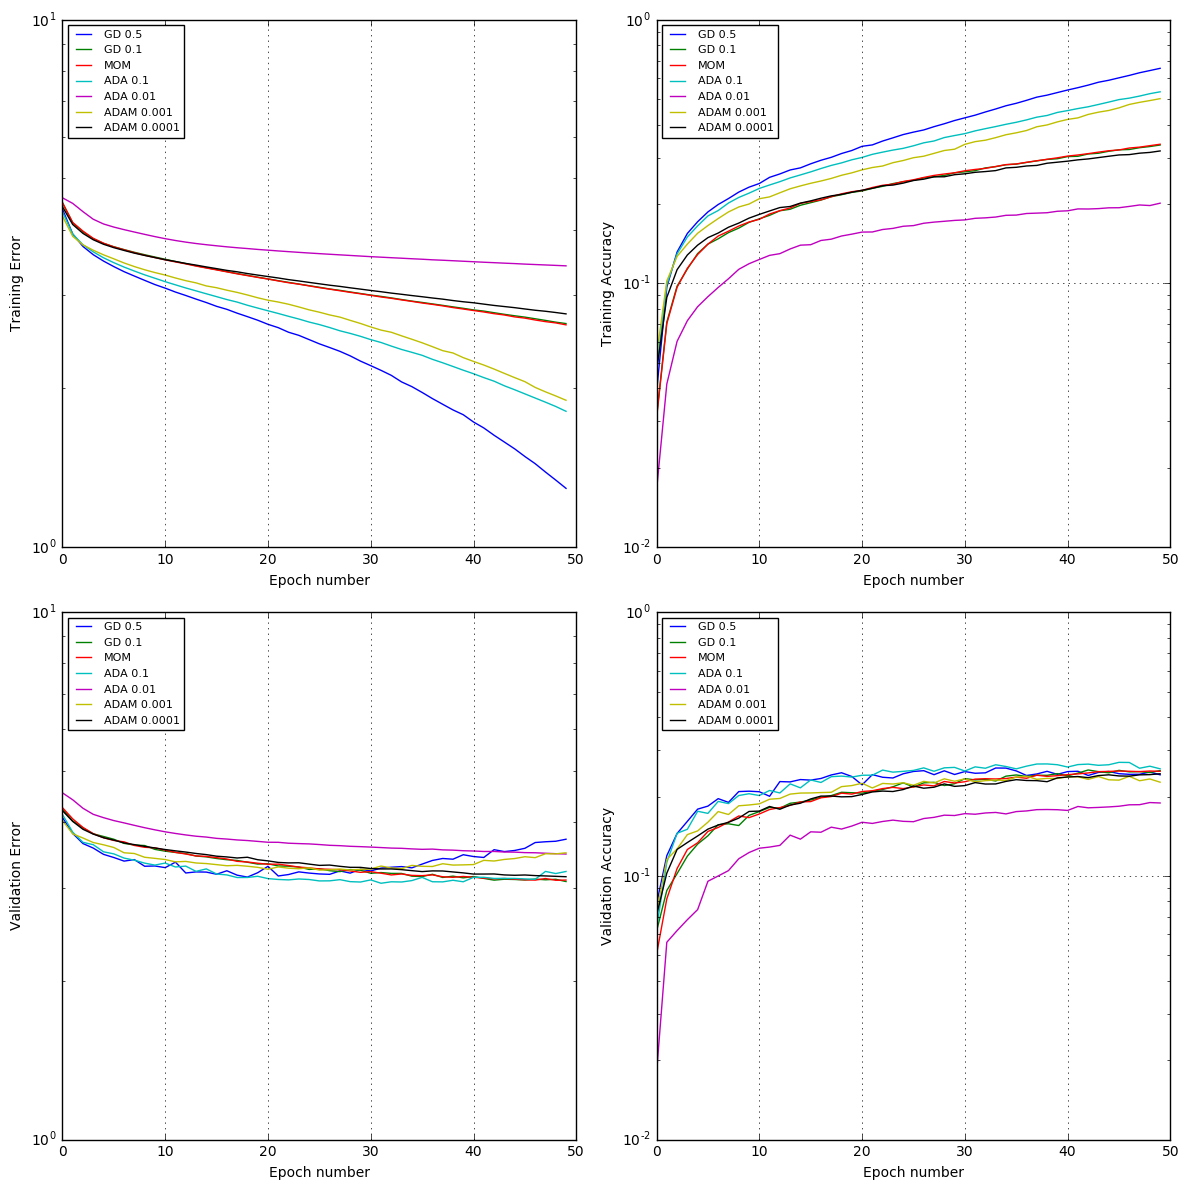

In [243]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(CF_100_GD_05_2_500_50_sigm_err_t, label='GD 0.5')
ax1.plot(CF_100_GD_01_2_500_50_sigm_err_t, label='GD 0.1')
ax1.plot(CF_100_MOM_01_2_500_50_sigm_err_t, label='MOM')
ax1.plot(CF_100_ADA_01_2_500_50_sigm_err_t, label='ADA 0.1')
ax1.plot(CF_100_ADA_001_2_500_50_sigm_err_t, label='ADA 0.01')
#ax1.plot(ADAM_001_2_500_50_sigm_err_t, label='ADAM 0.01')
ax1.plot(CF_100_ADAM_0001_2_500_50_sigm_err_t, label='ADAM 0.001')
ax1.plot(CF_100_ADAM_00001_2_500_50_sigm_err_t, label='ADAM 0.0001')
ax2.plot(CF_100_GD_05_2_500_50_sigm_acc_t, label='GD 0.5')
ax2.plot(CF_100_GD_01_2_500_50_sigm_acc_t, label='GD 0.1')
ax2.plot(CF_100_MOM_01_2_500_50_sigm_acc_t, label='MOM')
ax2.plot(CF_100_ADA_01_2_500_50_sigm_acc_t, label='ADA 0.1')
ax2.plot(CF_100_ADA_001_2_500_50_sigm_acc_t, label='ADA 0.01')
#ax2.plot(ADAM_001_2_500_50_sigm_acc_t, label='ADAM 0.01')
ax2.plot(CF_100_ADAM_0001_2_500_50_sigm_acc_t, label='ADAM 0.001')
ax2.plot(CF_100_ADAM_00001_2_500_50_sigm_acc_t, label='ADAM 0.0001')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('CF_100_optimizers_train_50_sigm.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(CF_100_GD_05_2_500_50_sigm_err_v, label='GD 0.5')
ax3.plot(CF_100_GD_01_2_500_50_sigm_err_v, label='GD 0.1')
ax3.plot(CF_100_MOM_01_2_500_50_sigm_err_v, label='MOM')
ax3.plot(CF_100_ADA_01_2_500_50_sigm_err_v, label='ADA 0.1')
ax3.plot(CF_100_ADA_001_2_500_50_sigm_err_v, label='ADA 0.01')
#ax1.plot(ADAM_001_2_500_50_sigm_err_v, label='ADAM 0.01')
ax3.plot(CF_100_ADAM_0001_2_500_50_sigm_err_v, label='ADAM 0.001')
ax3.plot(CF_100_ADAM_00001_2_500_50_sigm_err_v, label='ADAM 0.0001')
ax4.plot(CF_100_GD_05_2_500_50_sigm_acc_v, label='GD 0.5')
ax4.plot(CF_100_GD_01_2_500_50_sigm_acc_v, label='GD 0.1')
ax4.plot(CF_100_MOM_01_2_500_50_sigm_acc_v, label='MOM')
ax4.plot(CF_100_ADA_01_2_500_50_sigm_acc_v, label='ADA 0.1')
ax4.plot(CF_100_ADA_001_2_500_50_sigm_acc_v, label='ADA 0.01')
#ax2.plot(ADAM_001_2_500_50_sigm_acc_v, label='ADAM 0.01')
ax4.plot(CF_100_ADAM_0001_2_500_50_sigm_acc_v, label='ADAM 0.001')
ax4.plot(CF_100_ADAM_00001_2_500_50_sigm_acc_v, label='ADAM 0.0001')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('CF_100_optimizers_50_sigm.png',dpi=200)

In [170]:
# ada gave good results, adam as well 
# so, change sigmoid to tanh or relu for 

In [171]:
# Adam 0.0001, 2 hidden layer, tanh, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_tanh(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_tanh(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_tanh(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_tanh_acc_v = []
CF_100_ADAM_00001_2_500_50_tanh_acc_t = []
CF_100_ADAM_00001_2_500_50_tanh_err_v = []
CF_100_ADAM_00001_2_500_50_tanh_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_tanh_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_tanh_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_tanh_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_tanh_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=4.12 acc(train)=0.08
                 err(valid)=3.86 acc(valid)=0.12
End of epoch 02: err(train)=3.73 acc(train)=0.15
                 err(valid)=3.67 acc(valid)=0.16
End of epoch 03: err(train)=3.57 acc(train)=0.17
                 err(valid)=3.60 acc(valid)=0.16
End of epoch 04: err(train)=3.47 acc(train)=0.19
                 err(valid)=3.53 acc(valid)=0.18
End of epoch 05: err(train)=3.39 acc(train)=0.20
                 err(valid)=3.50 acc(valid)=0.18
End of epoch 06: err(train)=3.32 acc(train)=0.22
                 err(valid)=3.45 acc(valid)=0.19
End of epoch 07: err(train)=3.25 acc(train)=0.23
                 err(valid)=3.43 acc(valid)=0.20
End of epoch 08: err(train)=3.20 acc(train)=0.24
                 err(valid)=3.41 acc(valid)=0.20
End of epoch 09: err(train)=3.14 acc(train)=0.25
                 err(valid)=3.35 acc(valid)=0.21
End of epoch 10: err(train)=3.09 acc(train)=0.26
                 err(valid)=3.34 acc(valid)=0.21
End of epoch 11: err

In [172]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_relu_acc_v = []
CF_100_ADAM_00001_2_500_50_relu_acc_t = []
CF_100_ADAM_00001_2_500_50_relu_err_v = []
CF_100_ADAM_00001_2_500_50_relu_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_relu_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_relu_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_relu_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_relu_acc_v.append(valid_accuracy)


End of epoch 01: err(train)=4.19 acc(train)=0.07
                 err(valid)=3.93 acc(valid)=0.11
End of epoch 02: err(train)=3.81 acc(train)=0.13
                 err(valid)=3.74 acc(valid)=0.13
End of epoch 03: err(train)=3.64 acc(train)=0.16
                 err(valid)=3.65 acc(valid)=0.15
End of epoch 04: err(train)=3.53 acc(train)=0.18
                 err(valid)=3.57 acc(valid)=0.17
End of epoch 05: err(train)=3.43 acc(train)=0.19
                 err(valid)=3.52 acc(valid)=0.18
End of epoch 06: err(train)=3.35 acc(train)=0.21
                 err(valid)=3.47 acc(valid)=0.19
End of epoch 07: err(train)=3.28 acc(train)=0.22
                 err(valid)=3.43 acc(valid)=0.19
End of epoch 08: err(train)=3.21 acc(train)=0.23
                 err(valid)=3.39 acc(valid)=0.20
End of epoch 09: err(train)=3.15 acc(train)=0.25
                 err(valid)=3.40 acc(valid)=0.20
End of epoch 10: err(train)=3.09 acc(train)=0.26
                 err(valid)=3.36 acc(valid)=0.21
End of epoch 11: err

In [173]:
print('-------------------------------------------------------------')
print('Adam 0.001, 2 layers, sigmoid activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_sigm_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_sigm_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_sigm_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_sigm_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.001, 2 layers, tanh activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_tanh_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_tanh_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_tanh_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_tanh_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.001, 2 layers, relu activation over 50 epochs, size 500')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_relu_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_relu_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Adam 0.001, 2 layers, sigmoid activation over 50 epochs, size 500
    final error(train) = 2.76775797218
    final error(valid) = 3.15040509224
    final acc(train)   = 0.317875000518
    final acc(valid)   = 0.243899999186
-------------------------------------------------------------
Adam 0.001, 2 layers, tanh activation over 50 epochs, size 500
    final error(train) = 1.60264566123
    final error(valid) = 3.33793615222
    final acc(train)   = 0.60977500353
    final acc(valid)   = 0.243800000027
-------------------------------------------------------------
Adam 0.001, 2 layers, relu activation over 50 epochs, size 500
    final error(train) = 1.42502502158
    final error(valid) = 3.61400792718
    final acc(train)   = 0.64215000499
    final acc(valid)   = 0.248500000499
-------------------------------------------------------------


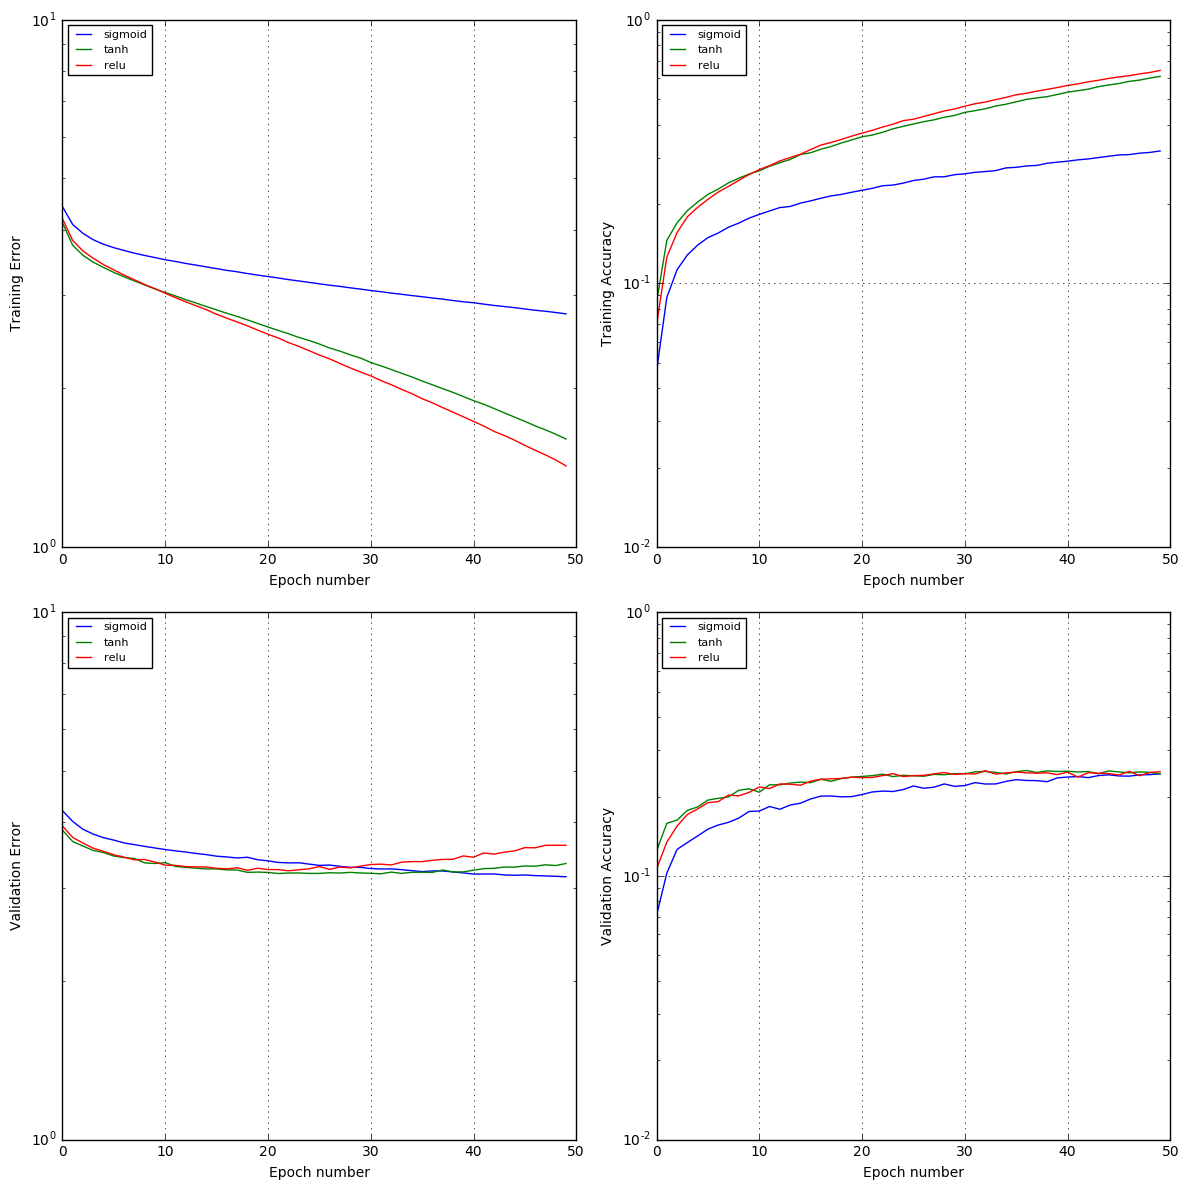

In [244]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(CF_100_ADAM_00001_2_500_50_sigm_err_t, label='sigmoid')
ax1.plot(CF_100_ADAM_00001_2_500_50_tanh_err_t, label='tanh')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_err_t, label='relu')
ax2.plot(CF_100_ADAM_00001_2_500_50_sigm_acc_t, label='sigmoid')
ax2.plot(CF_100_ADAM_00001_2_500_50_tanh_acc_t, label='tanh')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_acc_t, label='relu')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('CF_100_ADAM_train_50_activ.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(CF_100_ADAM_00001_2_500_50_sigm_err_v, label='sigmoid')
ax3.plot(CF_100_ADAM_00001_2_500_50_tanh_err_v, label='tanh')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_err_v, label='relu')
ax4.plot(CF_100_ADAM_00001_2_500_50_sigm_acc_v, label='sigmoid')
ax4.plot(CF_100_ADAM_00001_2_500_50_tanh_acc_v, label='tanh')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_acc_v, label='relu')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('CF_100_ADAM_50_activ.png',dpi=200)

In [175]:
# relu perfomed ok, using relu from now on
# on to regularisation

In [176]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, 0.01 L2 penalty
# try l2_loss outside
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_L2(0.01,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_L2(0.01,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_L2(0.01,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets)) + loss_1 + loss_2 +loss_out)
with tf.name_scope('error_val'):
    error_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_relu_001L2_acc_v = []
CF_100_ADAM_00001_2_500_50_relu_001L2_acc_t = []
CF_100_ADAM_00001_2_500_50_relu_001L2_err_v = []
CF_100_ADAM_00001_2_500_50_relu_001L2_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error_val, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_relu_001L2_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_relu_001L2_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_relu_001L2_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_relu_001L2_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=16.46 acc(train)=0.06
                 err(valid)=4.04 acc(valid)=0.09
End of epoch 02: err(train)=7.94 acc(train)=0.10
                 err(valid)=3.90 acc(valid)=0.11
End of epoch 03: err(train)=5.94 acc(train)=0.12
                 err(valid)=3.86 acc(valid)=0.12
End of epoch 04: err(train)=5.20 acc(train)=0.12
                 err(valid)=3.84 acc(valid)=0.12
End of epoch 05: err(train)=4.86 acc(train)=0.12
                 err(valid)=3.82 acc(valid)=0.13
End of epoch 06: err(train)=4.66 acc(train)=0.12
                 err(valid)=3.82 acc(valid)=0.13
End of epoch 07: err(train)=4.53 acc(train)=0.12
                 err(valid)=3.83 acc(valid)=0.12
End of epoch 08: err(train)=4.45 acc(train)=0.13
                 err(valid)=3.82 acc(valid)=0.13
End of epoch 09: err(train)=4.38 acc(train)=0.13
                 err(valid)=3.81 acc(valid)=0.12
End of epoch 10: err(train)=4.33 acc(train)=0.12
                 err(valid)=3.81 acc(valid)=0.13
End of epoch 11: er

In [177]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, 0.001 L2 penalty
# try l2_loss outside
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_L2(0.001,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_L2(0.001,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_L2(0.001,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets)) + loss_1 + loss_2 +loss_out)
with tf.name_scope('error_val'):
    error_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_v = []
CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_t = []
CF_100_ADAM_00001_2_500_50_relu_0001L2_err_v = []
CF_100_ADAM_00001_2_500_50_relu_0001L2_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error_val, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_relu_0001L2_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_relu_0001L2_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=6.06 acc(train)=0.07
                 err(valid)=3.94 acc(valid)=0.11
End of epoch 02: err(train)=5.16 acc(train)=0.13
                 err(valid)=3.74 acc(valid)=0.14
End of epoch 03: err(train)=4.77 acc(train)=0.16
                 err(valid)=3.67 acc(valid)=0.16
End of epoch 04: err(train)=4.54 acc(train)=0.17
                 err(valid)=3.60 acc(valid)=0.17
End of epoch 05: err(train)=4.38 acc(train)=0.19
                 err(valid)=3.54 acc(valid)=0.17
End of epoch 06: err(train)=4.26 acc(train)=0.20
                 err(valid)=3.49 acc(valid)=0.19
End of epoch 07: err(train)=4.16 acc(train)=0.21
                 err(valid)=3.47 acc(valid)=0.19
End of epoch 08: err(train)=4.08 acc(train)=0.21
                 err(valid)=3.47 acc(valid)=0.19
End of epoch 09: err(train)=4.01 acc(train)=0.22
                 err(valid)=3.41 acc(valid)=0.19
End of epoch 10: err(train)=3.95 acc(train)=0.23
                 err(valid)=3.38 acc(valid)=0.20
End of epoch 11: err

In [178]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, 0.0001 L2 penalty
# try without l2_loss SLOW
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_L2(0.0001,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_L2(0.0001,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_L2(0.0001,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets)) + loss_1 + loss_2 + loss_out)
with tf.name_scope('error_val'):
    error_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_v = []
CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_t = []
CF_100_ADAM_00001_2_500_50_relu_00001L2_err_v = []
CF_100_ADAM_00001_2_500_50_relu_00001L2_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error_val, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_relu_00001L2_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_relu_00001L2_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.41 acc(train)=0.07
                 err(valid)=3.93 acc(valid)=0.11
End of epoch 02: err(train)=4.01 acc(train)=0.13
                 err(valid)=3.75 acc(valid)=0.14
End of epoch 03: err(train)=3.84 acc(train)=0.16
                 err(valid)=3.63 acc(valid)=0.16
End of epoch 04: err(train)=3.71 acc(train)=0.18
                 err(valid)=3.57 acc(valid)=0.17
End of epoch 05: err(train)=3.62 acc(train)=0.19
                 err(valid)=3.51 acc(valid)=0.18
End of epoch 06: err(train)=3.54 acc(train)=0.21
                 err(valid)=3.46 acc(valid)=0.19
End of epoch 07: err(train)=3.46 acc(train)=0.22
                 err(valid)=3.43 acc(valid)=0.20
End of epoch 08: err(train)=3.40 acc(train)=0.23
                 err(valid)=3.39 acc(valid)=0.20
End of epoch 09: err(train)=3.34 acc(train)=0.24
                 err(valid)=3.39 acc(valid)=0.21
End of epoch 10: err(train)=3.28 acc(train)=0.25
                 err(valid)=3.36 acc(valid)=0.20
End of epoch 11: err

In [179]:
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.01 L2 penalty')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_relu_001L2_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_relu_001L2_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_001L2_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_001L2_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.001 L2 penalty')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_relu_0001L2_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_relu_0001L2_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.0001 L2 penalty')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_relu_00001L2_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_relu_00001L2_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.01 L2 penalty
    final error(train) = 4.10999638319
    final error(valid) = 3.73407197714
    final acc(train)   = 0.139325000076
    final acc(valid)   = 0.134899999872
-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.001 L2 penalty
    final error(train) = 3.15750590861
    final error(valid) = 3.06455112696
    final acc(train)   = 0.354875001088
    final acc(valid)   = 0.256799999885
-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, 0.0001 L2 penalty
    final error(train) = 1.94212422729
    final error(valid) = 3.37060411096
    final acc(train)   = 0.570300001465
    final acc(valid)   = 0.251500000618
-------------------------------------------------------------


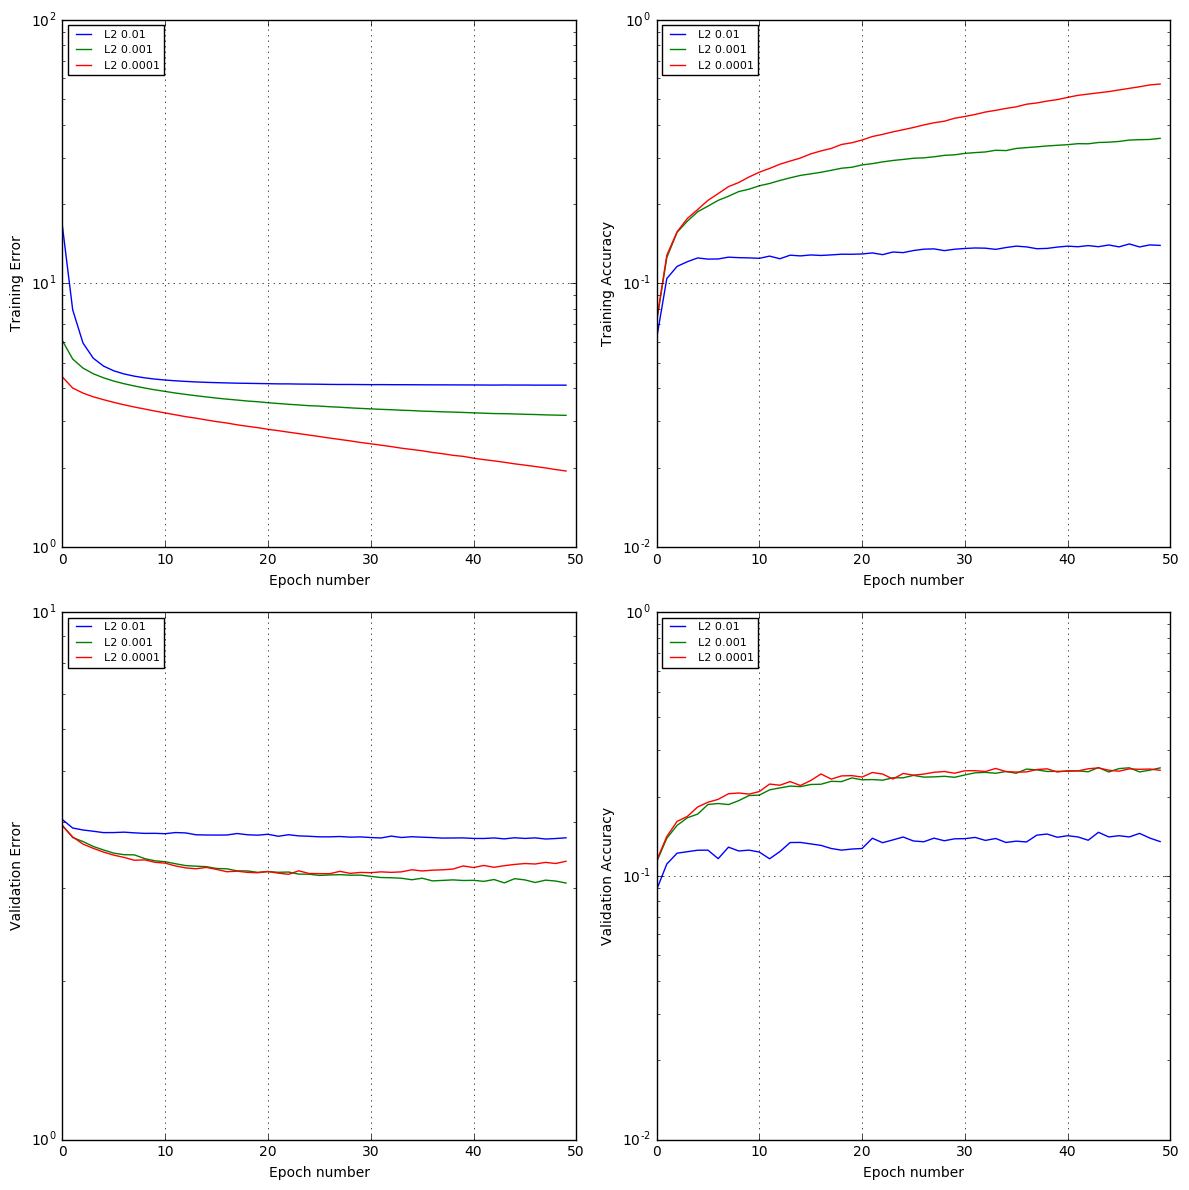

In [245]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_001L2_err_t, label='L2 0.01')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_0001L2_err_t, label='L2 0.001')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_00001L2_err_t, label='L2 0.0001')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_001L2_acc_t, label='L2 0.01')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_t, label='L2 0.001')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_t, label='L2 0.0001')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('CF_100_ADAM_train_50_L2.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_001L2_err_v, label='L2 0.01')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_0001L2_err_v, label='L2 0.001')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_00001L2_err_v, label='L2 0.0001')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_001L2_acc_v, label='L2 0.01')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_v, label='L2 0.001')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_v, label='L2 0.0001')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('CF_100_ADAM_50_L2.png',dpi=200)

In [181]:
# dropout?

In [182]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, dropout 0.5
# try without l2_loss SLOW
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_drop(0.5,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_drop(0.5,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_drop(0.5,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_relu_drop05_acc_v = []
CF_100_ADAM_00001_2_500_50_relu_drop05_acc_t = []
CF_100_ADAM_00001_2_500_50_relu_drop05_err_v = []
CF_100_ADAM_00001_2_500_50_relu_drop05_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_relu_drop05_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_relu_drop05_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_relu_drop05_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_relu_drop05_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.64 acc(train)=0.01
                 err(valid)=4.59 acc(valid)=0.02
End of epoch 02: err(train)=4.57 acc(train)=0.02
                 err(valid)=4.57 acc(valid)=0.02
End of epoch 03: err(train)=4.55 acc(train)=0.02
                 err(valid)=4.54 acc(valid)=0.02
End of epoch 04: err(train)=4.53 acc(train)=0.03
                 err(valid)=4.52 acc(valid)=0.03
End of epoch 05: err(train)=4.51 acc(train)=0.03
                 err(valid)=4.51 acc(valid)=0.03
End of epoch 06: err(train)=4.50 acc(train)=0.03
                 err(valid)=4.49 acc(valid)=0.03
End of epoch 07: err(train)=4.48 acc(train)=0.03
                 err(valid)=4.47 acc(valid)=0.04
End of epoch 08: err(train)=4.47 acc(train)=0.04
                 err(valid)=4.47 acc(valid)=0.03
End of epoch 09: err(train)=4.47 acc(train)=0.04
                 err(valid)=4.47 acc(valid)=0.04
End of epoch 10: err(train)=4.46 acc(train)=0.04
                 err(valid)=4.45 acc(valid)=0.04
End of epoch 11: err

In [183]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, dropout 0.9
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_drop(0.9,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_drop(0.9,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_drop(0.9,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_relu_drop09_acc_v = []
CF_100_ADAM_00001_2_500_50_relu_drop09_acc_t = []
CF_100_ADAM_00001_2_500_50_relu_drop09_err_v = []
CF_100_ADAM_00001_2_500_50_relu_drop09_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_relu_drop09_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_relu_drop09_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_relu_drop09_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_relu_drop09_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=4.35 acc(train)=0.05
                 err(valid)=4.15 acc(valid)=0.08
End of epoch 02: err(train)=4.04 acc(train)=0.09
                 err(valid)=3.96 acc(valid)=0.11
End of epoch 03: err(train)=3.89 acc(train)=0.12
                 err(valid)=3.86 acc(valid)=0.13
End of epoch 04: err(train)=3.80 acc(train)=0.14
                 err(valid)=3.81 acc(valid)=0.13
End of epoch 05: err(train)=3.72 acc(train)=0.15
                 err(valid)=3.75 acc(valid)=0.15
End of epoch 06: err(train)=3.66 acc(train)=0.16
                 err(valid)=3.70 acc(valid)=0.15
End of epoch 07: err(train)=3.60 acc(train)=0.17
                 err(valid)=3.69 acc(valid)=0.15
End of epoch 08: err(train)=3.56 acc(train)=0.18
                 err(valid)=3.64 acc(valid)=0.17
End of epoch 09: err(train)=3.51 acc(train)=0.19
                 err(valid)=3.62 acc(valid)=0.17
End of epoch 10: err(train)=3.46 acc(train)=0.20
                 err(valid)=3.60 acc(valid)=0.18
End of epoch 11: err

In [184]:
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.5')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_relu_drop05_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_relu_drop05_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_drop05_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_drop05_acc_v[-1])
print('-------------------------------------------------------------')
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.9')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_relu_drop09_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_relu_drop09_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_drop09_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_drop09_acc_v[-1])
print('-------------------------------------------------------------')

-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.5
    final error(train) = 4.26404764414
    final error(valid) = 4.29227864146
    final acc(train)   = 0.0741999990679
    final acc(valid)   = 0.0729999990948
-------------------------------------------------------------
Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.9
    final error(train) = 2.36995763838
    final error(valid) = 3.56653565645
    final acc(train)   = 0.422099999636
    final acc(valid)   = 0.224099999964
-------------------------------------------------------------


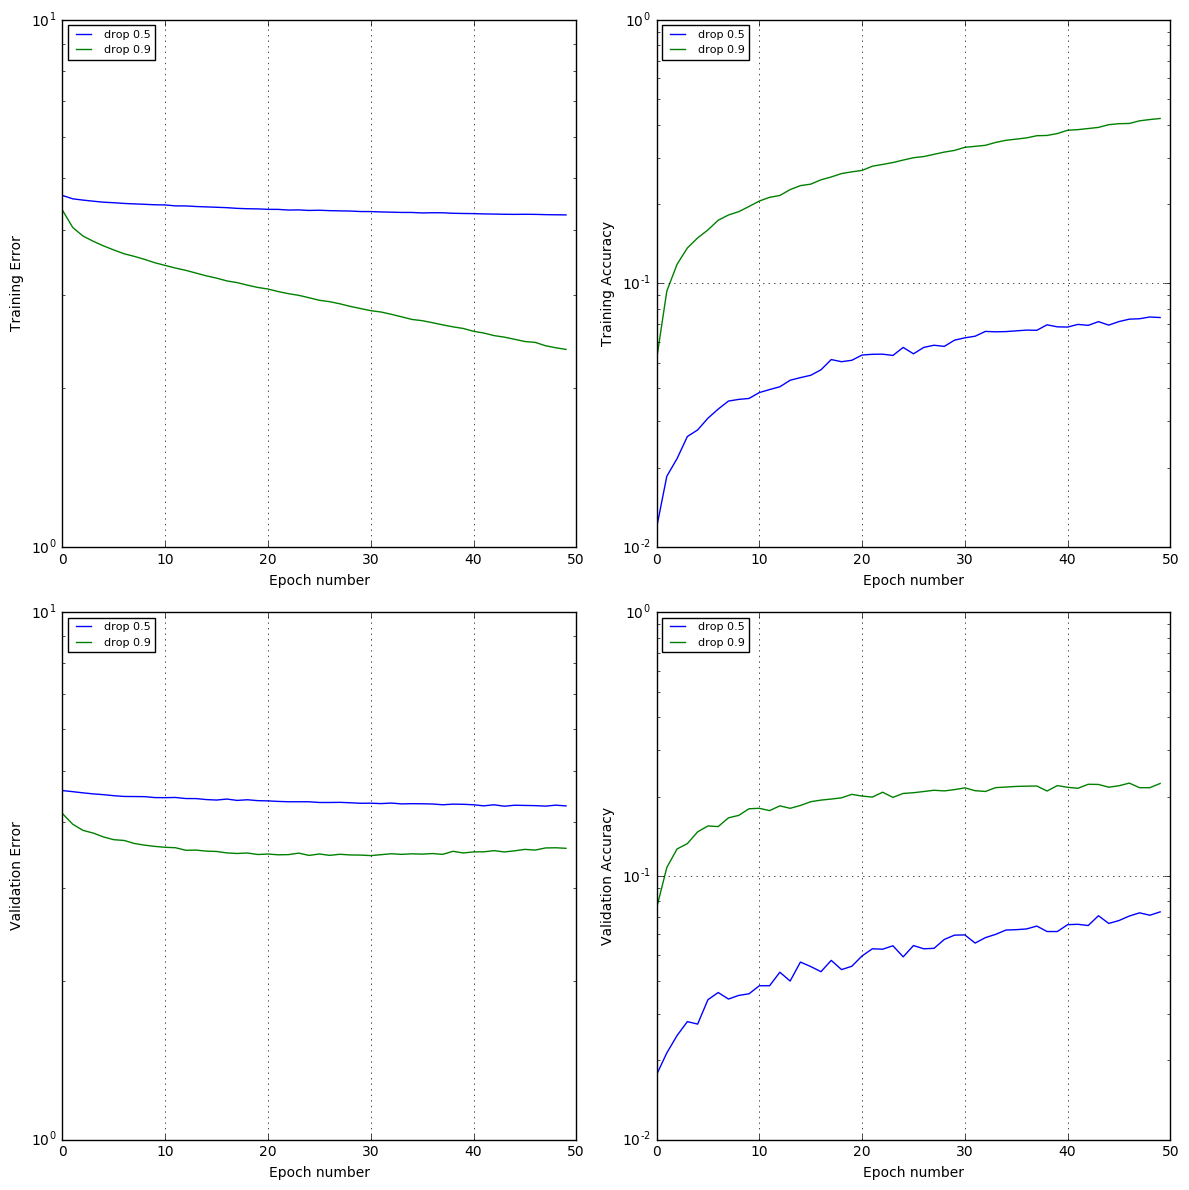

In [246]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_drop05_err_t, label='drop 0.5')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_drop09_err_t, label='drop 0.9')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_drop05_acc_t, label='drop 0.5')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_drop09_acc_t, label='drop 0.9')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('CF_100_ADAM_train_50_dropout.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_drop05_err_v, label='drop 0.5')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_drop09_err_v, label='drop 0.9')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_drop05_acc_v, label='drop 0.5')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_drop09_acc_v, label='drop 0.9')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('CF_100_ADAM_50_dropout.png',dpi=200)

In [186]:
# maybe both

In [187]:
# Adam 0.0001, 2 hidden layer, relu, 50 epochs, size 500, dropout 0.9 + L2 0.001
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden =500

with tf.name_scope('fc-layer-1'):
    hidden_1, loss_1 = fully_connected_layer_L2drop(0.9,0.001,inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2, loss_2 = fully_connected_layer_L2drop(0.9,0.001,hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs, loss_out = fully_connected_layer_L2drop(0.9,0.001,hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets)) + loss_1 + loss_2 + loss_out)
with tf.name_scope('error_val'):
    error_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

# save the values to plot later
CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_v = []
CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_t = []
CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_v = []
CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_t = []

# train
with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                    [error_val, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
        CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_t.append(running_error)
        CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_t.append(running_accuracy)
        CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_v.append(valid_error)
        CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_v.append(valid_accuracy)

End of epoch 01: err(train)=6.27 acc(train)=0.05
                 err(valid)=4.13 acc(valid)=0.08
End of epoch 02: err(train)=5.43 acc(train)=0.09
                 err(valid)=3.96 acc(valid)=0.11
End of epoch 03: err(train)=5.00 acc(train)=0.12
                 err(valid)=3.86 acc(valid)=0.12
End of epoch 04: err(train)=4.73 acc(train)=0.14
                 err(valid)=3.80 acc(valid)=0.14
End of epoch 05: err(train)=4.55 acc(train)=0.15
                 err(valid)=3.75 acc(valid)=0.15
End of epoch 06: err(train)=4.42 acc(train)=0.16
                 err(valid)=3.70 acc(valid)=0.15
End of epoch 07: err(train)=4.32 acc(train)=0.16
                 err(valid)=3.68 acc(valid)=0.16
End of epoch 08: err(train)=4.24 acc(train)=0.17
                 err(valid)=3.65 acc(valid)=0.17
End of epoch 09: err(train)=4.17 acc(train)=0.18
                 err(valid)=3.62 acc(valid)=0.17
End of epoch 10: err(train)=4.12 acc(train)=0.19
                 err(valid)=3.59 acc(valid)=0.17
End of epoch 11: err

In [188]:
print('Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.9 + L2 0.001')
print('    final error(train) = {}').format(CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_t[-1])
print('    final error(valid) = {}').format(CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_v[-1])
print('    final acc(train)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_t[-1])
print('    final acc(valid)   = {}').format(CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_v[-1])
print('-------------------------------------------------------------')

Adam 0.0001, 2 layers, relu activation over 50 epochs, size 500, dropout prob 0.9 + L2 0.001
    final error(train) = 3.4423642543
    final error(valid) = 3.32163556695
    final acc(train)   = 0.279475000016
    final acc(valid)   = 0.225800000038
-------------------------------------------------------------


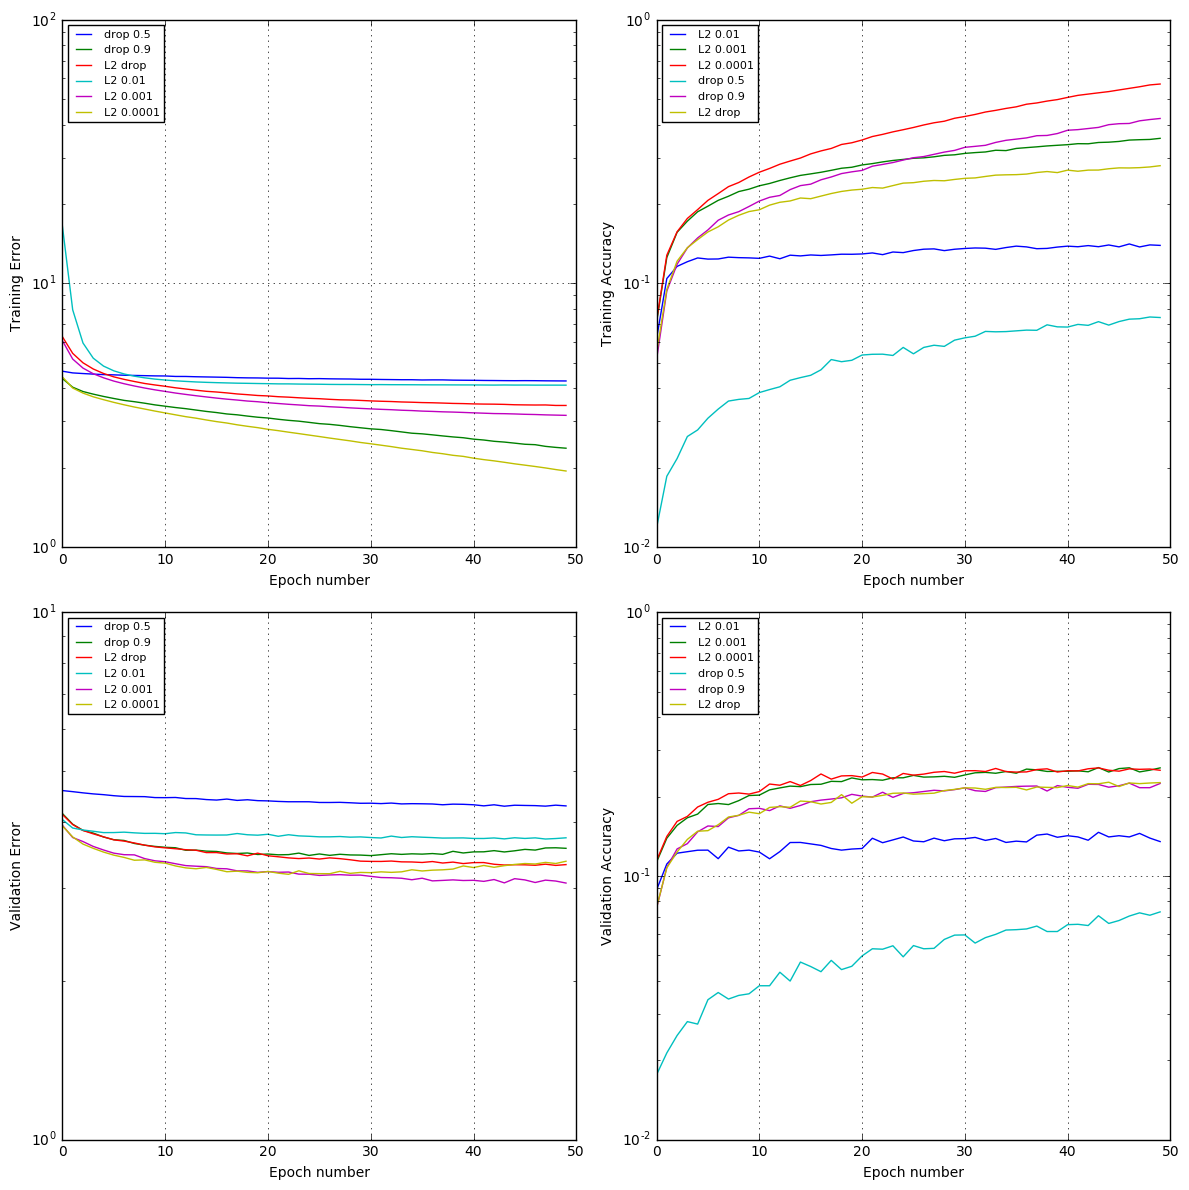

In [247]:
# training 
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_drop05_err_t, label='drop 0.5')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_drop09_err_t, label='drop 0.9')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_t, label='L2 drop ')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_001L2_err_t, label='L2 0.01')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_0001L2_err_t, label='L2 0.001')
ax1.plot(CF_100_ADAM_00001_2_500_50_relu_00001L2_err_t, label='L2 0.0001')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_001L2_acc_t, label='L2 0.01')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_t, label='L2 0.001')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_t, label='L2 0.0001')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_drop05_acc_t, label='drop 0.5')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_drop09_acc_t, label='drop 0.9')
ax2.plot(CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_t, label='L2 drop ')
ax1.legend(loc=2,prop={'size':8})
ax1.grid()
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Training Error')
ax1.set_yscale('log')
ax2.legend(loc=2,prop={'size':8})
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Training Accuracy')
ax2.set_yscale('log')
ax2.grid()
#fig.tight_layout()
#fig.savefig('CF_100_ADAM_train_50_L2drop.png',dpi=200)

# validation
#fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_drop05_err_v, label='drop 0.5')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_drop09_err_v, label='drop 0.9')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_v, label='L2 drop ')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_001L2_err_v, label='L2 0.01')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_0001L2_err_v, label='L2 0.001')
ax3.plot(CF_100_ADAM_00001_2_500_50_relu_00001L2_err_v, label='L2 0.0001')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_001L2_acc_v, label='L2 0.01')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_v, label='L2 0.001')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_v, label='L2 0.0001')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_drop05_acc_v, label='drop 0.5')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_drop09_acc_v, label='drop 0.9')
ax4.plot(CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_v, label='L2 drop ')
ax3.legend(loc=2,prop={'size':8})
ax3.grid()
ax3.set_xlabel('Epoch number')
ax3.set_ylabel('Validation Error')
ax3.set_yscale('log')
ax4.legend(loc=2,prop={'size':8})
ax4.set_xlabel('Epoch number')
ax4.set_ylabel('Validation Accuracy')
ax4.set_yscale('log')
ax4.grid()
fig.tight_layout()
fig.savefig('CF_100_ADAM_50_L2drop.png',dpi=200)

In [193]:
# keep all results in ffiles 

ff21 = np.array(C100_GD_05_1_50_sigm_err_t)
ff22 = np.array(C100_GD_05_1_50_sigm_err_v)
ff23 = np.array(C100_GD_05_1_50_sigm_acc_t)
ff24 = np.array(C100_GD_05_1_50_sigm_acc_v)
ff25 = np.array(CF_100_GD_05_2_50_sigm_err_t)
ff26 = np.array(CF_100_GD_05_2_50_sigm_err_v)
ff27 = np.array(CF_100_GD_05_2_50_sigm_acc_t)
ff28 = np.array(CF_100_GD_05_2_50_sigm_acc_v)
ff29 = np.array(CF_100_GD_05_3_50_sigm_err_t)
ff30 = np.array(CF_100_GD_05_3_50_sigm_err_v)
ff31 = np.array(CF_100_GD_05_3_50_sigm_acc_t)
ff32 = np.array(CF_100_GD_05_3_50_sigm_acc_v)
ff33 = np.array(CF_100_GD_05_4_50_sigm_err_t)
ff34 = np.array(CF_100_GD_05_4_50_sigm_err_v)
ff35 = np.array(CF_100_GD_05_4_50_sigm_acc_t)
ff36 = np.array(CF_100_GD_05_4_50_sigm_acc_v)

ff61 = np.array(CF_100_GD_05_2_50_50_sigm_err_t)
ff62 = np.array(CF_100_GD_05_2_50_50_sigm_err_v)
ff63 = np.array(CF_100_GD_05_2_50_50_sigm_acc_t)
ff64 = np.array(CF_100_GD_05_2_50_50_sigm_acc_v)
ff65 = np.array(CF_100_GD_05_2_100_50_sigm_err_t)
ff66 = np.array(CF_100_GD_05_2_100_50_sigm_err_v)
ff67 = np.array(CF_100_GD_05_2_100_50_sigm_acc_t)
ff68 = np.array(CF_100_GD_05_2_100_50_sigm_acc_v)

ff73 = np.array(CF_100_GD_05_2_300_50_sigm_err_t)
ff74 = np.array(CF_100_GD_05_2_300_50_sigm_err_v)
ff75 = np.array(CF_100_GD_05_2_300_50_sigm_acc_t)
ff76 = np.array(CF_100_GD_05_2_300_50_sigm_acc_v)
ff77 = np.array(CF_100_GD_05_2_400_50_sigm_err_t)
ff78 = np.array(CF_100_GD_05_2_400_50_sigm_err_v)
ff79 = np.array(CF_100_GD_05_2_400_50_sigm_acc_t)
ff80 = np.array(CF_100_GD_05_2_400_50_sigm_acc_v)
ff81 = np.array(CF_100_GD_05_2_500_50_sigm_err_t)
ff82 = np.array(CF_100_GD_05_2_500_50_sigm_err_v)
ff83 = np.array(CF_100_GD_05_2_500_50_sigm_acc_t)
ff84 = np.array(CF_100_GD_05_2_500_50_sigm_acc_v)

ff89 = np.array(CF_100_GD_01_2_500_50_sigm_err_t)
ff90 = np.array(CF_100_GD_01_2_500_50_sigm_err_v)
ff91 = np.array(CF_100_GD_01_2_500_50_sigm_acc_t)
ff92 = np.array(CF_100_GD_01_2_500_50_sigm_acc_v)

ff93 = np.array(CF_100_MOM_01_2_500_50_sigm_err_t)
ff94 = np.array(CF_100_MOM_01_2_500_50_sigm_err_v)
ff95 = np.array(CF_100_MOM_01_2_500_50_sigm_acc_t)
ff96 = np.array(CF_100_MOM_01_2_500_50_sigm_acc_v)

ff97 = np.array(CF_100_ADA_01_2_500_50_sigm_err_t)
ff98 = np.array(CF_100_ADA_01_2_500_50_sigm_err_v)
ff99 = np.array(CF_100_ADA_01_2_500_50_sigm_acc_t)
ff100 = np.array(CF_100_ADA_01_2_500_50_sigm_acc_v)
ff101 = np.array(CF_100_ADA_001_2_500_50_sigm_err_t)
ff102 = np.array(CF_100_ADA_001_2_500_50_sigm_err_v)
ff103 = np.array(CF_100_ADA_001_2_500_50_sigm_acc_t)
ff104 = np.array(CF_100_ADA_001_2_500_50_sigm_acc_v)

ff105 = np.array(CF_100_ADAM_001_2_500_50_sigm_err_t)
ff106 = np.array(CF_100_ADAM_001_2_500_50_sigm_err_v)
ff107 = np.array(CF_100_ADAM_001_2_500_50_sigm_acc_t)
ff108 = np.array(CF_100_ADAM_001_2_500_50_sigm_acc_v)
ff109 = np.array(CF_100_ADAM_0001_2_500_50_sigm_err_t)
ff110 = np.array(CF_100_ADAM_0001_2_500_50_sigm_err_v)
ff111 = np.array(CF_100_ADAM_0001_2_500_50_sigm_acc_t)
ff112 = np.array(CF_100_ADAM_0001_2_500_50_sigm_acc_v)
ff113 = np.array(CF_100_ADAM_00001_2_500_50_sigm_err_t)
ff114 = np.array(CF_100_ADAM_00001_2_500_50_sigm_err_v)
ff115 = np.array(CF_100_ADAM_00001_2_500_50_sigm_acc_t)
ff116 = np.array(CF_100_ADAM_00001_2_500_50_sigm_acc_v)

ff117 = np.array(CF_100_ADAM_00001_2_500_50_tanh_err_t)
ff118 = np.array(CF_100_ADAM_00001_2_500_50_tanh_err_v)
ff119 = np.array(CF_100_ADAM_00001_2_500_50_tanh_acc_t)
ff120 = np.array(CF_100_ADAM_00001_2_500_50_tanh_acc_v)               
ff121 = np.array(CF_100_ADAM_00001_2_500_50_relu_err_t)
ff122 = np.array(CF_100_ADAM_00001_2_500_50_relu_err_v)
ff123 = np.array(CF_100_ADAM_00001_2_500_50_relu_acc_t)
ff124 = np.array(CF_100_ADAM_00001_2_500_50_relu_acc_v) 
  
ff129 = np.array(CF_100_ADAM_00001_2_500_50_relu_001L2_err_t)
ff130 = np.array(CF_100_ADAM_00001_2_500_50_relu_001L2_err_v)
ff131 = np.array(CF_100_ADAM_00001_2_500_50_relu_001L2_acc_t)
ff132 = np.array(CF_100_ADAM_00001_2_500_50_relu_001L2_acc_v) 
ff133 = np.array(CF_100_ADAM_00001_2_500_50_relu_0001L2_err_t)
ff134 = np.array(CF_100_ADAM_00001_2_500_50_relu_0001L2_err_v)
ff135 = np.array(CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_t)
ff136 = np.array(CF_100_ADAM_00001_2_500_50_relu_0001L2_acc_v) 
ff137 = np.array(CF_100_ADAM_00001_2_500_50_relu_00001L2_err_t)
ff138 = np.array(CF_100_ADAM_00001_2_500_50_relu_00001L2_err_v)
ff139 = np.array(CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_t)
ff140 = np.array(CF_100_ADAM_00001_2_500_50_relu_00001L2_acc_v)

ff141 = np.array(CF_100_ADAM_00001_2_500_50_relu_drop05_err_t)
ff142 = np.array(CF_100_ADAM_00001_2_500_50_relu_drop05_err_v)
ff143 = np.array(CF_100_ADAM_00001_2_500_50_relu_drop05_acc_t)
ff144 = np.array(CF_100_ADAM_00001_2_500_50_relu_drop05_acc_v)
ff145 = np.array(CF_100_ADAM_00001_2_500_50_relu_drop09_err_t)
ff146 = np.array(CF_100_ADAM_00001_2_500_50_relu_drop09_err_v)
ff147 = np.array(CF_100_ADAM_00001_2_500_50_relu_drop09_acc_t)
ff148 = np.array(CF_100_ADAM_00001_2_500_50_relu_drop09_acc_v)

ff149 = np.array(CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_t)
ff150 = np.array(CF_100_ADAM_00001_2_500_50_relu_L2drop09_err_v)
ff151 = np.array(CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_t)
ff152 = np.array(CF_100_ADAM_00001_2_500_50_relu_L2drop09_acc_v)

In [194]:

np.savetxt('ff21', ff21, delimiter=',')
np.savetxt('ff22', ff22, delimiter=',')
np.savetxt('ff23', ff23, delimiter=',')
np.savetxt('ff24', ff24, delimiter=',')
np.savetxt('ff25', ff25, delimiter=',')
np.savetxt('ff26', ff26, delimiter=',')
np.savetxt('ff27', ff27, delimiter=',')
np.savetxt('ff28', ff28, delimiter=',')
np.savetxt('ff29', ff29, delimiter=',')
np.savetxt('ff30', ff30, delimiter=',')
np.savetxt('ff31', ff31, delimiter=',')
np.savetxt('ff32', ff32, delimiter=',')
np.savetxt('ff33', ff33, delimiter=',')
np.savetxt('ff34', ff34, delimiter=',')
np.savetxt('ff35', ff35, delimiter=',')
np.savetxt('ff36', ff36, delimiter=',')

np.savetxt('ff61', ff61, delimiter=',')
np.savetxt('ff62', ff62, delimiter=',')
np.savetxt('ff63', ff63, delimiter=',')
np.savetxt('ff64', ff64, delimiter=',')
np.savetxt('ff65', ff65, delimiter=',')
np.savetxt('ff66', ff66, delimiter=',')
np.savetxt('ff67', ff67, delimiter=',')
np.savetxt('ff68', ff68, delimiter=',')

np.savetxt('ff73', ff73, delimiter=',')
np.savetxt('ff74', ff74, delimiter=',')
np.savetxt('ff75', ff75, delimiter=',')
np.savetxt('ff76', ff76, delimiter=',')
np.savetxt('ff77', ff77, delimiter=',')
np.savetxt('ff78', ff78, delimiter=',')
np.savetxt('ff79', ff79, delimiter=',')               
np.savetxt('ff80', ff80, delimiter=',')
np.savetxt('ff81', ff81, delimiter=',')
np.savetxt('ff82', ff82, delimiter=',')
np.savetxt('ff83', ff83, delimiter=',')
np.savetxt('ff84', ff84, delimiter=',')

np.savetxt('ff89', ff89, delimiter=',')
np.savetxt('ff90', ff90, delimiter=',')
np.savetxt('ff91', ff91, delimiter=',')
np.savetxt('ff92', ff92, delimiter=',')
np.savetxt('ff93', ff93, delimiter=',')
np.savetxt('ff94', ff94, delimiter=',')
np.savetxt('ff95', ff95, delimiter=',')
np.savetxt('ff96', ff96, delimiter=',')
np.savetxt('ff97', ff97, delimiter=',')
np.savetxt('ff98', ff98, delimiter=',')
np.savetxt('ff99', ff99, delimiter=',')               
np.savetxt('ff100', ff100, delimiter=',')
np.savetxt('ff101', ff101, delimiter=',')
np.savetxt('ff102', ff102, delimiter=',')
np.savetxt('ff103', ff103, delimiter=',')
np.savetxt('ff104', ff104, delimiter=',')
np.savetxt('ff105', ff105, delimiter=',')
np.savetxt('ff106', ff106, delimiter=',')
np.savetxt('ff107', ff107, delimiter=',')
np.savetxt('ff108', ff108, delimiter=',')
np.savetxt('ff109', ff109, delimiter=',')               
np.savetxt('ff110', ff110, delimiter=',')
np.savetxt('ff111', ff111, delimiter=',')
np.savetxt('ff112', ff112, delimiter=',')
np.savetxt('ff113', ff113, delimiter=',')
np.savetxt('ff114', ff114, delimiter=',')
np.savetxt('ff115', ff115, delimiter=',')
np.savetxt('ff116', ff116, delimiter=',')
np.savetxt('ff117', ff117, delimiter=',')
np.savetxt('ff118', ff118, delimiter=',')
np.savetxt('ff119', ff119, delimiter=',')
np.savetxt('ff120', ff120, delimiter=',')
np.savetxt('ff121', ff121, delimiter=',')
np.savetxt('ff122', ff122, delimiter=',')
np.savetxt('ff123', ff123, delimiter=',')
np.savetxt('ff124', ff124, delimiter=',')

np.savetxt('ff129', ff129, delimiter=',')               
np.savetxt('ff130', ff130, delimiter=',')
np.savetxt('ff131', ff131, delimiter=',')
np.savetxt('ff132', ff132, delimiter=',')
np.savetxt('ff133', ff133, delimiter=',')
np.savetxt('ff134', ff134, delimiter=',')
np.savetxt('ff135', ff135, delimiter=',')
np.savetxt('ff136', ff136, delimiter=',')
np.savetxt('ff137', ff137, delimiter=',')
np.savetxt('ff138', ff138, delimiter=',')
np.savetxt('ff139', ff139, delimiter=',')
np.savetxt('ff140', ff140, delimiter=',')
np.savetxt('ff141', ff141, delimiter=',')
np.savetxt('ff142', ff142, delimiter=',')
np.savetxt('ff143', ff143, delimiter=',')
np.savetxt('ff144', ff144, delimiter=',')
np.savetxt('ff145', ff145, delimiter=',')
np.savetxt('ff146', ff146, delimiter=',')
np.savetxt('ff147', ff147, delimiter=',')
np.savetxt('ff148', ff148, delimiter=',')
np.savetxt('ff149', ff149, delimiter=',')
np.savetxt('ff150', ff150, delimiter=',')
np.savetxt('ff151', ff151, delimiter=',')
np.savetxt('ff152', ff152, delimiter=',')